In [96]:
from itertools import combinations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import matplotlib as mpl


from correlation_significance import correlated_significance
from spot2intensity import Spots
from data_180218 import load_data


In [97]:
collections = load_data()


In [98]:
directory = "data/{}/correlation_plots/".format(collections["slide_21"].study)


In [150]:
cs_vir1_names = ["slide_21","slide_22","slide_23"]
cs_vir2_names = ["slide_26","slide_27","slide_28"]
cs_vir3_names = ["slide_31","slide_32","slide_33"]
cs_vir4_names = ["slide_36","slide_37",]
cs_vir5_names = ["slide_41","slide_42",]
cs_vir1={collections[c]:"HongKong/4801/2014" for c in cs_vir1_names}
cs_vir2={collections[c]:"Brisbaine/59/2007" for c in cs_vir2_names}
cs_vir3={collections[c]:"Cal" for c in cs_vir3_names}
cs_vir4={collections[c]:"Brisbaine/10/2007" for c in cs_vir4_names}
cs_vir5={collections[c]:"X31" for c in cs_vir5_names}
collections_dict = {}

for d in [cs_vir1,cs_vir2,cs_vir3,cs_vir4,cs_vir5]:
    for k, v in d.iteritems():
        collections_dict[k] = v
viruses = set(collections_dict.values())
virus_combinations = list(combinations(viruses,2))


In [167]:
frames = []
for c, virus in collections_dict.iteritems():
    spots_c = Spots.load_pickel(c)
    mean_blank = spots_c.df[spots_c.df["Name"]=="blank"]["intensities2"].mean()
    spots_c.df["intensities2"] = spots_c.df["intensities2"]- mean_blank
    spots_c.select_by_circlequal(0.4)
    spots_c.add_virus(virus)
    spots_c.add_c_name(c.name)
    frames.append(spots_c.df)
spots = pd.concat(frames)

In [168]:
spots.groupby("Virus").count()["intensities"]

Virus
Brisbaine/10/2007      979
Brisbaine/59/2007     1250
Cal                   1134
HongKong/4801/2014    1196
X31                    351
Name: intensities, dtype: int64

In [180]:
frames = []
for name, data in spots.groupby("Collection"):
    mean_94 = data[data["Name"]=="Nenad"]["intensities2"].mean()
    print(name, mean_94)
    data["intensities2"] = data["intensities2"]/mean_94
    
    frames.append(data)
    
norm_spots = pd.concat(frames)
    

('slide_21', 0.99999999999999978)


/home/janekg89/Envs/flutype_webapp/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


('slide_22', 1.0)
('slide_23', 0.99999999999999978)
('slide_26', 1.0)
('slide_27', 0.99999999999999978)
('slide_28', 1.0)
('slide_31', 1.0000000000000002)
('slide_32', 1.0)
('slide_33', 1.0)
('slide_36', 1.0)
('slide_37', 1.0)
('slide_41', 1.0)
('slide_42', 1.0000000000000002)


In [170]:
spots = norm_spots

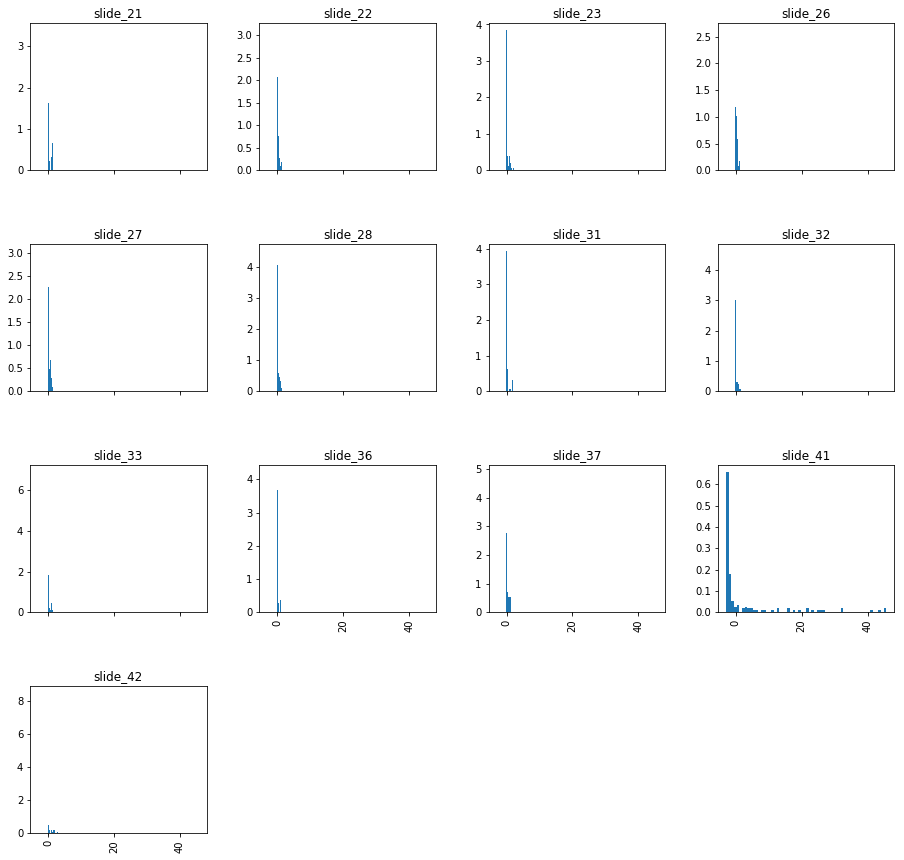

In [171]:
spots.hist(by="Collection", column="intensities2", figsize=(15,15), sharex=True, bins=60, normed=1)
plt.savefig(directory+"densities.png", bbox_inches="tight")    
plt.show()


In [172]:
frames = []
for name, data in spots.groupby(["Name","Virus"]):
    x = data.mean()
    x["intensities_mean_std"] = data["intensities"].std(ddof=1)/np.sqrt(len(data))
    x["intensities_var"] = data["intensities2"].var()

    x["intensities2_mean_std"] = data["intensities2"].std(ddof=1)/np.sqrt(len(data))
    x["intensities2_var"] = data["intensities2"].var()

    x.name = name
    frames.append(x)
mean_spots = pd.concat(frames, axis=1)
mean_spots = mean_spots.transpose().reset_index()
mean_spots = mean_spots.rename(columns={"level_0":"Peptide Batch","level_1":"Virus"})    

In [173]:
mean_spots[mean_spots["Peptide Batch"] == "Pep_94"]

,Peptide Batch,Virus,Block,Column,Row,circle_qual,intensities,intensities2,intensities2_b,intensities2_mean_std,intensities2_var,intensities_mean_std,intensities_var,spot_images,std_intensities2
360,Pep_94,Brisbaine/10/2007,1,9,27,0.516221,6.41779e+07,0.250779,8226.63,0.0693446,0.0865562,4.26499e+06,0.0865562,"[[1989.55555556, 3344.0, 831.944444444, 3092.3...",16523.7
361,Pep_94,Brisbaine/59/2007,1,9,27,0.529057,7.17119e+07,0.714216,24046.8,0.0859034,0.199244,4.06681e+06,0.199244,"[[726.925925926, 683.111111111, 361.37037037, ...",22140.2
362,Pep_94,Cal,1,9,27,0.487754,6.27892e+07,0.735113,19833.4,0.103461,0.289012,2.67384e+06,0.289012,"[[2300.74074074, 1229.66666667, 2418.51851852,...",22559.9
363,Pep_94,HongKong/4801/2014,1,8.76923,26.5385,0.467252,6.81757e+07,0.681843,22792.5,0.093674,0.228145,3.15631e+06,0.228145,"[[949.615384615, 916.961538462, 1033.23076923,...",21010.1
364,Pep_94,X31,1,11.25,21.1667,0.464361,4.44068e+07,3.54941,20311.9,2.55754,78.492,3.51726e+06,78.492,NaN,15958.8


In [174]:
mean_spots_grouped = mean_spots.groupby("Virus")
grouped_combinations = combinations(mean_spots_grouped,2)
frames = []
for (name1,spots1),(name2,spots2) in grouped_combinations:
    peptides = set(spots1["Peptide Batch"].unique()).intersection(set(spots2["Peptide Batch"].unique()))
    
    for peptide in peptides:
        
        spots1_this_pep = spots1.loc[spots1["Peptide Batch"] == peptide]
        spots2_this_pep = spots2.loc[spots2["Peptide Batch"] == peptide]

        v1_i = spots1_this_pep["intensities2"].iloc[0]
        v2_i = spots2_this_pep["intensities2"].iloc[0]
   
        v1_err = spots1_this_pep["intensities2_mean_std"].iloc[0]
        v2_err = spots2_this_pep["intensities2_mean_std"].iloc[0]
        
        v1_var = spots1_this_pep["intensities2_var"].iloc[0]
        v2_var = spots2_this_pep["intensities2_var"].iloc[0]
        
        where_max ,sig_max = correlated_significance(v1_i,v2_i, v1_var, v2_var)
        
        fr = pd.Series([peptide,(name1,name2),sig_max,v1_i,v2_i,v1_err,v2_err,len(spots1_this_pep),len(spots2_this_pep)],index = ["Peptide","Viruses","Significance","v1_i","v2_i","v1_err","v2_err","v1_numb","v2_numb"])
        frames.append(fr)        
        
peptide_c_signif = pd.concat(frames, axis=1).transpose()
    

In [175]:
peptide_c_signif[peptide_c_signif["Peptide"] == "Pep_94"]

,Peptide,Viruses,Significance,v1_i,v2_i,v1_err,v2_err,v1_numb,v2_numb
73,Pep_94,"(Brisbaine/10/2007, Brisbaine/59/2007)",0.531381,0.250779,0.714216,0.0693446,0.0859034,1,1
146,Pep_94,"(Brisbaine/10/2007, Cal)",0.441659,0.250779,0.735113,0.0693446,0.103461,1,1
215,Pep_94,"(Brisbaine/10/2007, HongKong/4801/2014)",0.41753,0.250779,0.681843,0.0693446,0.093674,1,1
274,Pep_94,"(Brisbaine/10/2007, X31)",0.0979864,0.250779,3.54941,0.0693446,2.55754,1,1
356,Pep_94,"(Brisbaine/59/2007, Cal)",0.000632446,0.714216,0.735113,0.0859034,0.103461,1,1
433,Pep_94,"(Brisbaine/59/2007, HongKong/4801/2014)",0.00173396,0.714216,0.681843,0.0859034,0.093674,1,1
499,Pep_94,"(Brisbaine/59/2007, X31)",0.0722389,0.714216,3.54941,0.0859034,2.55754,1,1
575,Pep_94,"(Cal, HongKong/4801/2014)",0.00388004,0.735113,0.681843,0.103461,0.093674,1,1
639,Pep_94,"(Cal, X31)",0.071143,0.735113,3.54941,0.103461,2.55754,1,1
701,Pep_94,"(HongKong/4801/2014, X31)",0.0738833,0.681843,3.54941,0.093674,2.55754,1,1


/home/janekg89/Envs/flutype_webapp/lib/python2.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


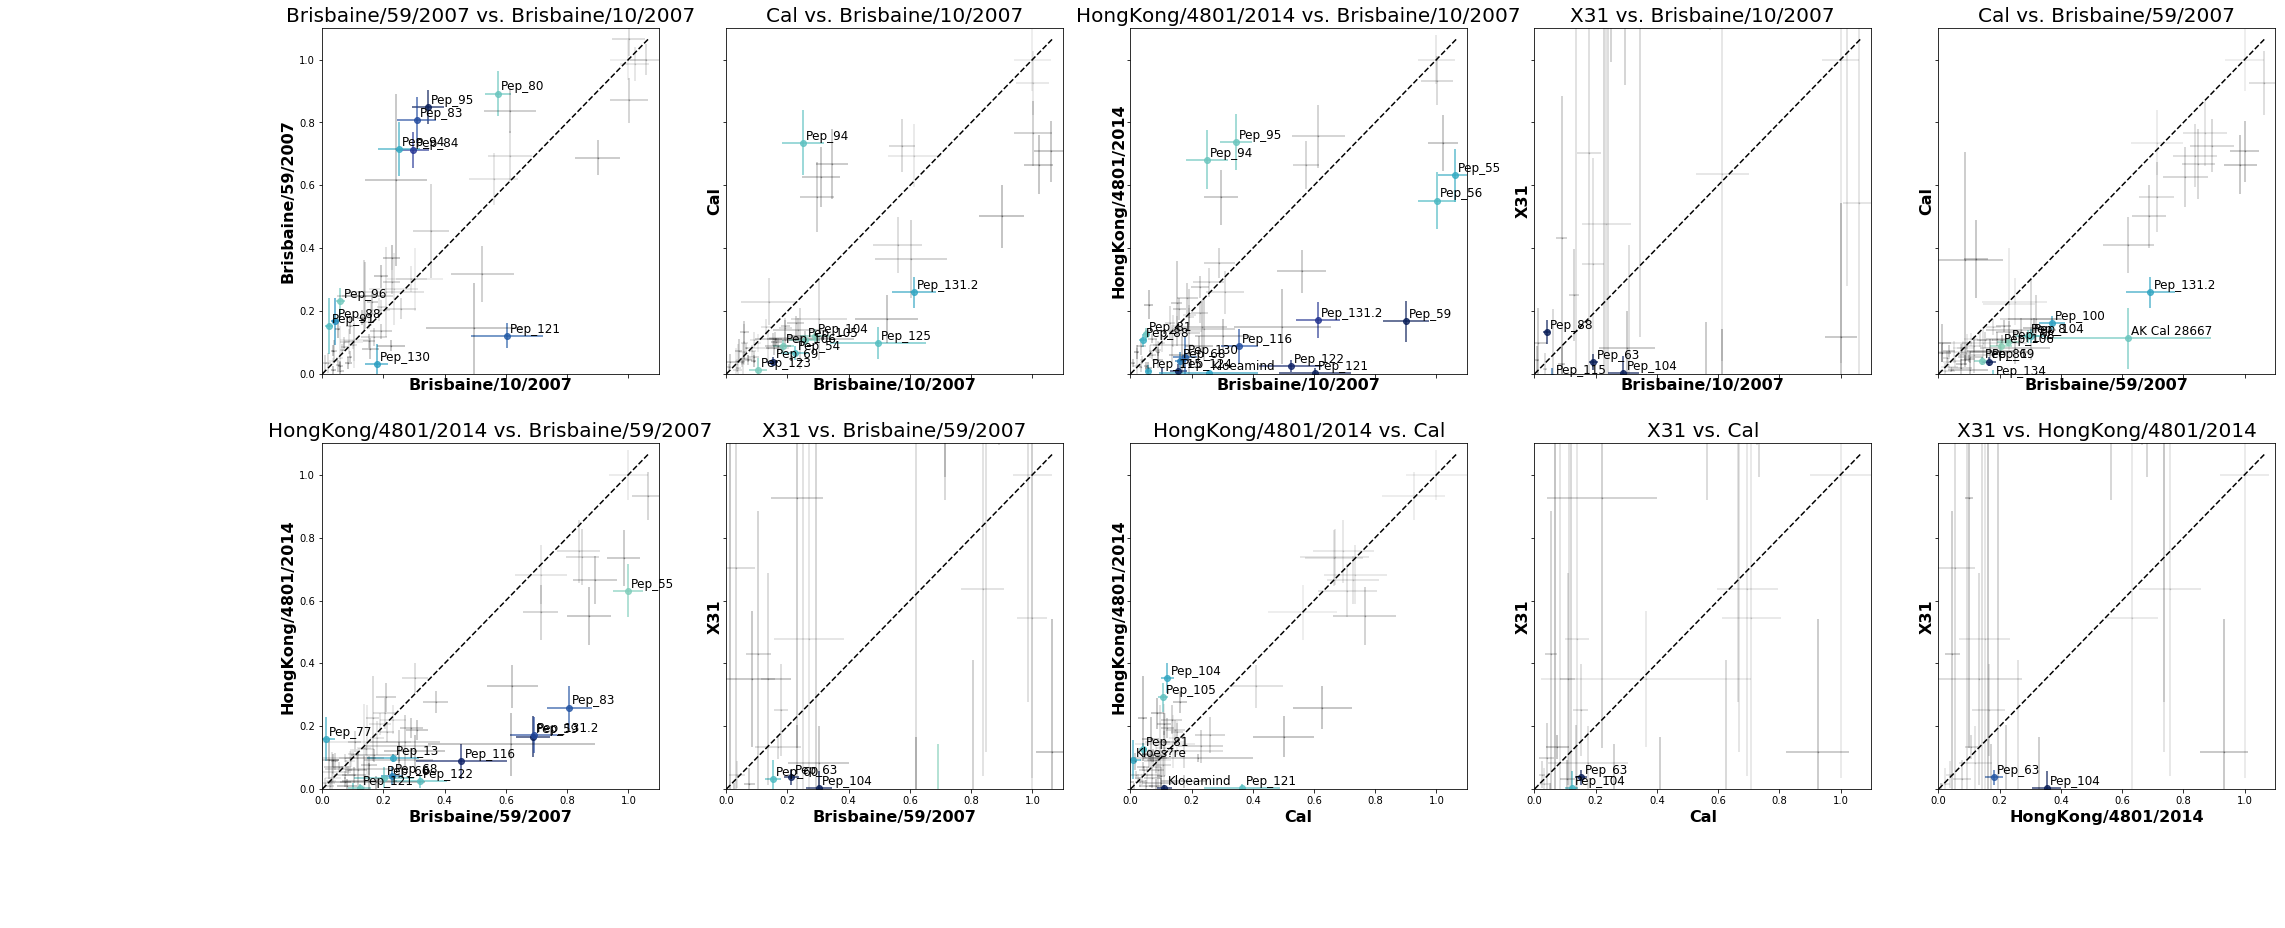

In [187]:
plt.close()
fig, axes = plt.subplots(ncols=5,nrows=2, sharex=True,sharey=True,figsize = (35,14))

ax_it = iter(axes.flatten())
peptide_c_signif.dropna(inplace=True)
cmap = cm.YlGnBu
for name, d in peptide_c_signif.groupby("Viruses"):
    x = y = np.linspace(peptide_c_signif.v1_i.min(),peptide_c_signif.v1_i.max())
    ax = next(ax_it)
    ax.plot(x,y,linestyle="--",marker=" ", c="k", alpha=1)
    ax.set_title("{} vs. {}".format(name[1],name[0]), size = 20)
    ax.set_xlabel(name[0], size = 16, weight = 'bold')
    ax.set_ylabel(name[1], size = 16, weight = 'bold')
    ax.set_xlim(0,1.1)
    ax.set_ylim(0,1.1)

    
    #ax.set_xscale("log")
    #ax.set_yscale("log")



    #norm = Normalize(d.Significance.min(),d.Significance.max())
    d.sort_values("Significance",ascending=False, inplace=True)
    boundary = 0.35
    d_selected = d[d["Significance"] > boundary]
    #d_selected = d.loc[d["Peptide"].isin(["Nenad", "Pep_95","Pep_94","Pep_102" ,"Pep_103","Pep_98"])]
    
    d_n = d[d["Significance"] < boundary]

    

    alphas = iter(np.linspace(0.3,0.05,len(d)))
    

    for ii, dp in d_selected.iterrows():
        #if dp.Significance is not np.NaN:
            c = cmap(dp.Significance)
            ax.errorbar(x=dp.v1_i,y=dp.v2_i,xerr=dp.v1_err,yerr=dp.v2_err, c = c, fmt="o",linestyle="",alpha=0.8, capthick=2)
            ax.annotate(dp["Peptide"],(dp.v1_i+0.01,dp.v2_i+0.01), size=12)
    
    for ii, dp in d_n.iterrows():
        c = cmap(dp.Significance)
        ax.errorbar(x=dp.v1_i,y=dp.v2_i,xerr=dp.v1_err,yerr=dp.v2_err, c = "k", fmt="o",linestyle="",alpha=next(alphas), ms = 0.5, capthick=1)
        
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    uri_name1 = name[0].replace("/","-")
    uri_name2 = name[1].replace("/","-")


plt.savefig(directory+"all_correlations.png", bbox_inches="tight")    
plt.show()    

/home/janekg89/Envs/flutype_webapp/lib/python2.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


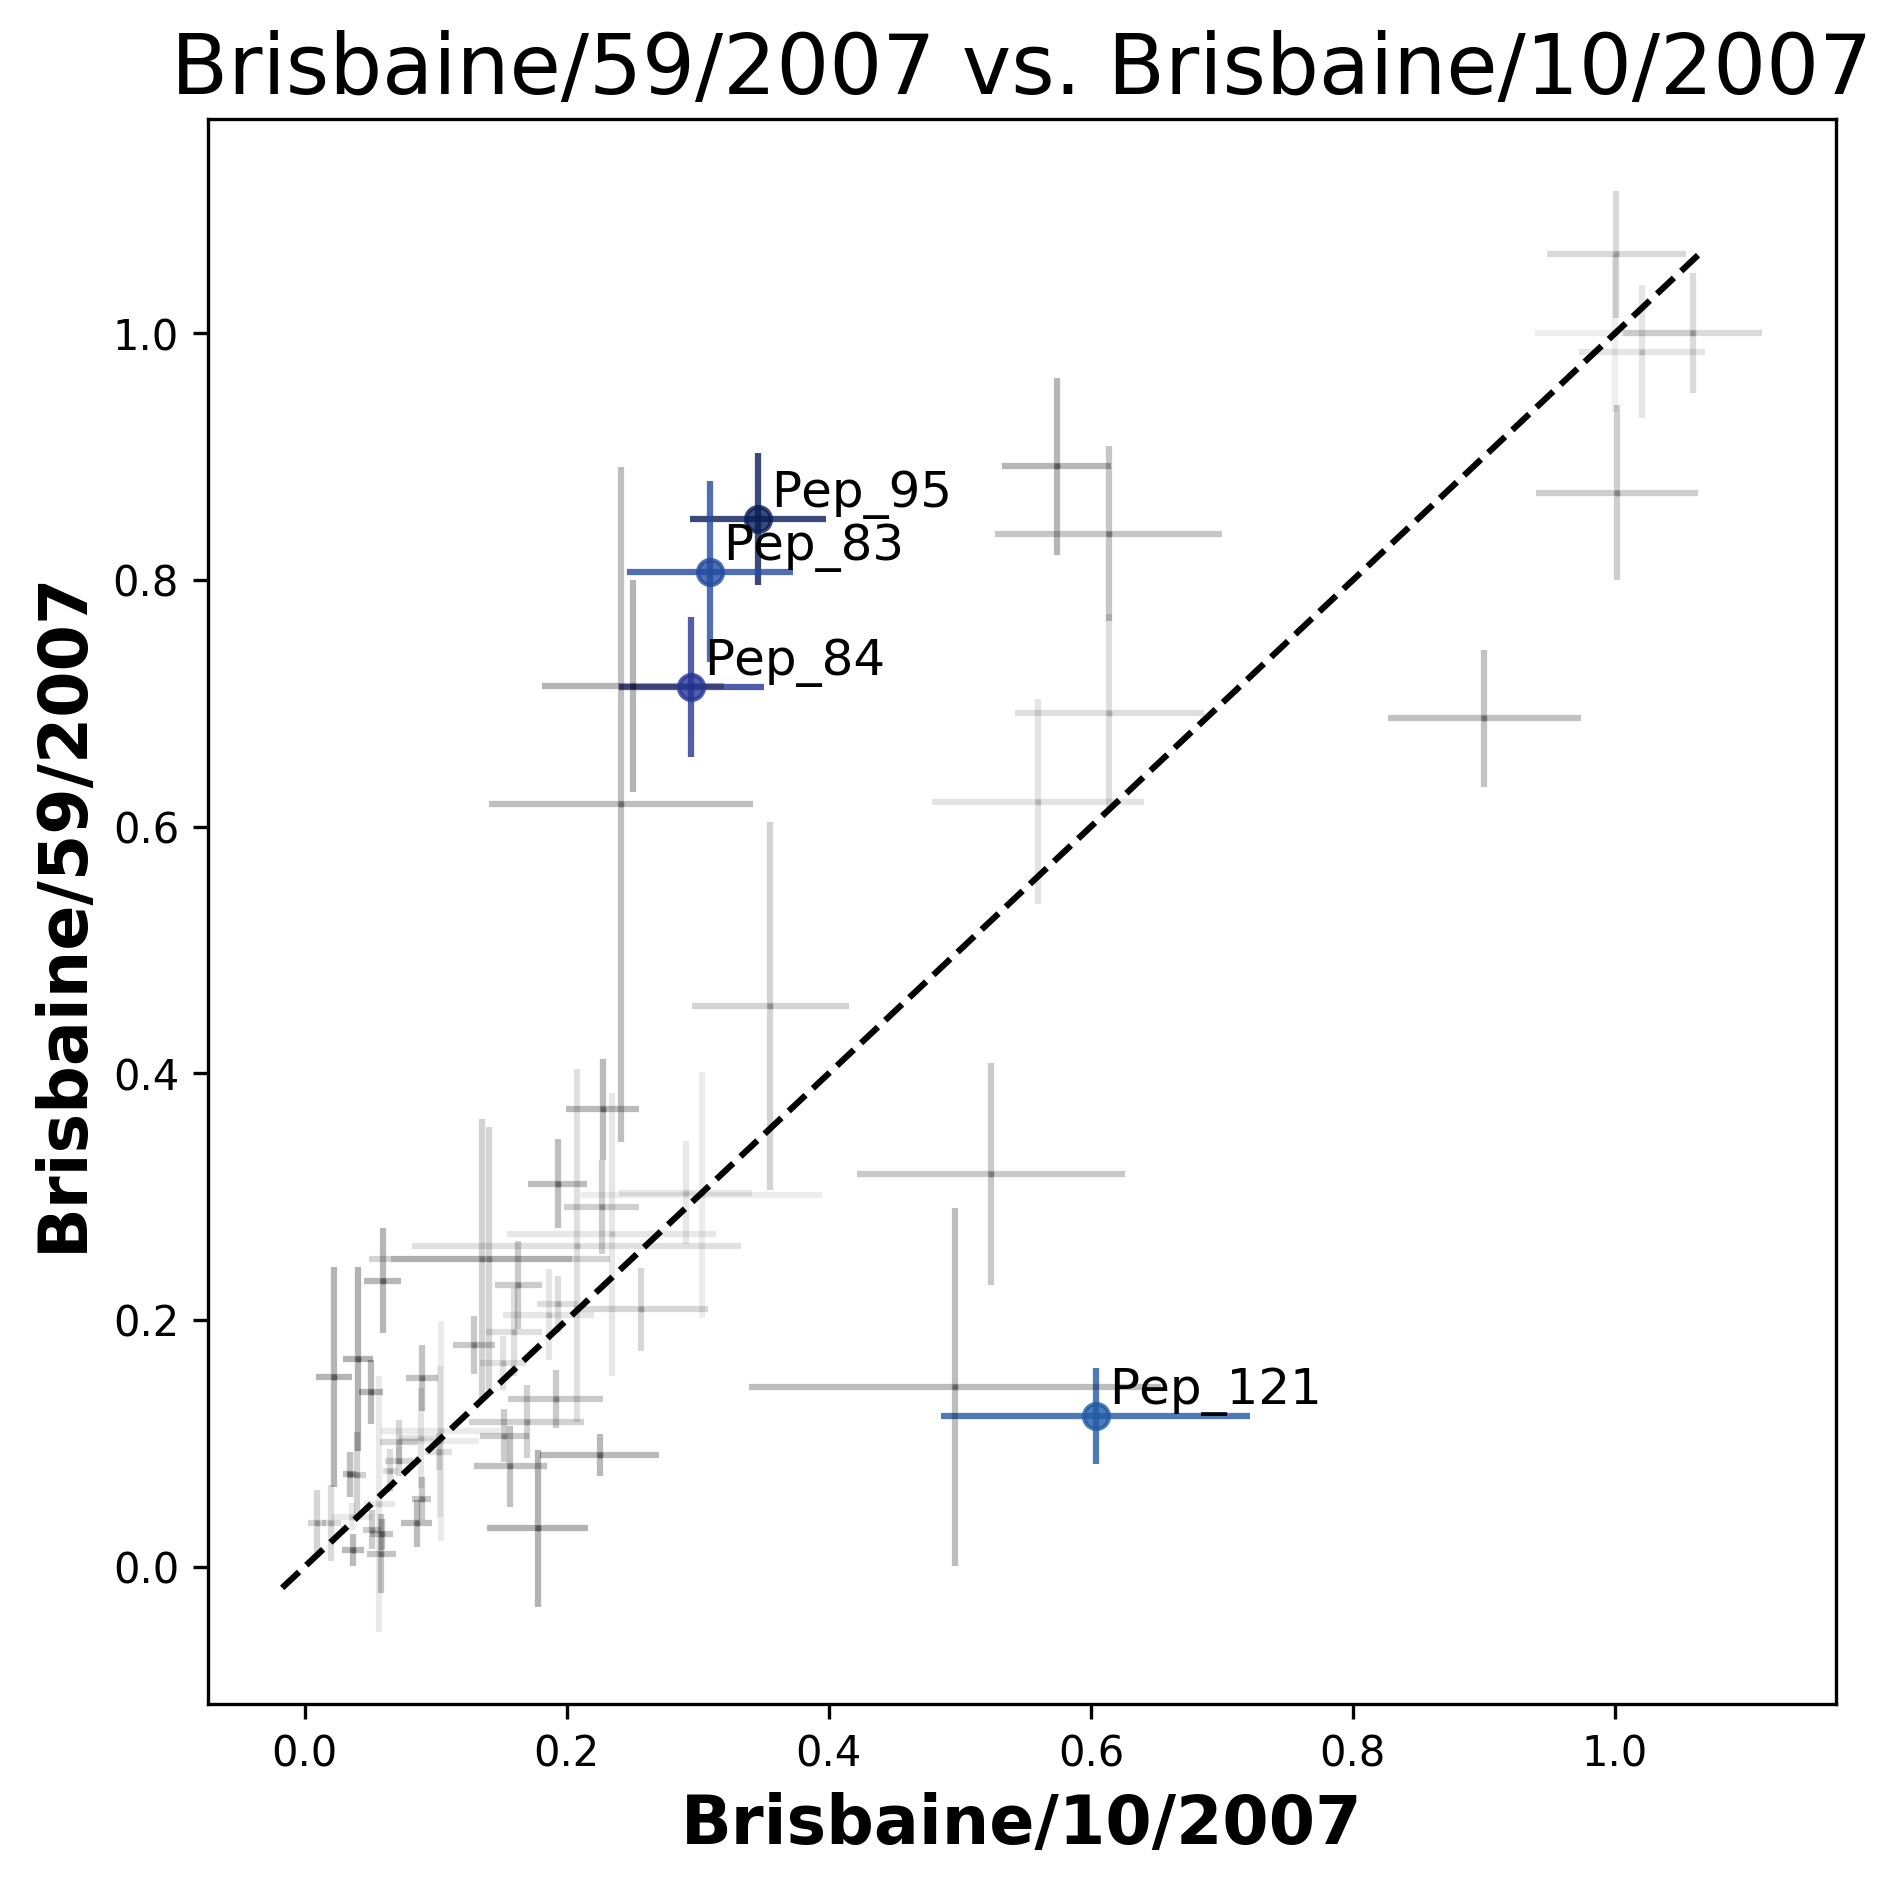

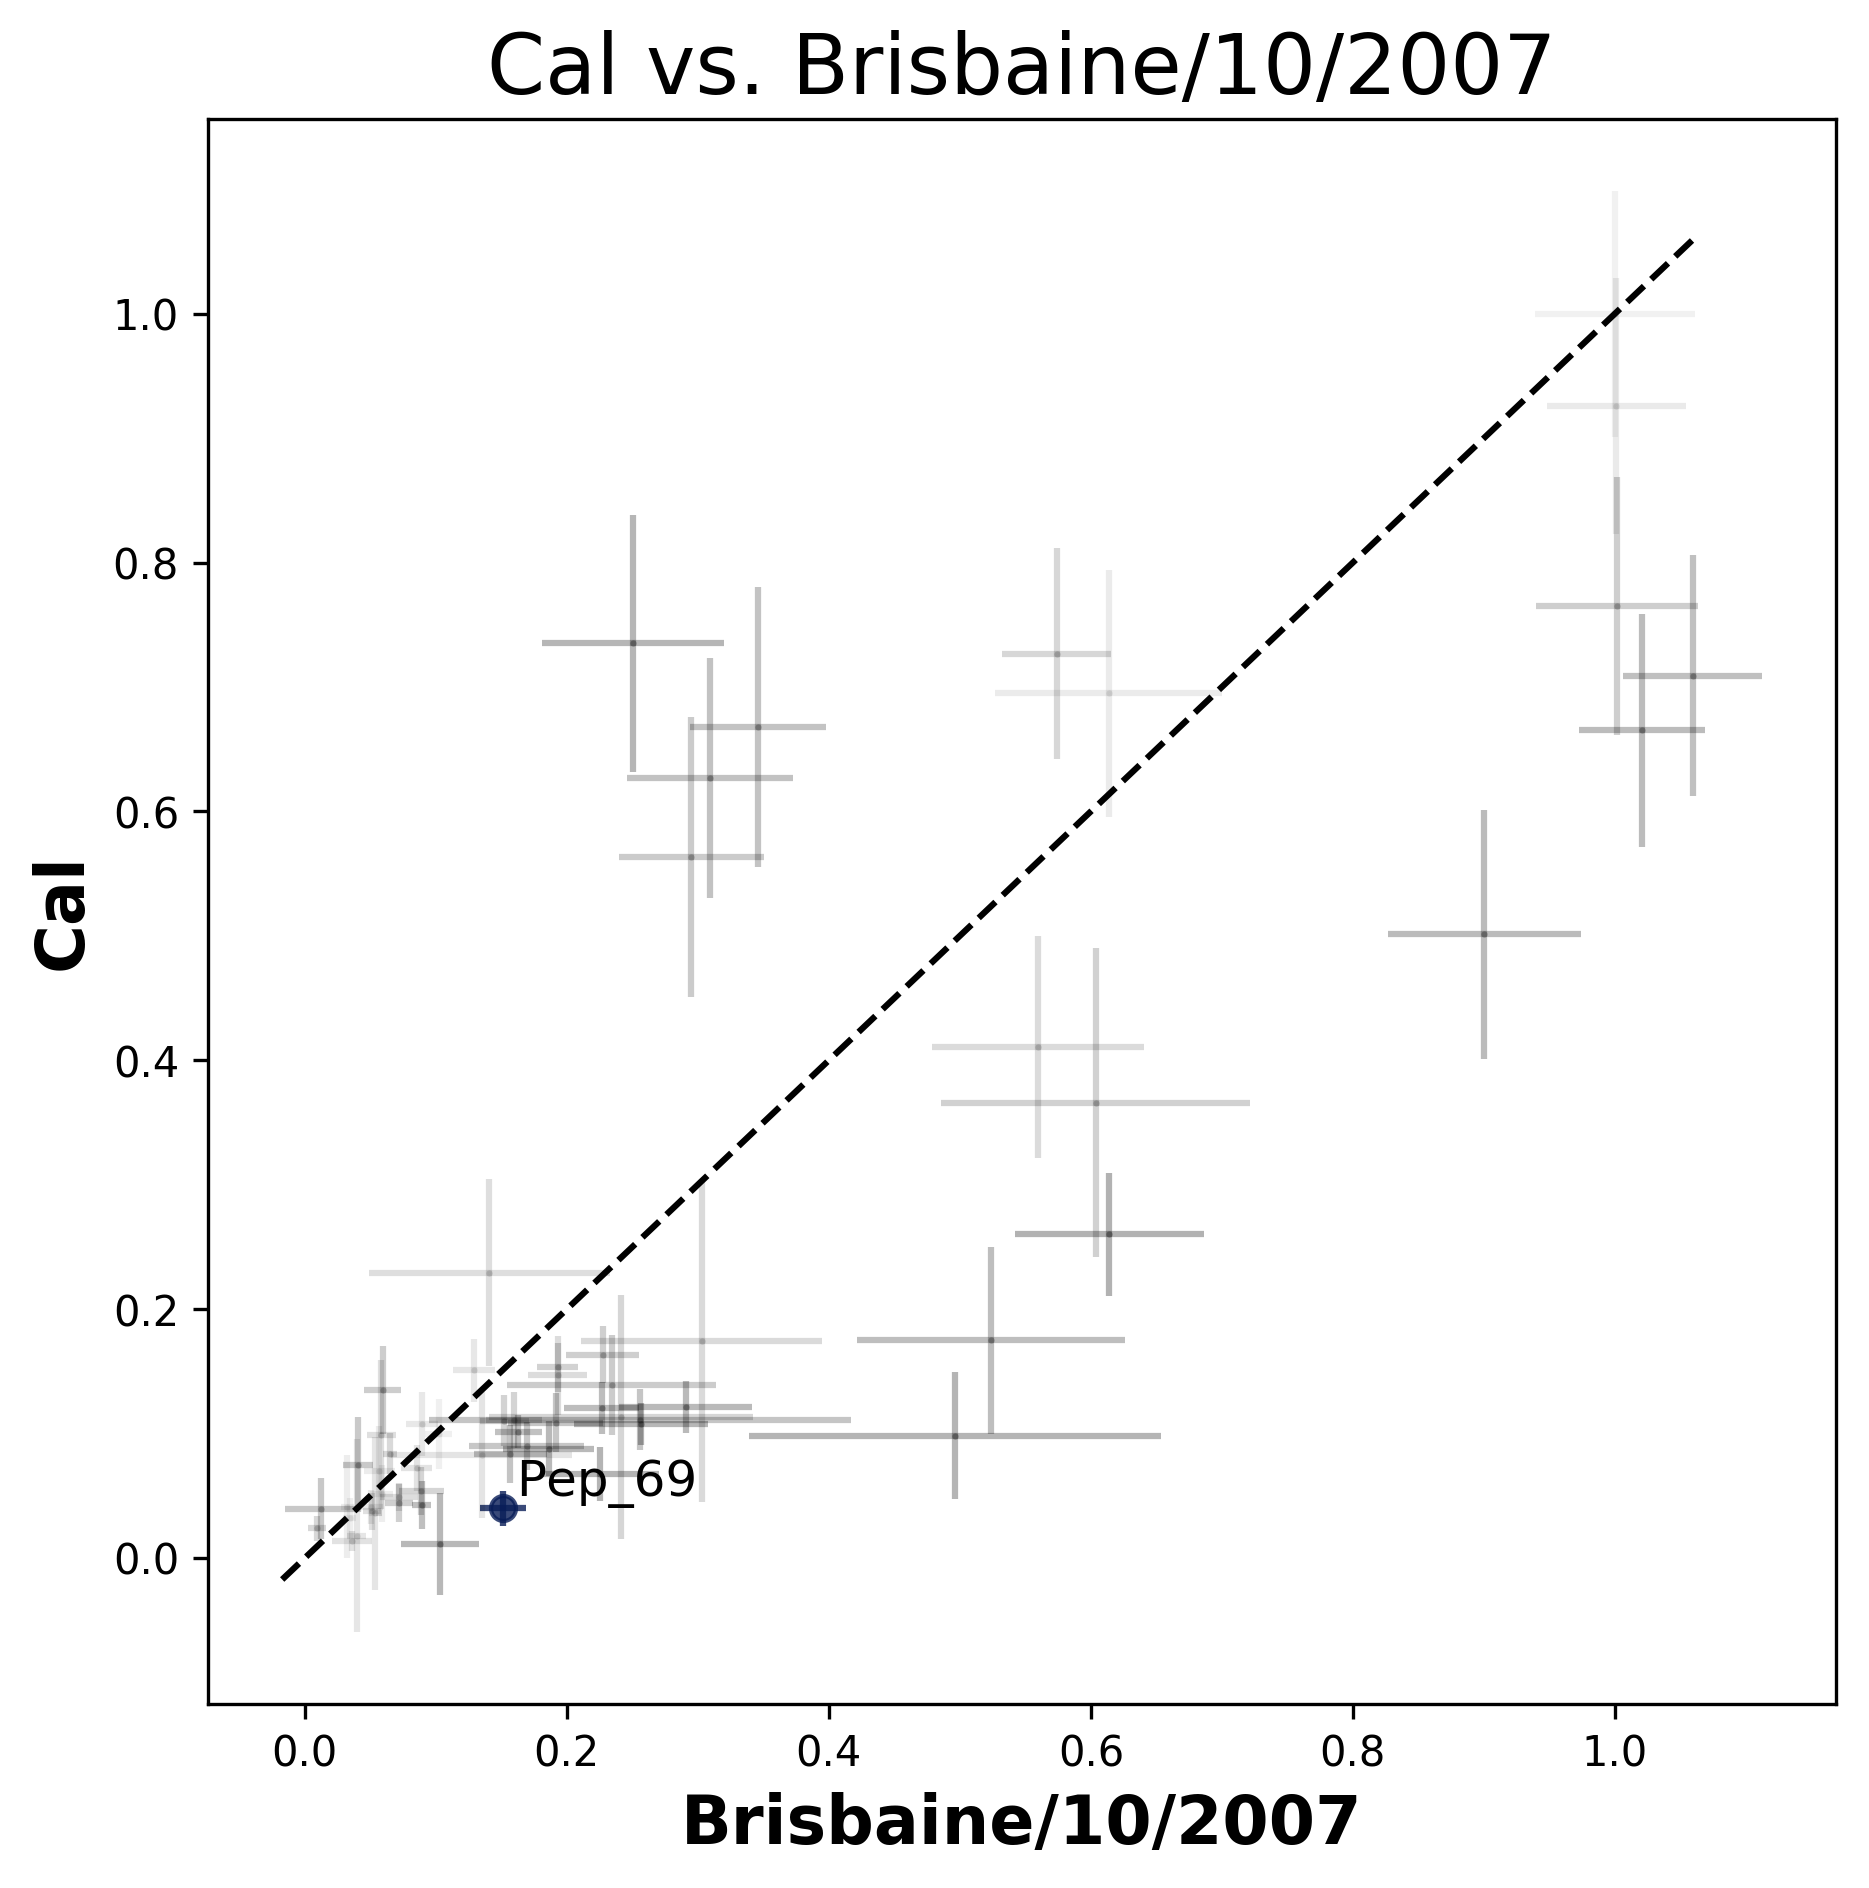

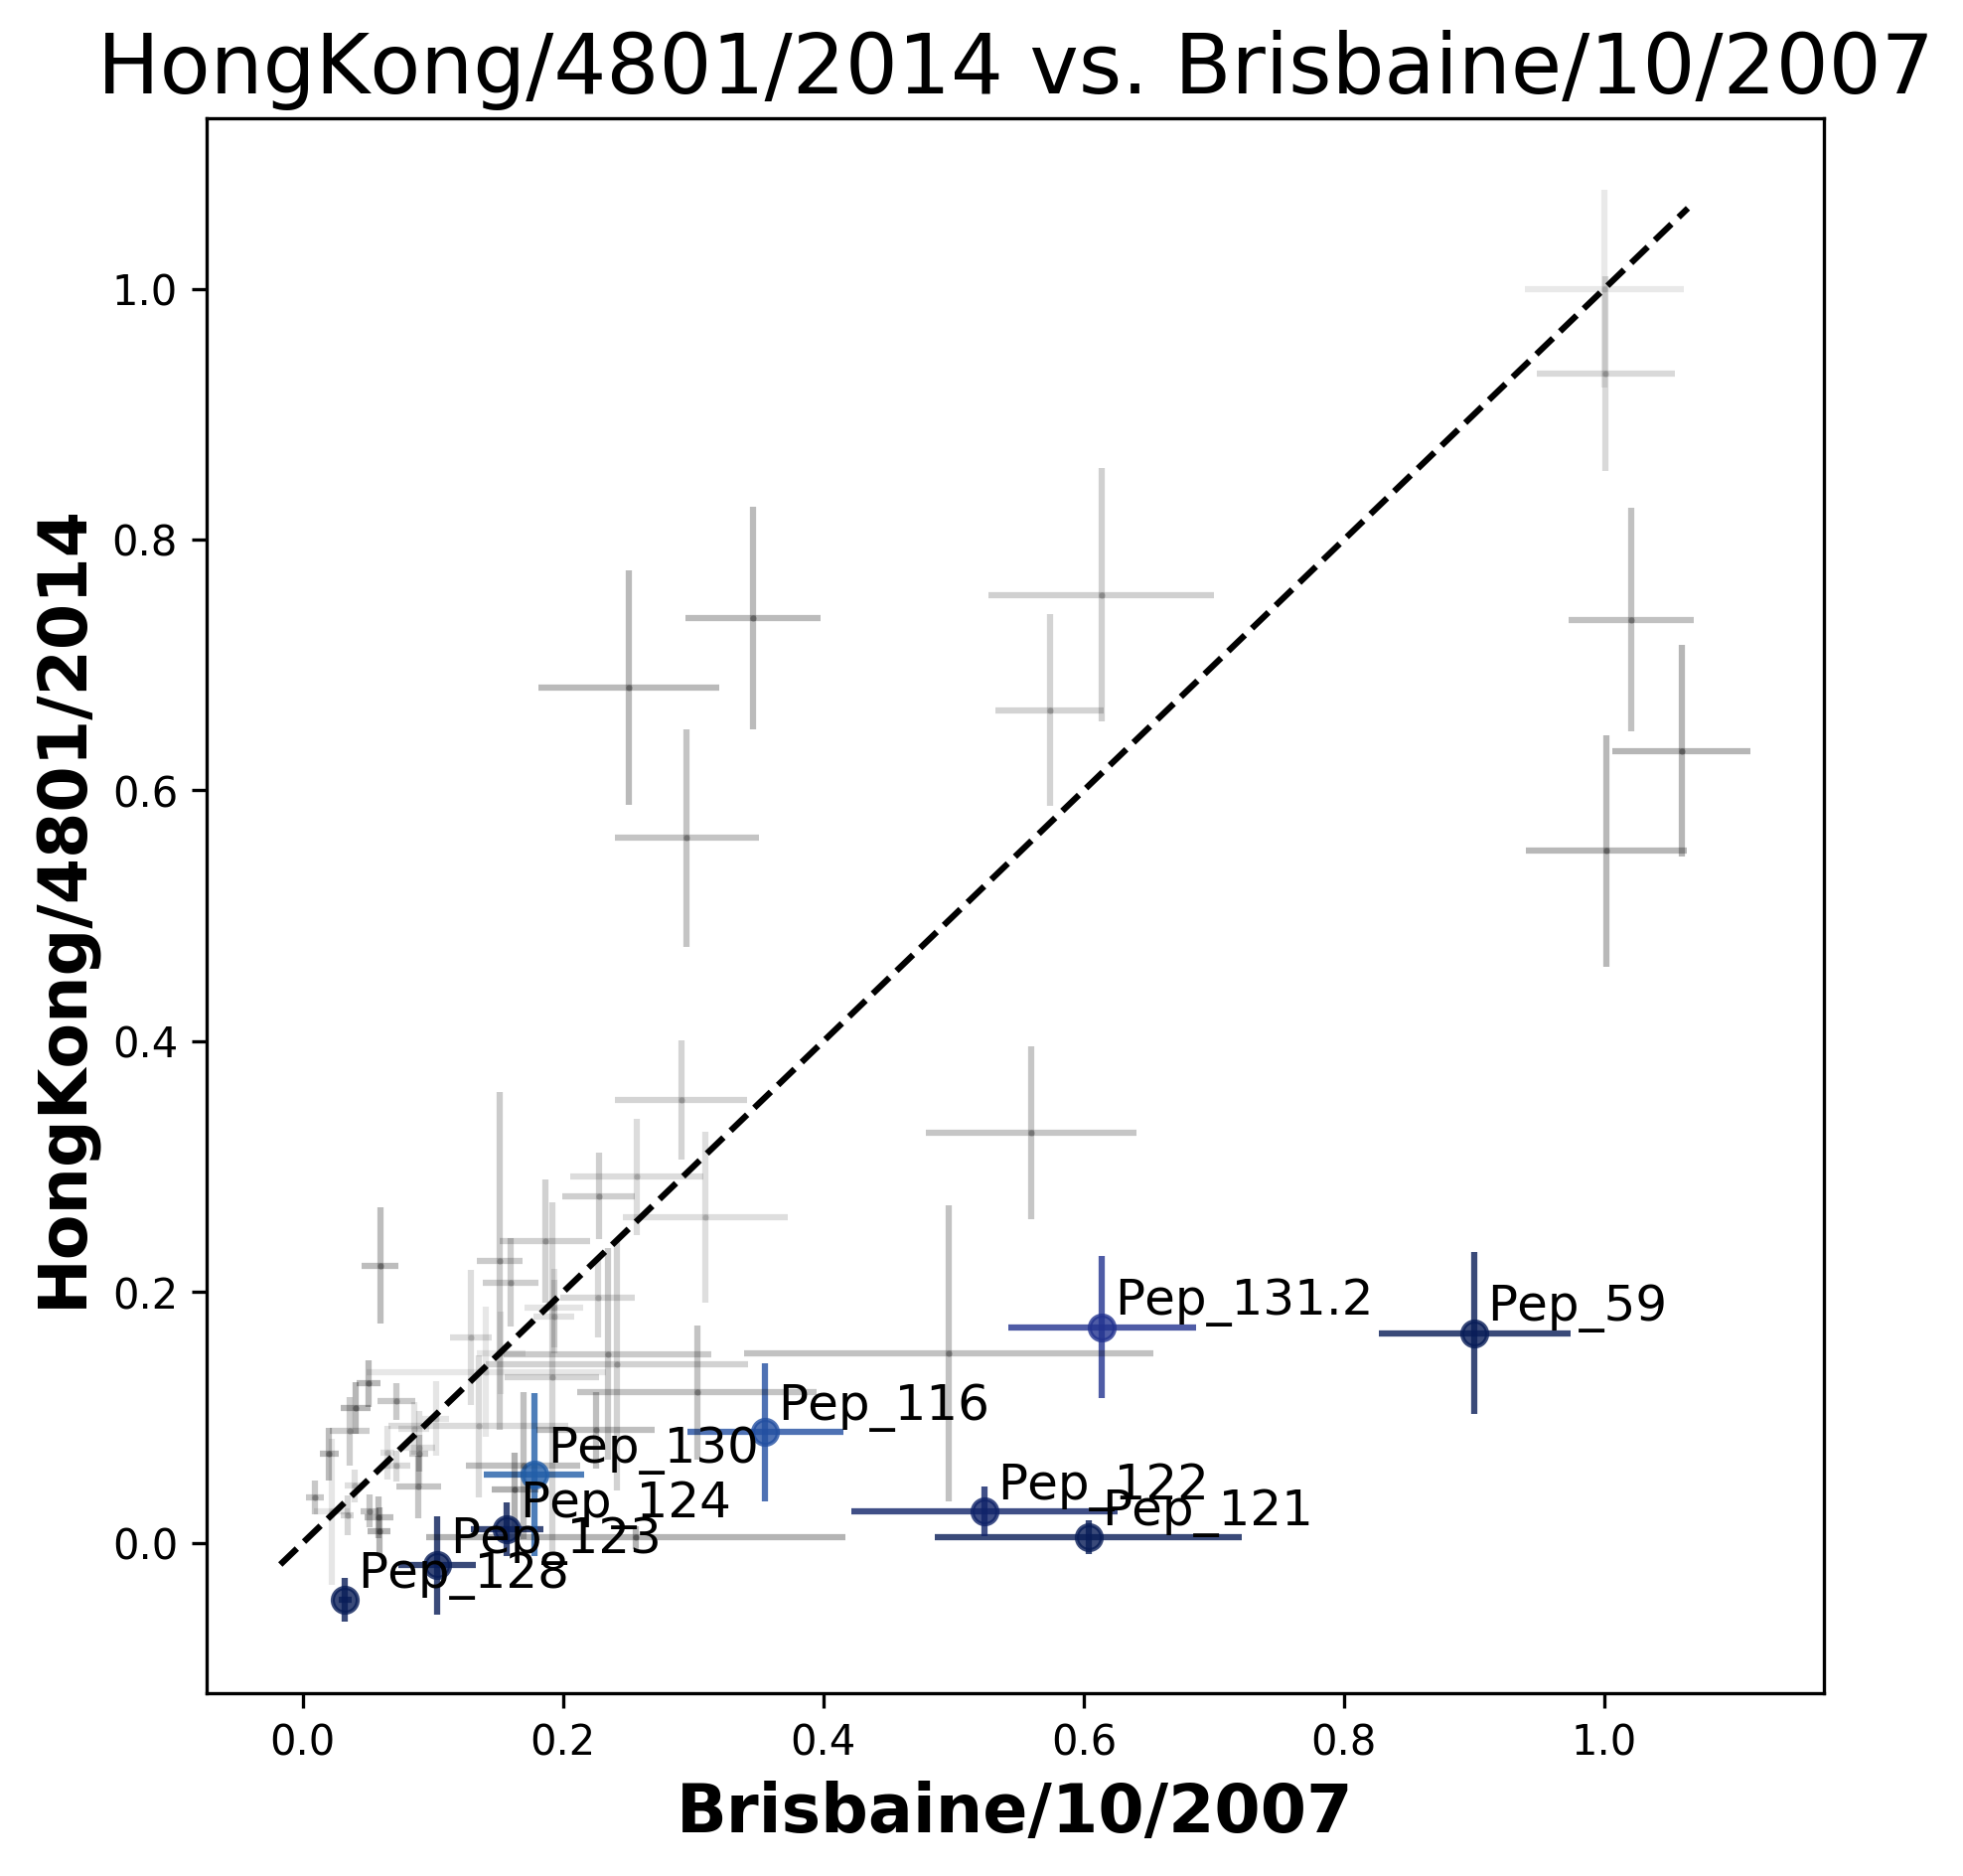

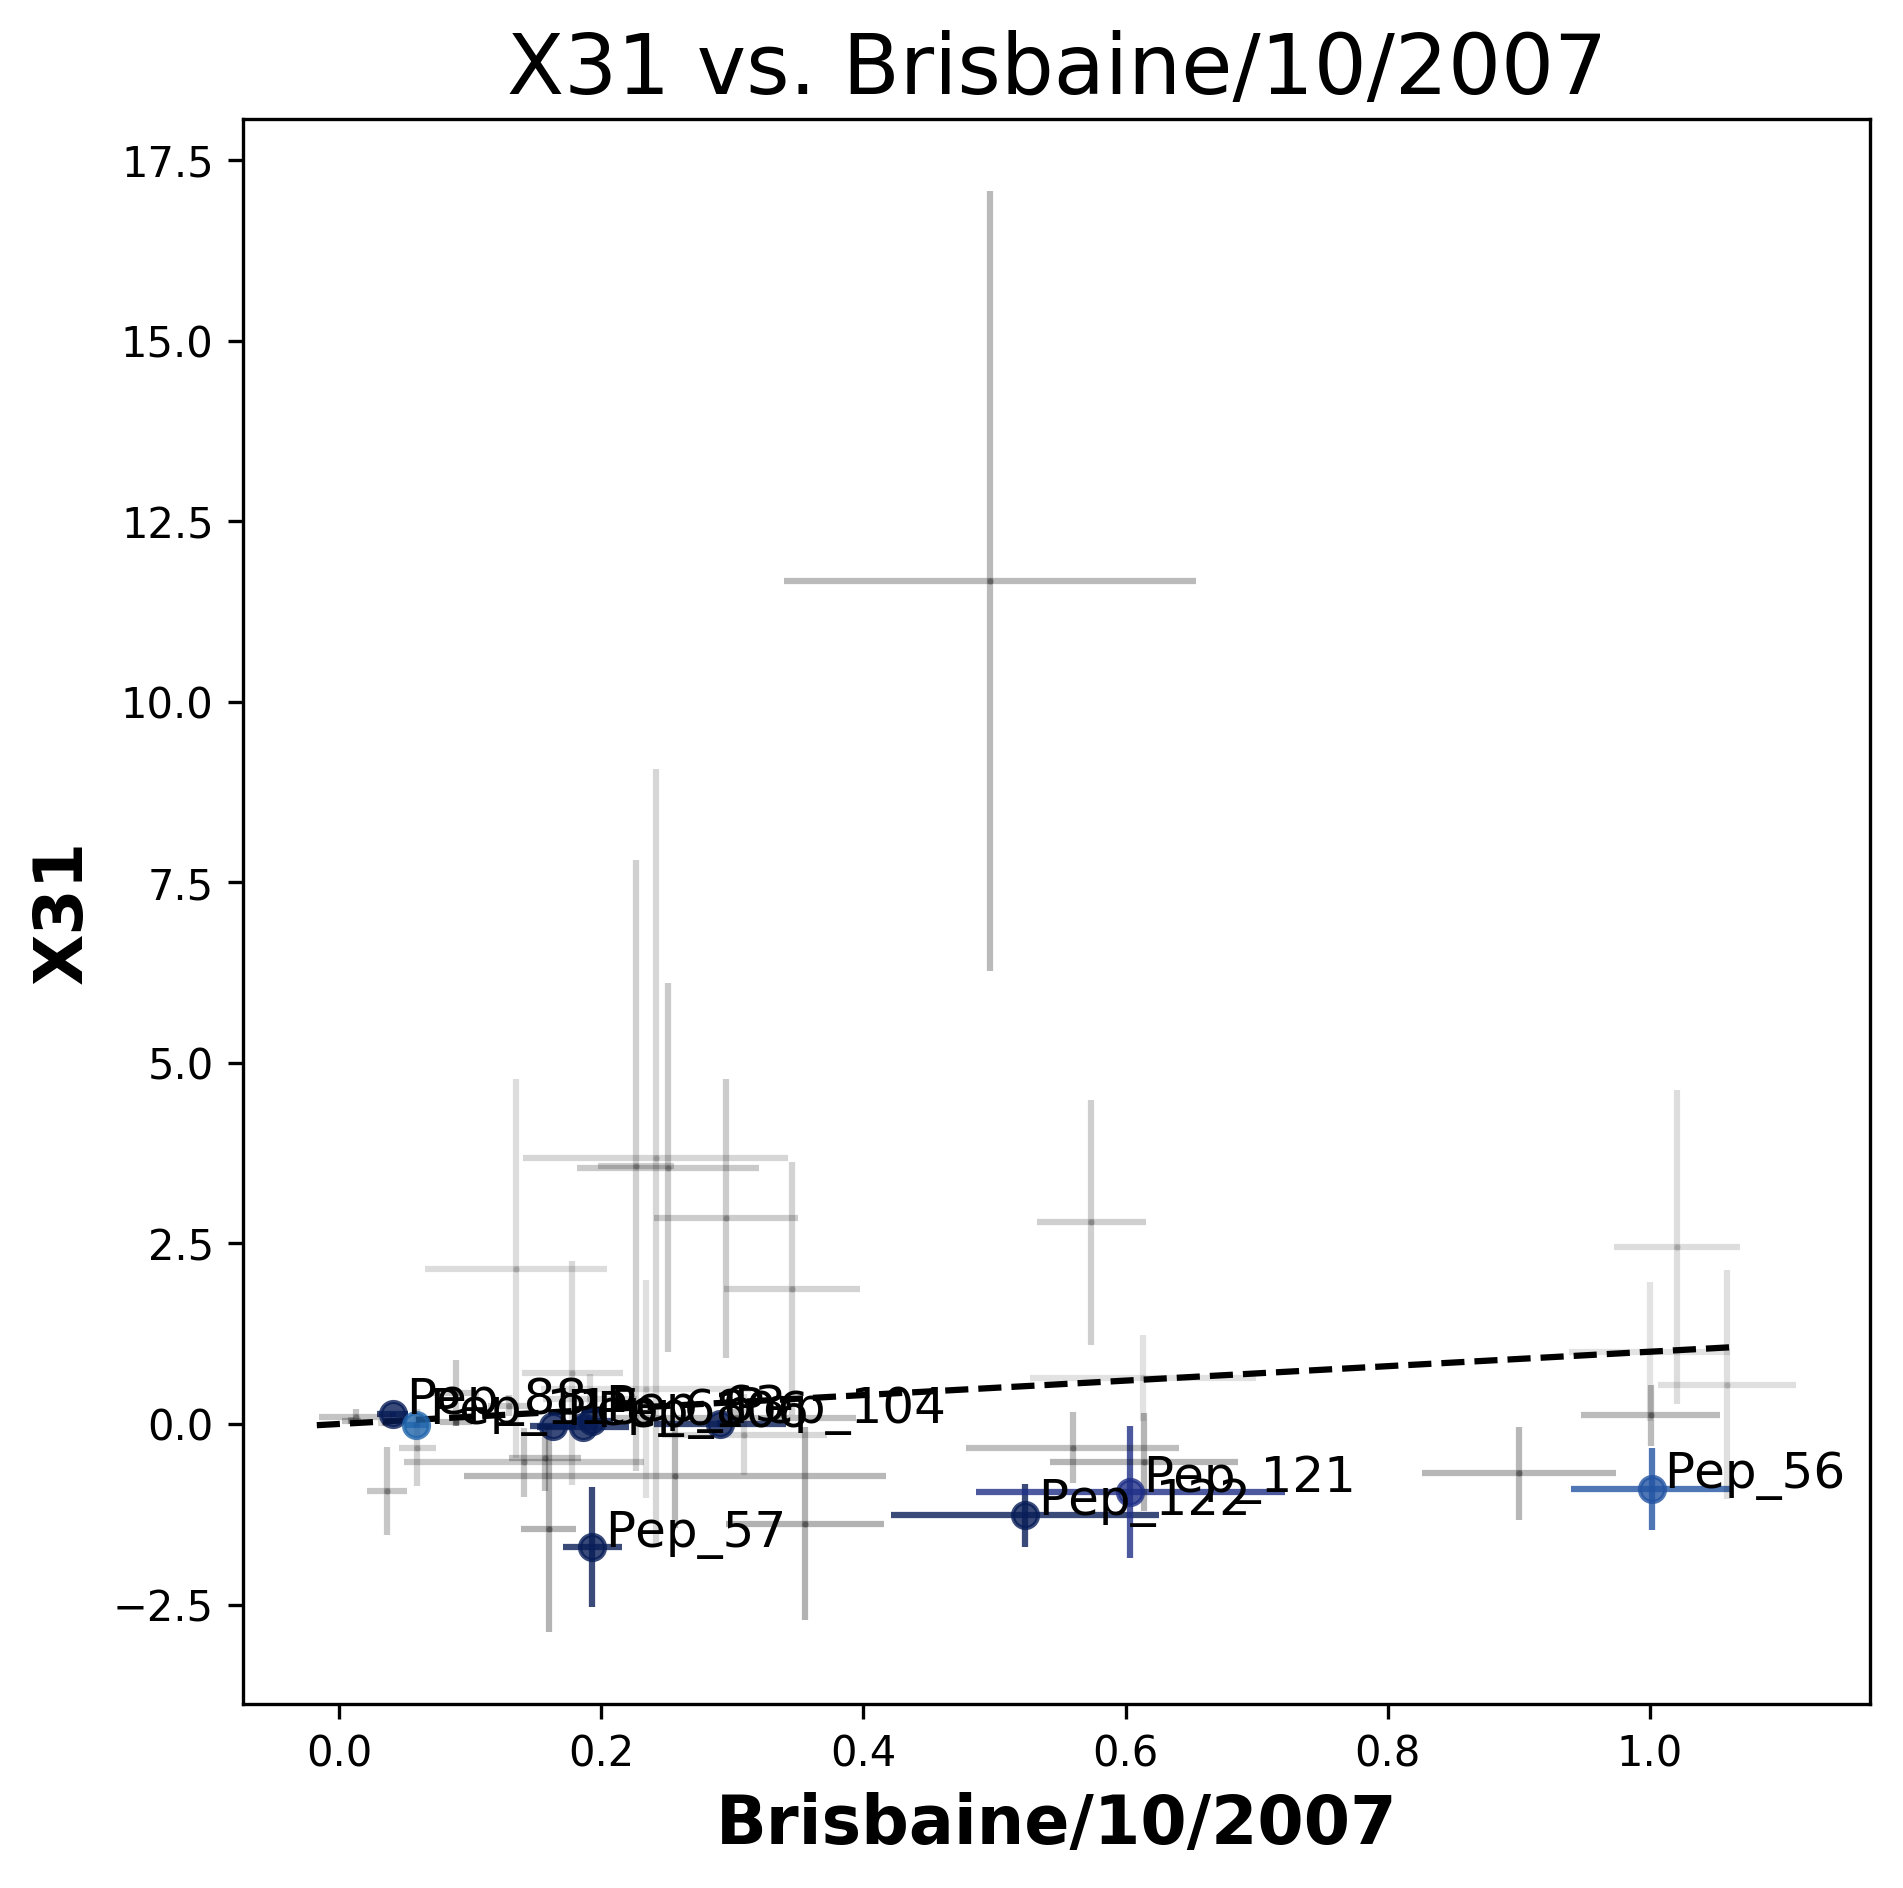

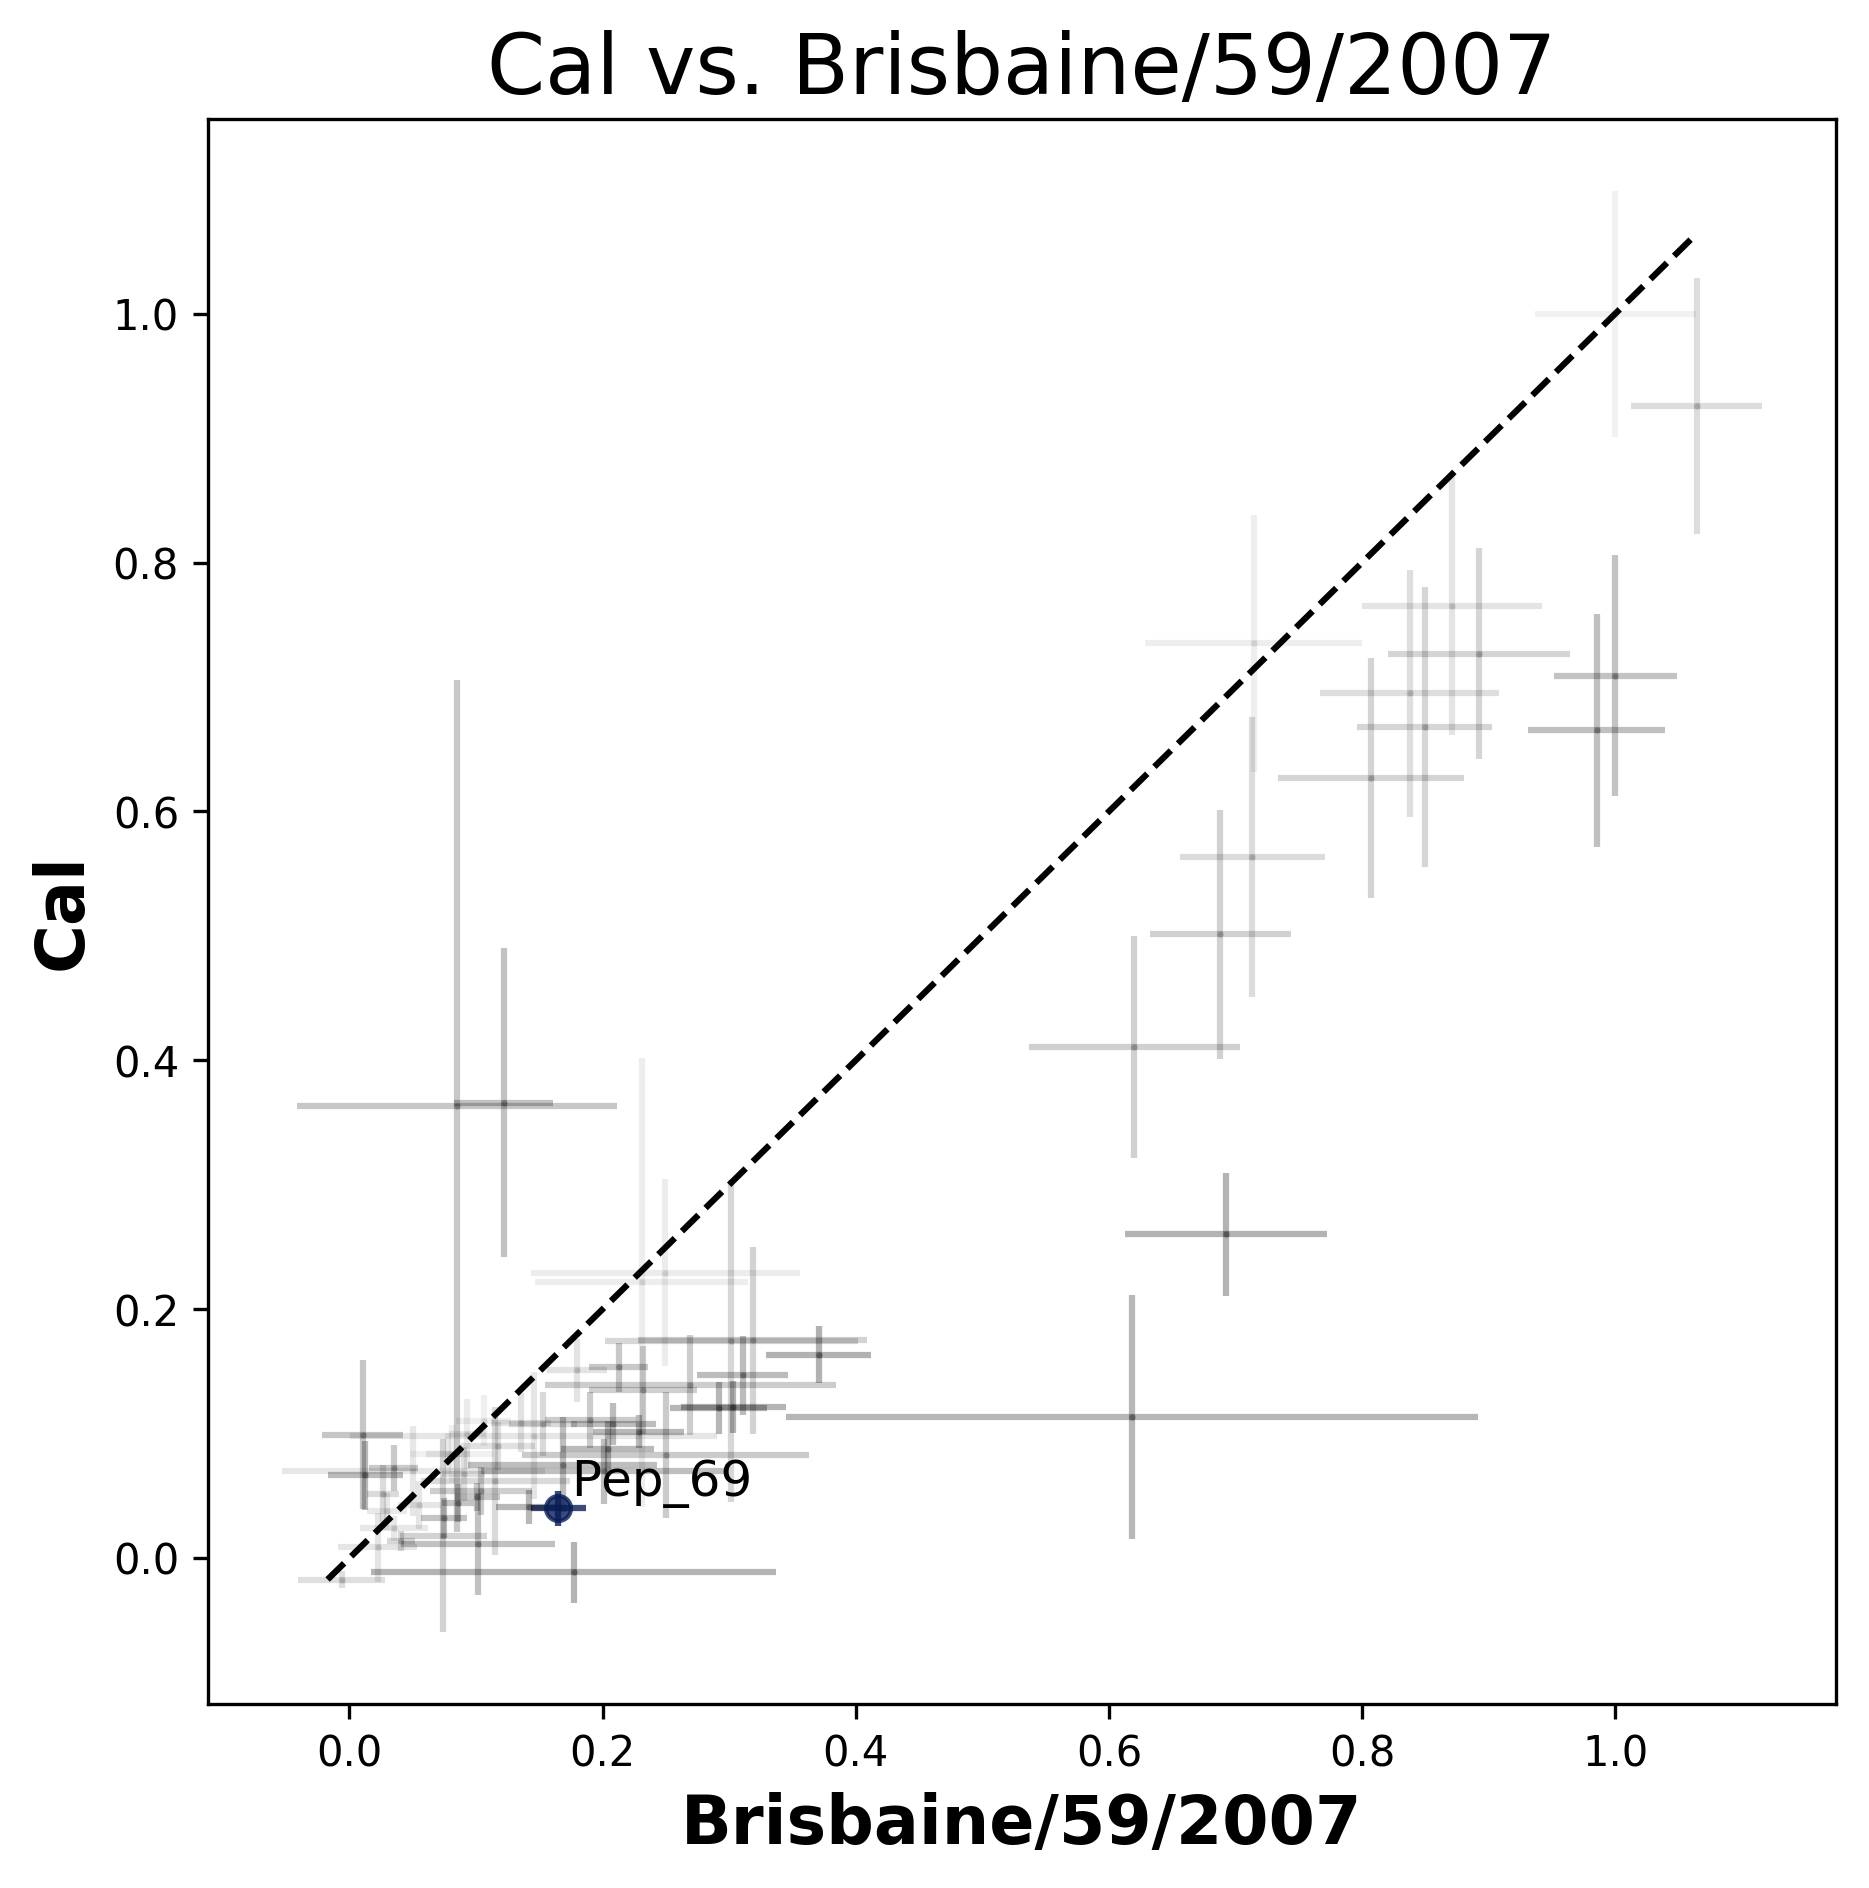

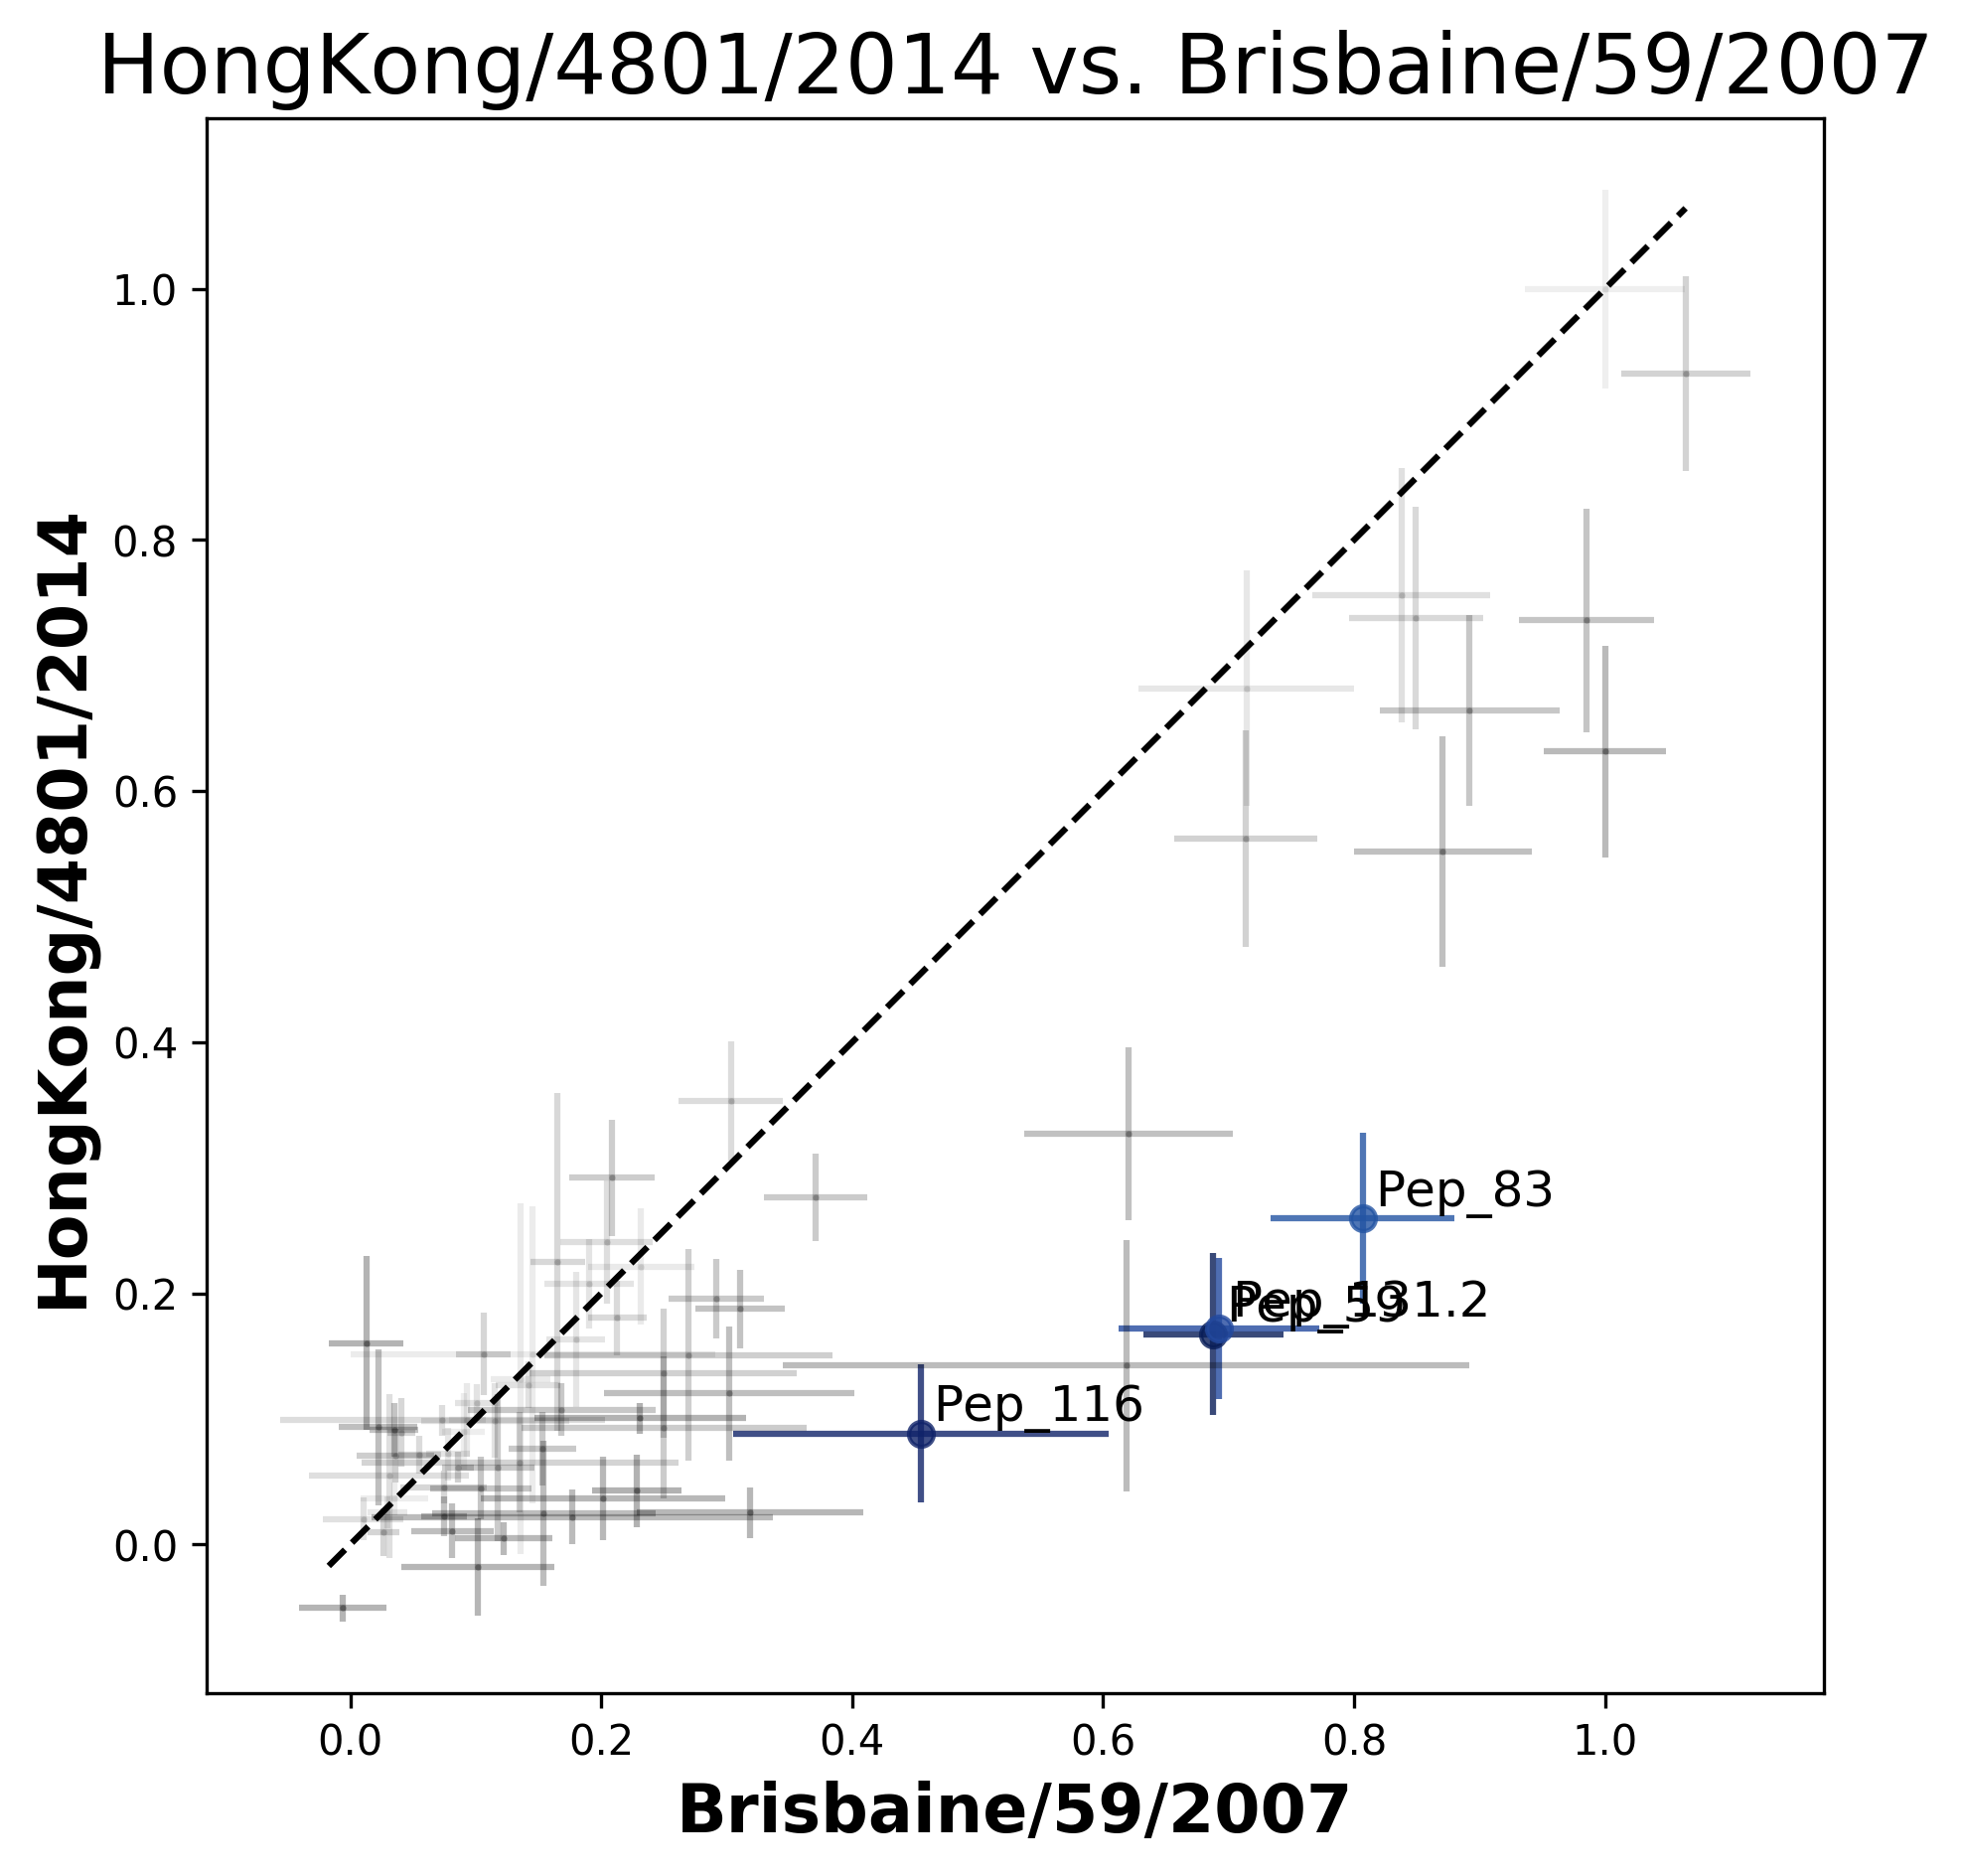

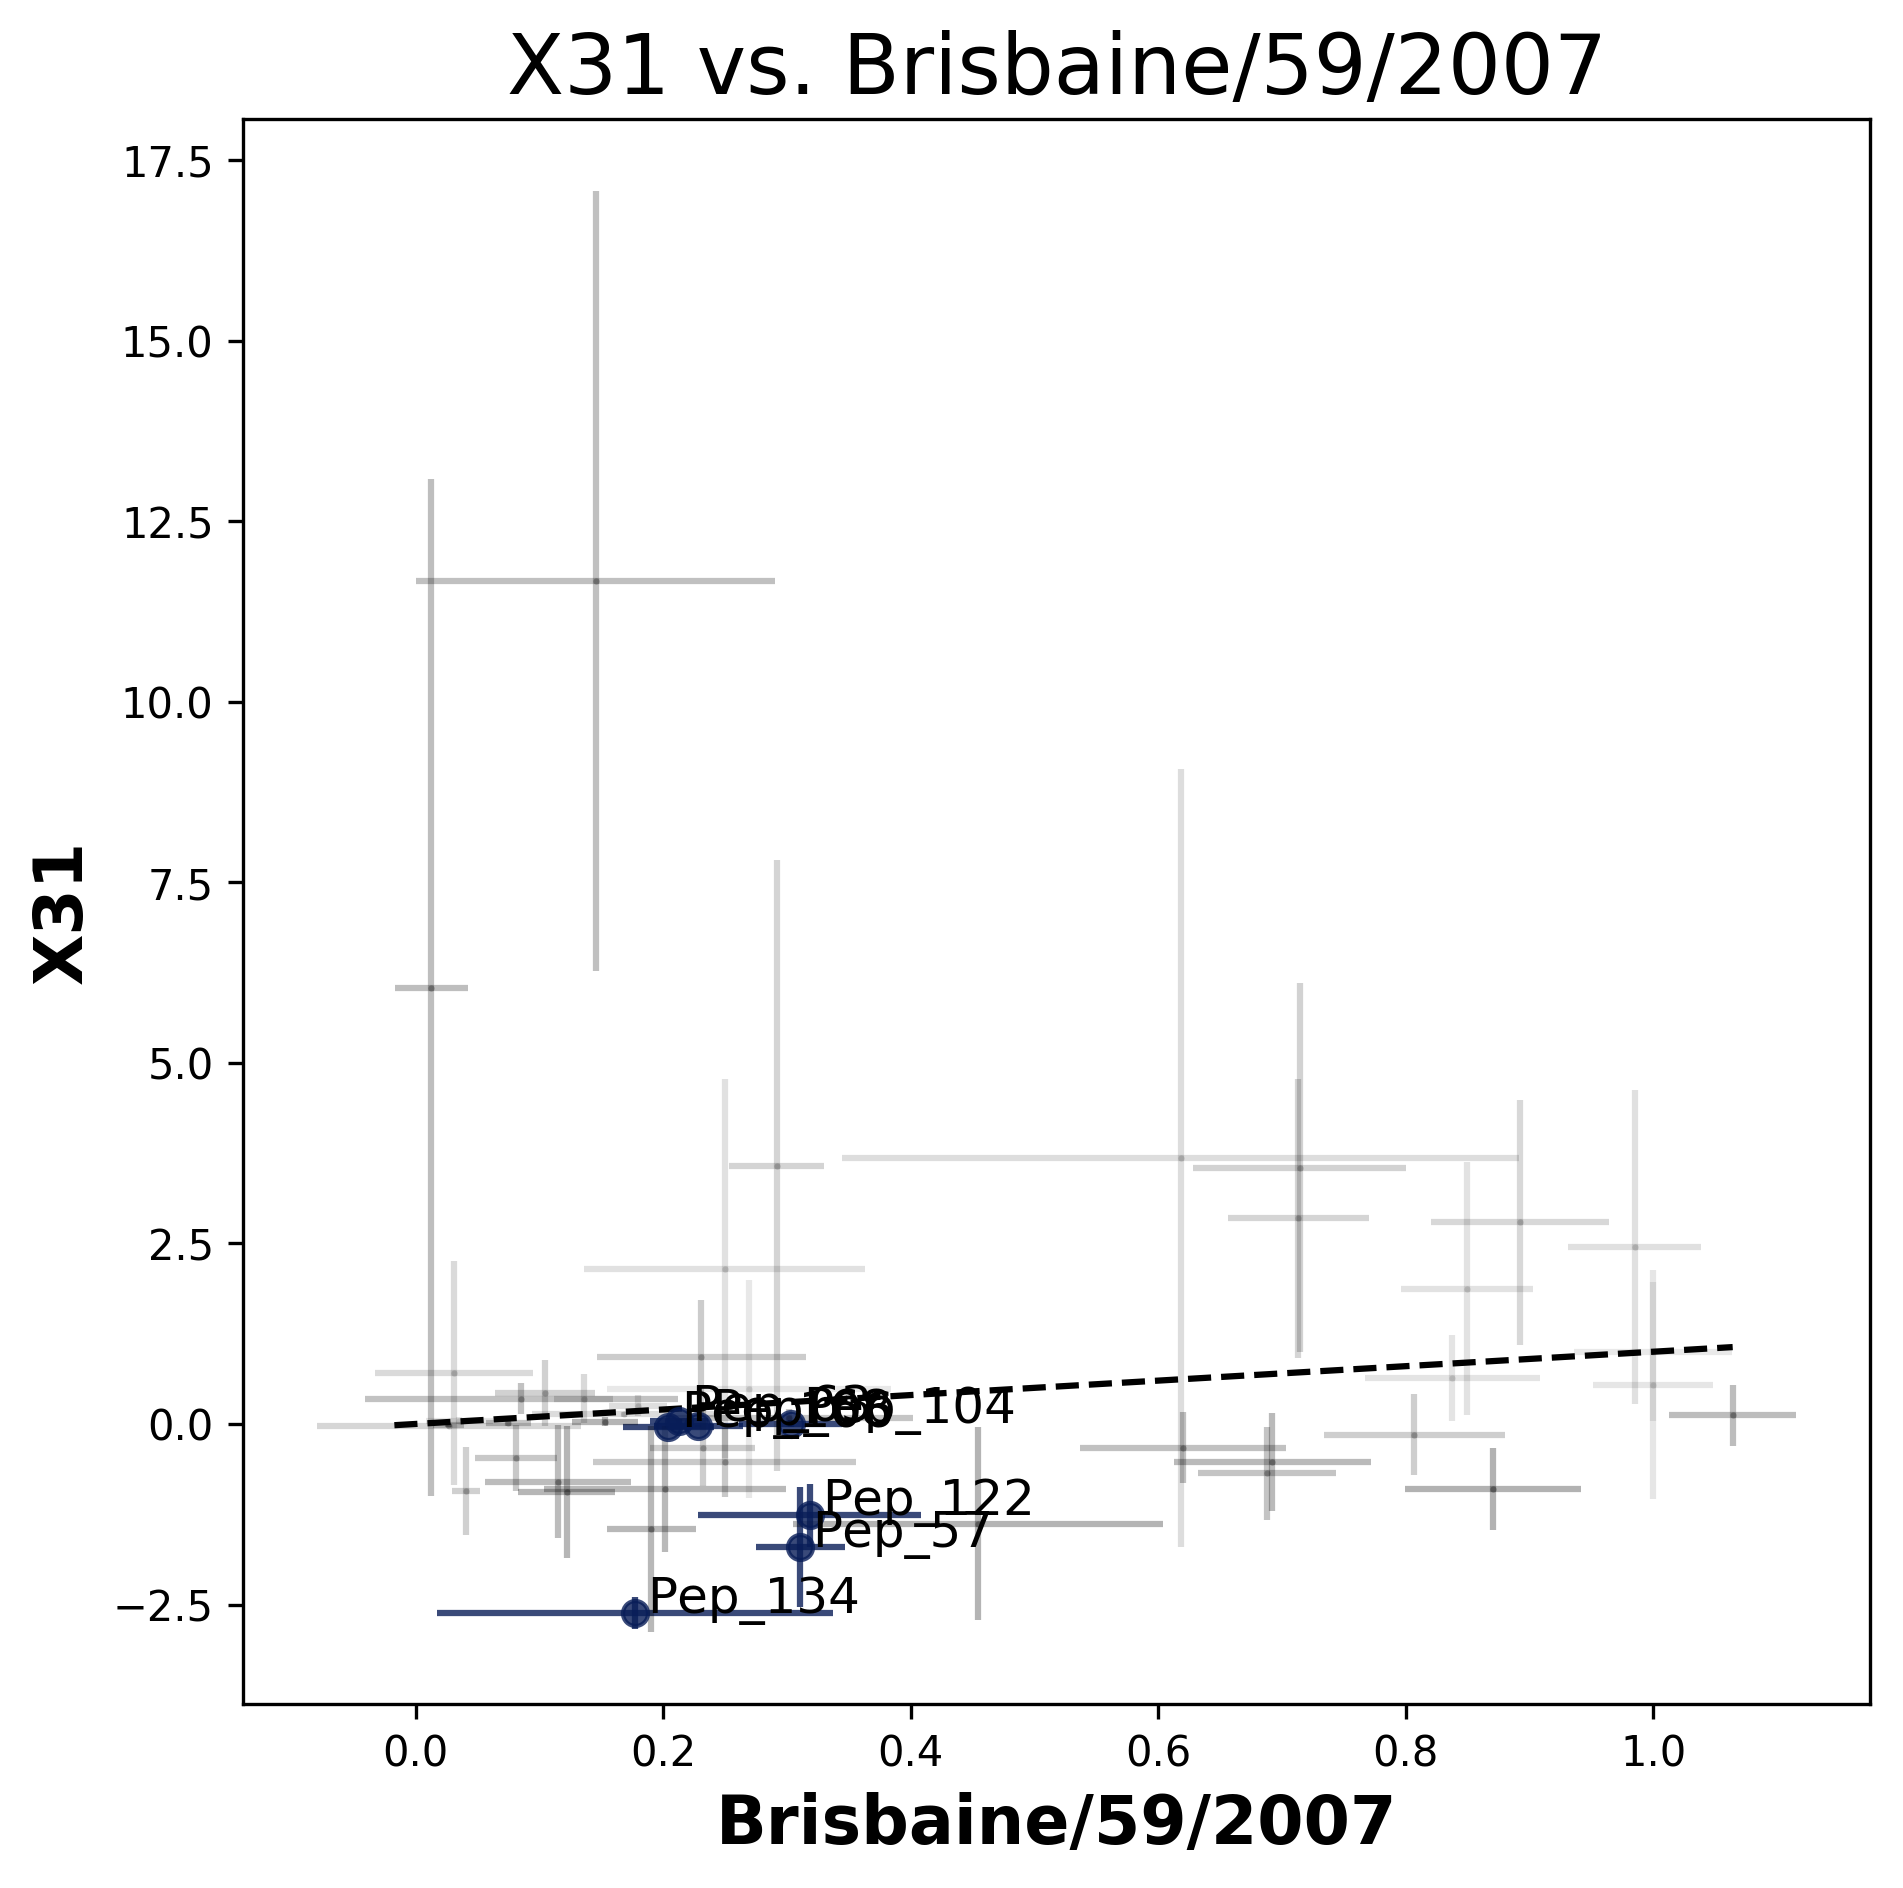

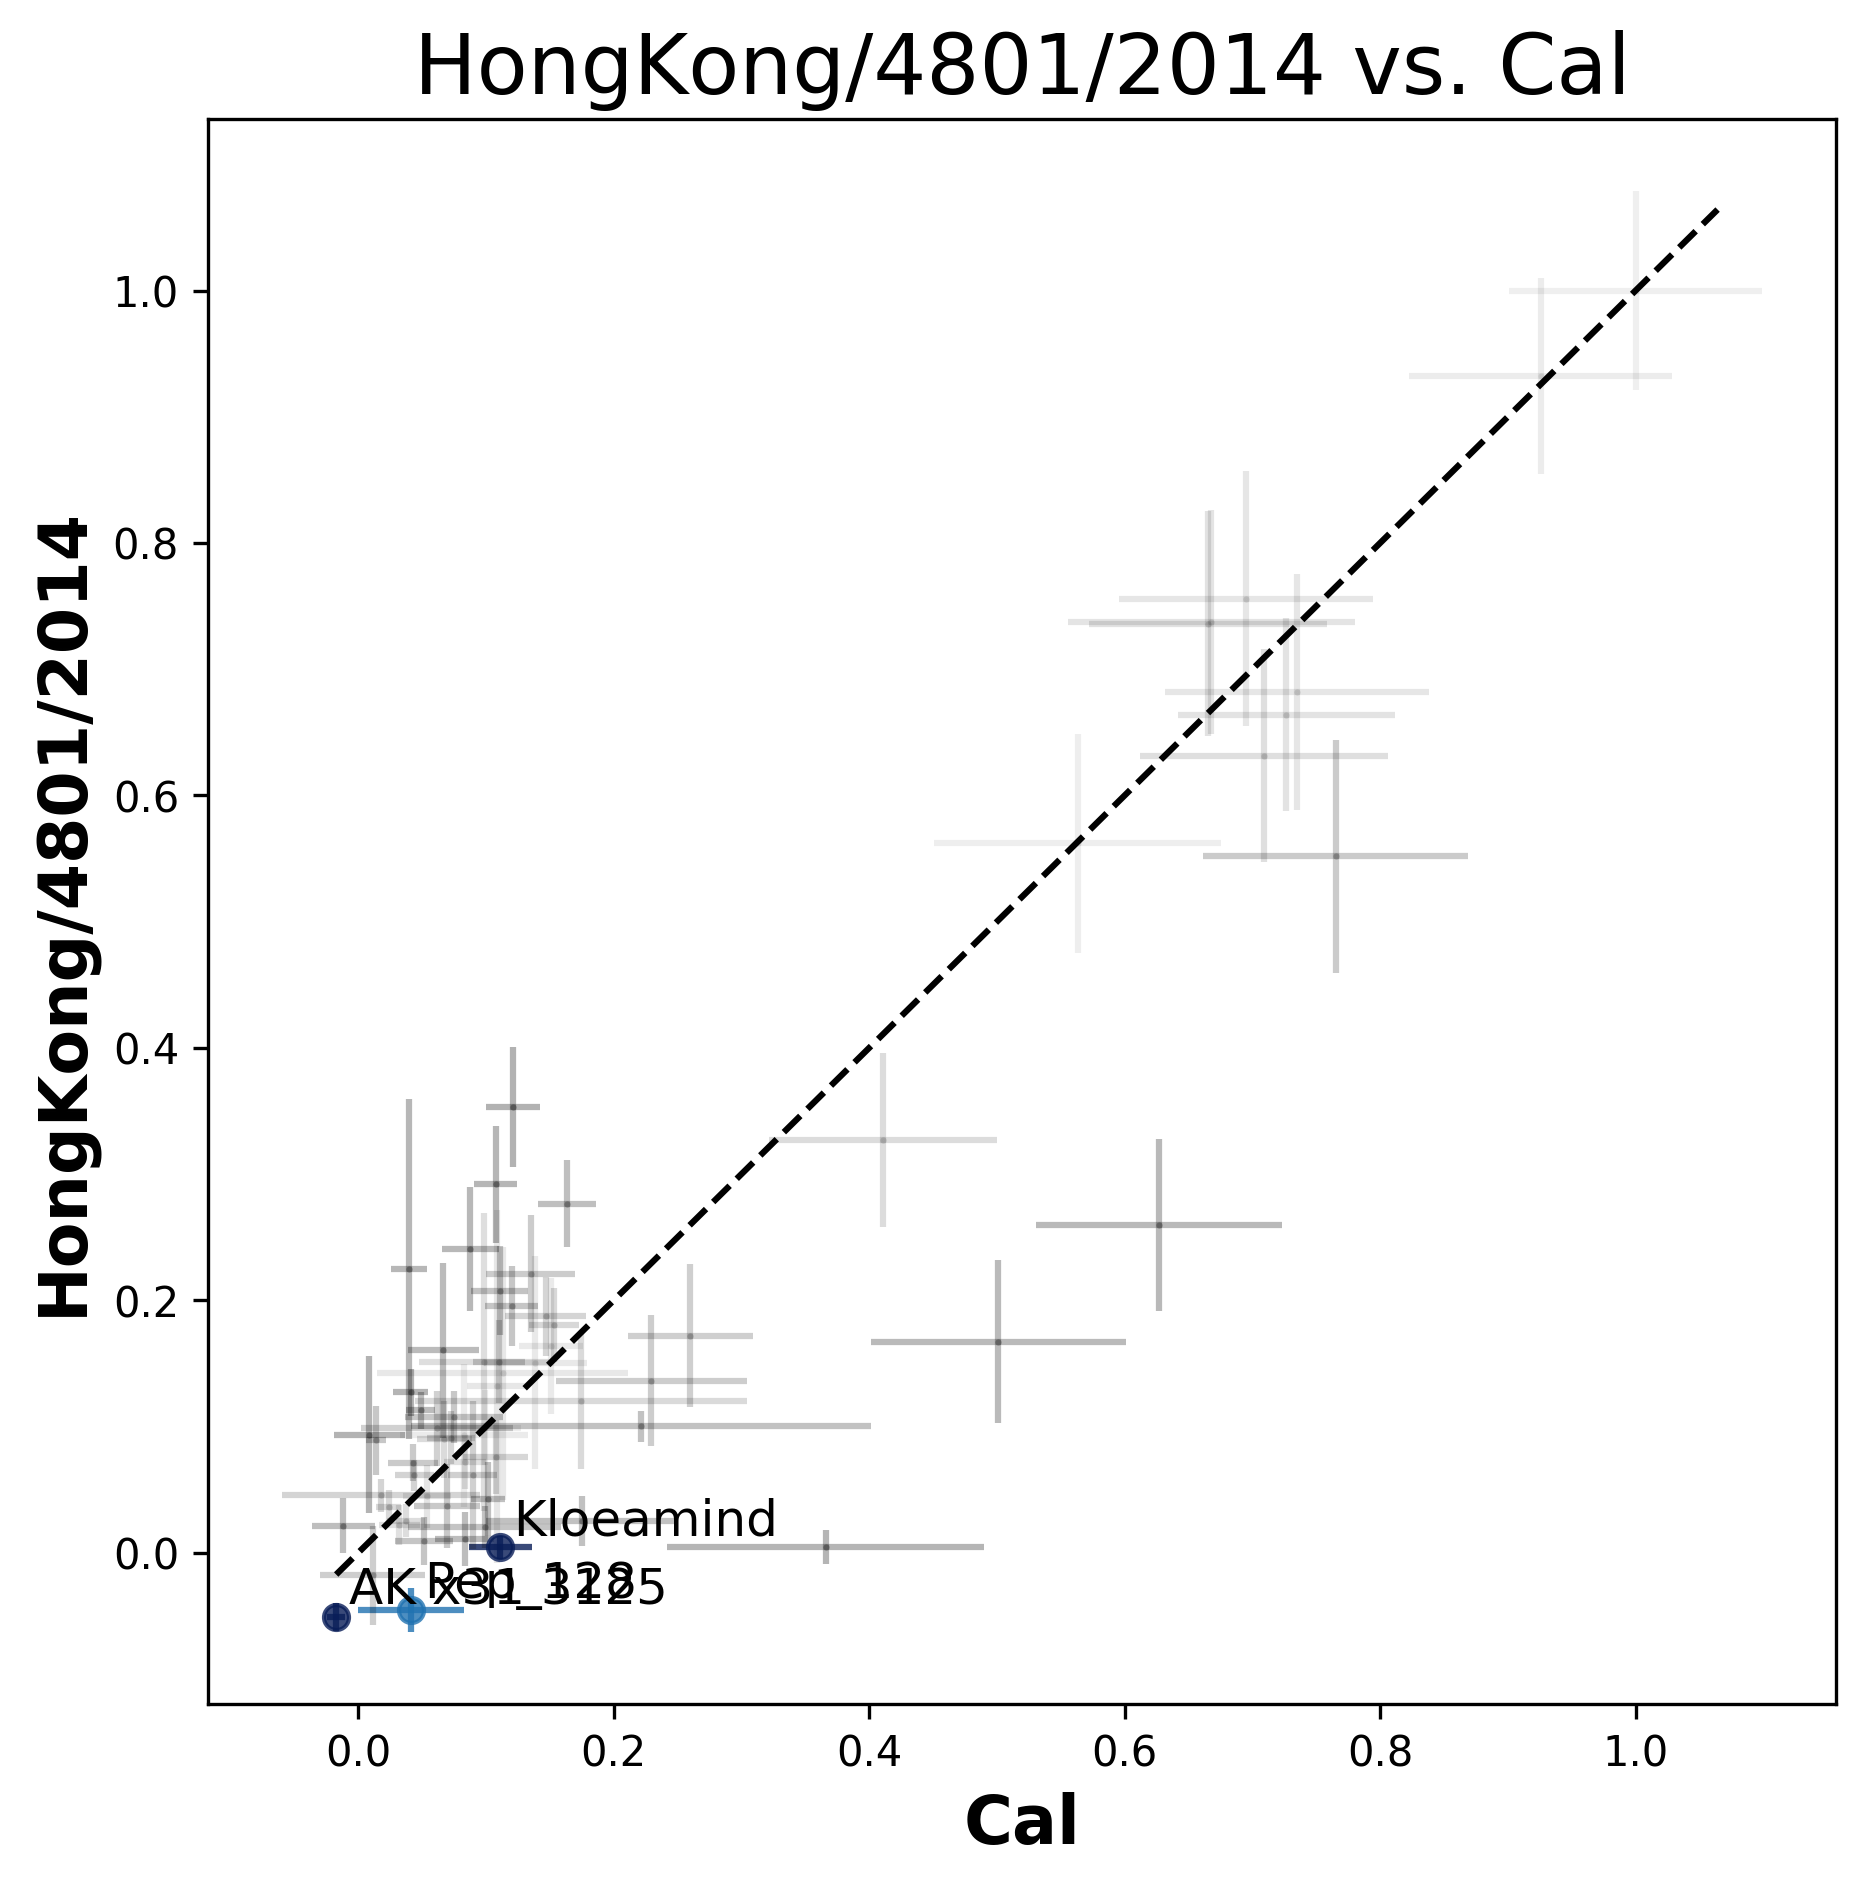

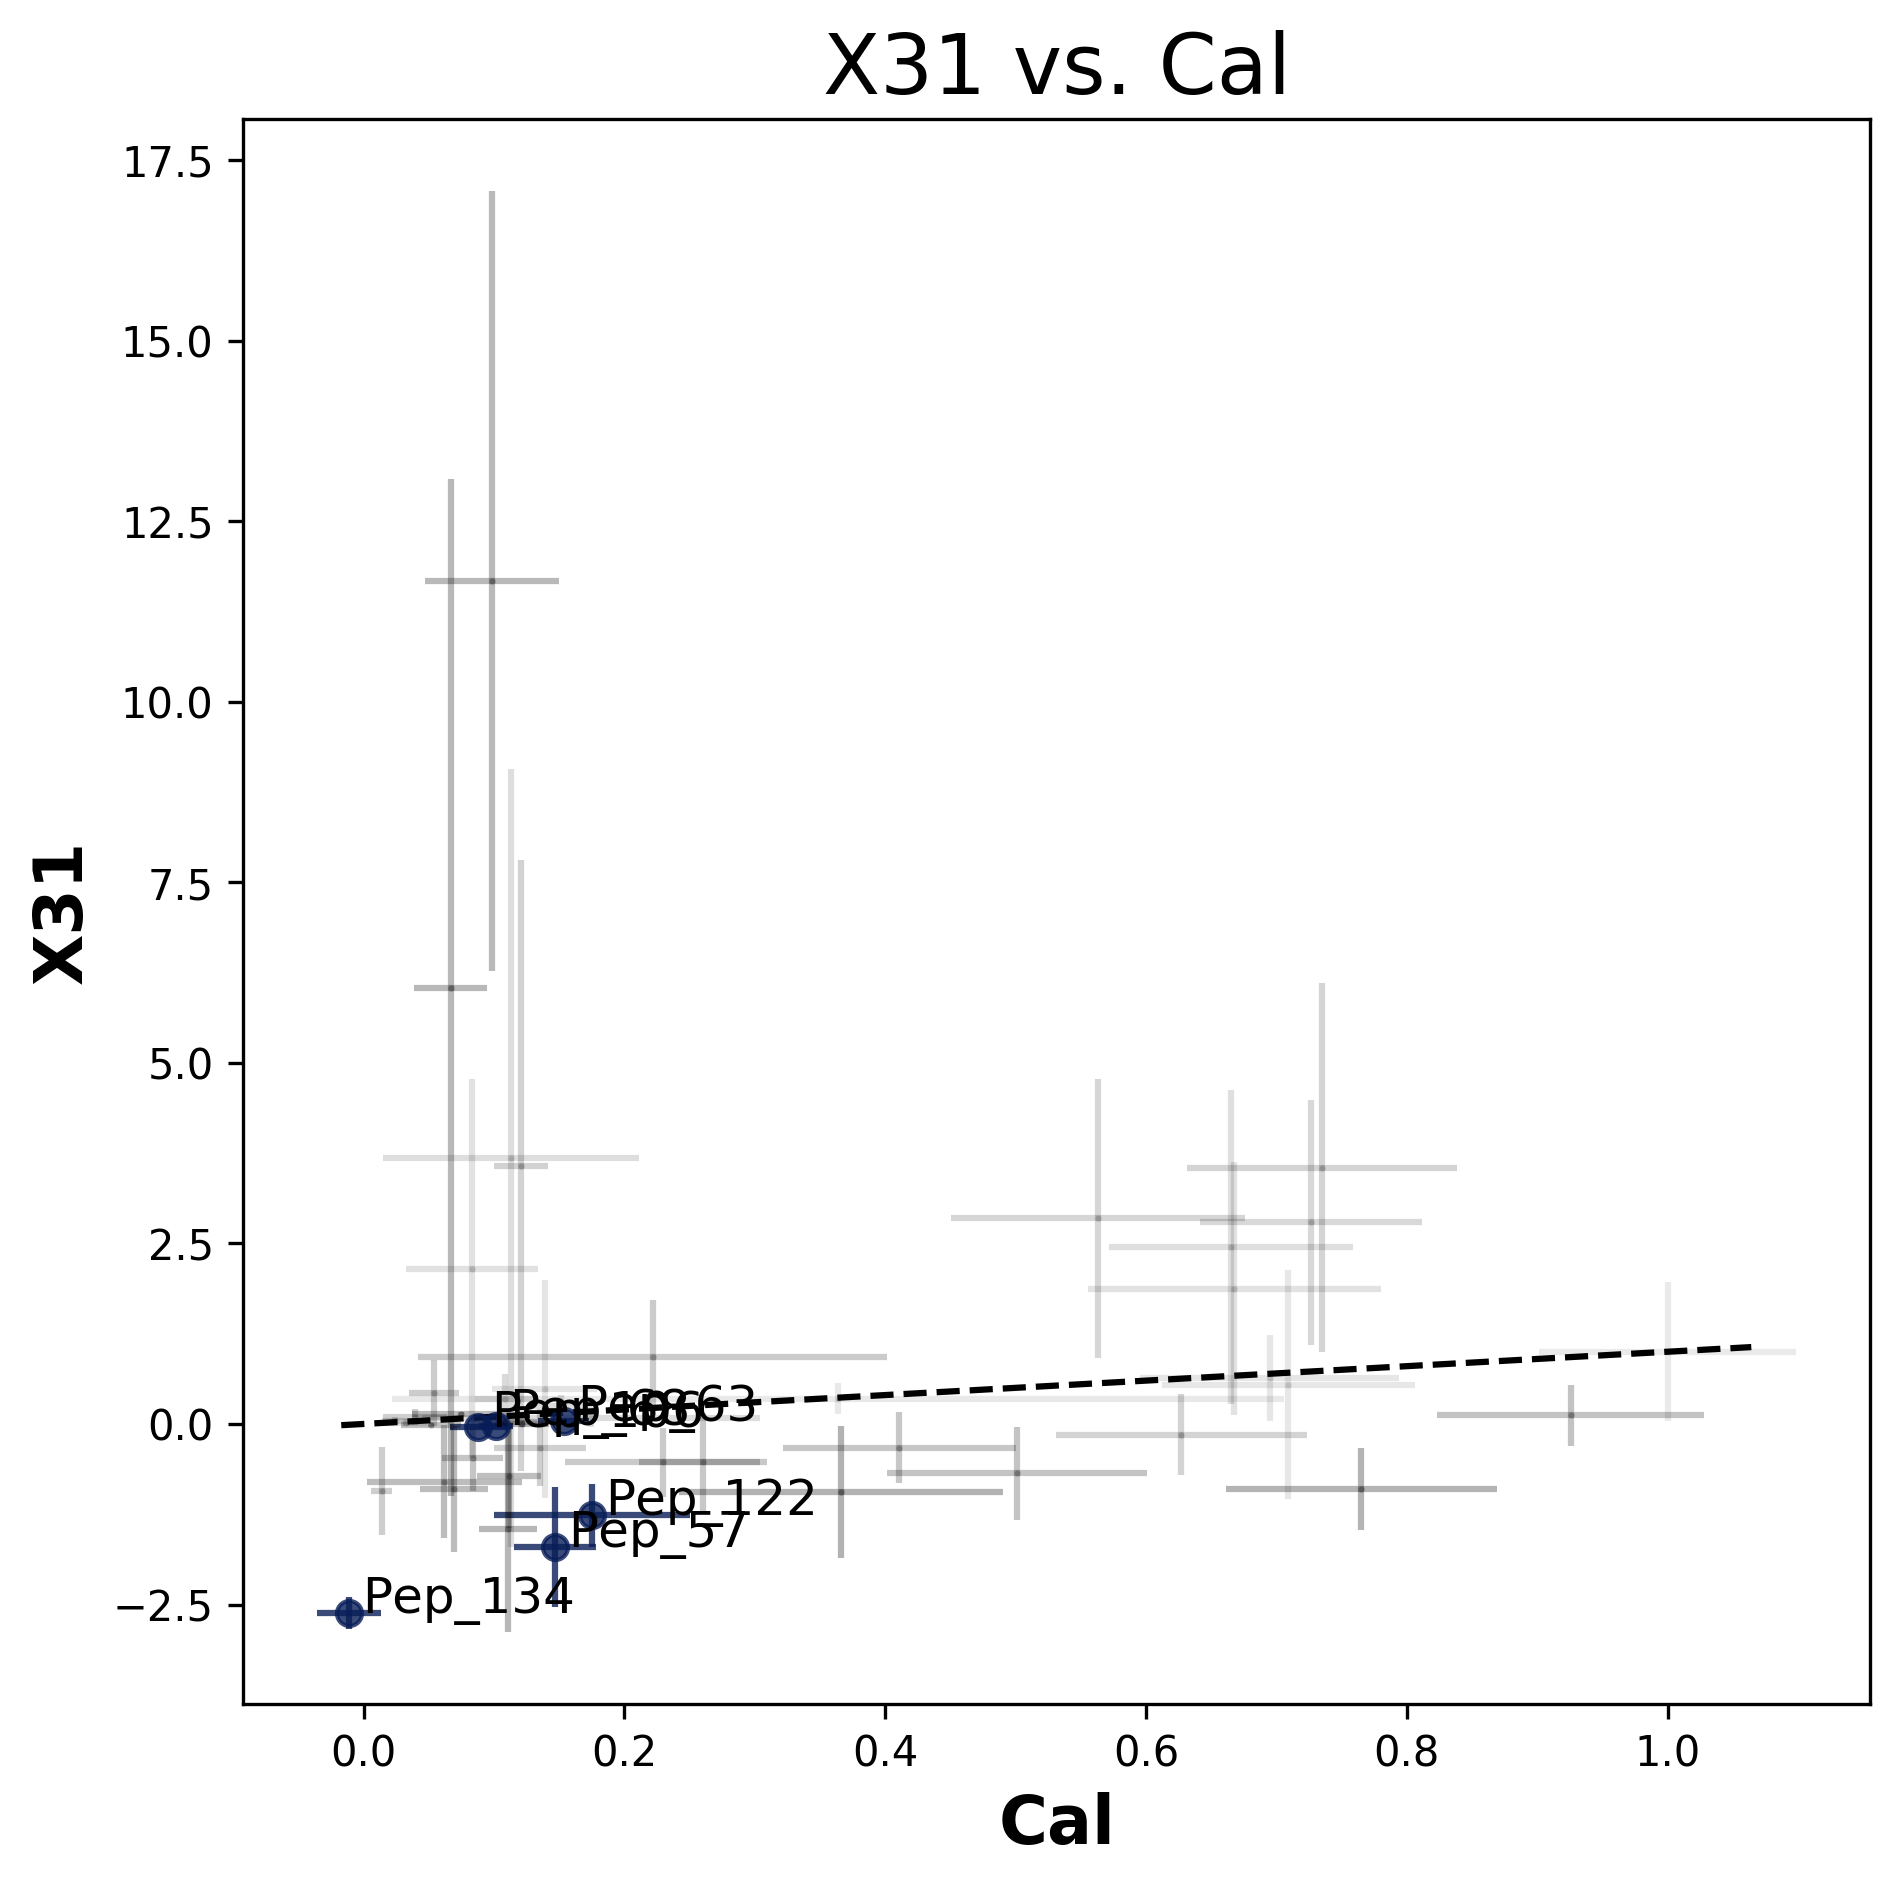

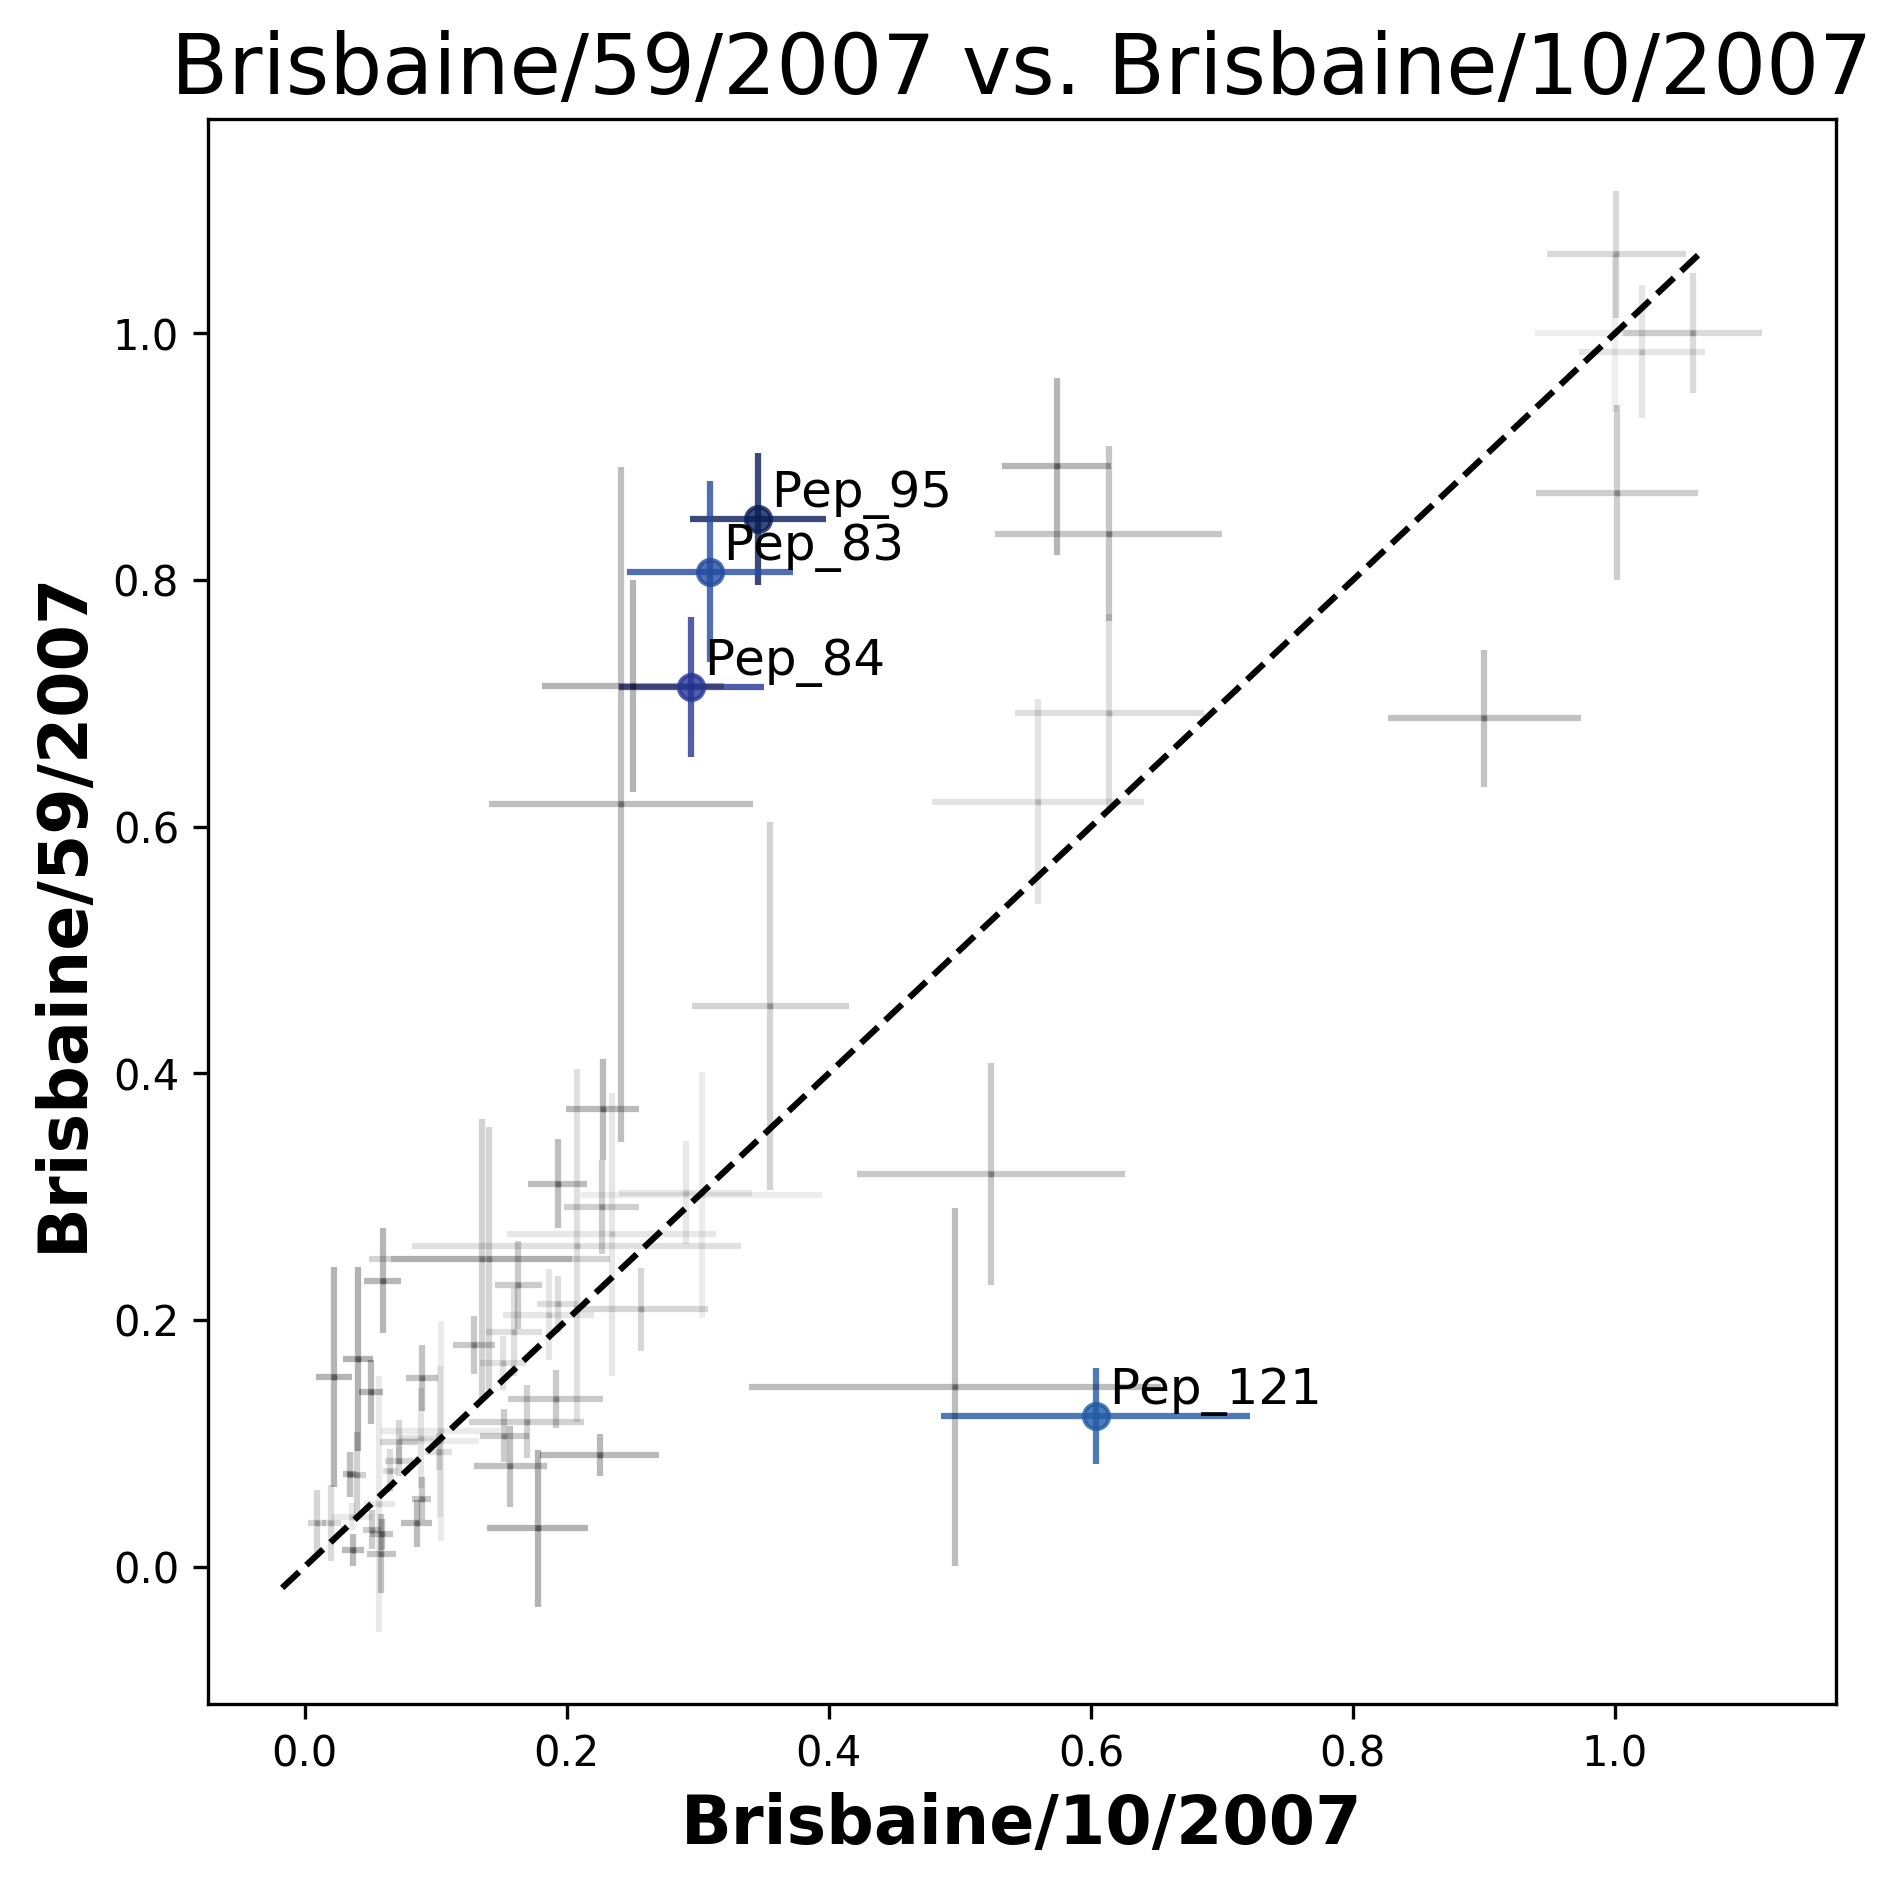

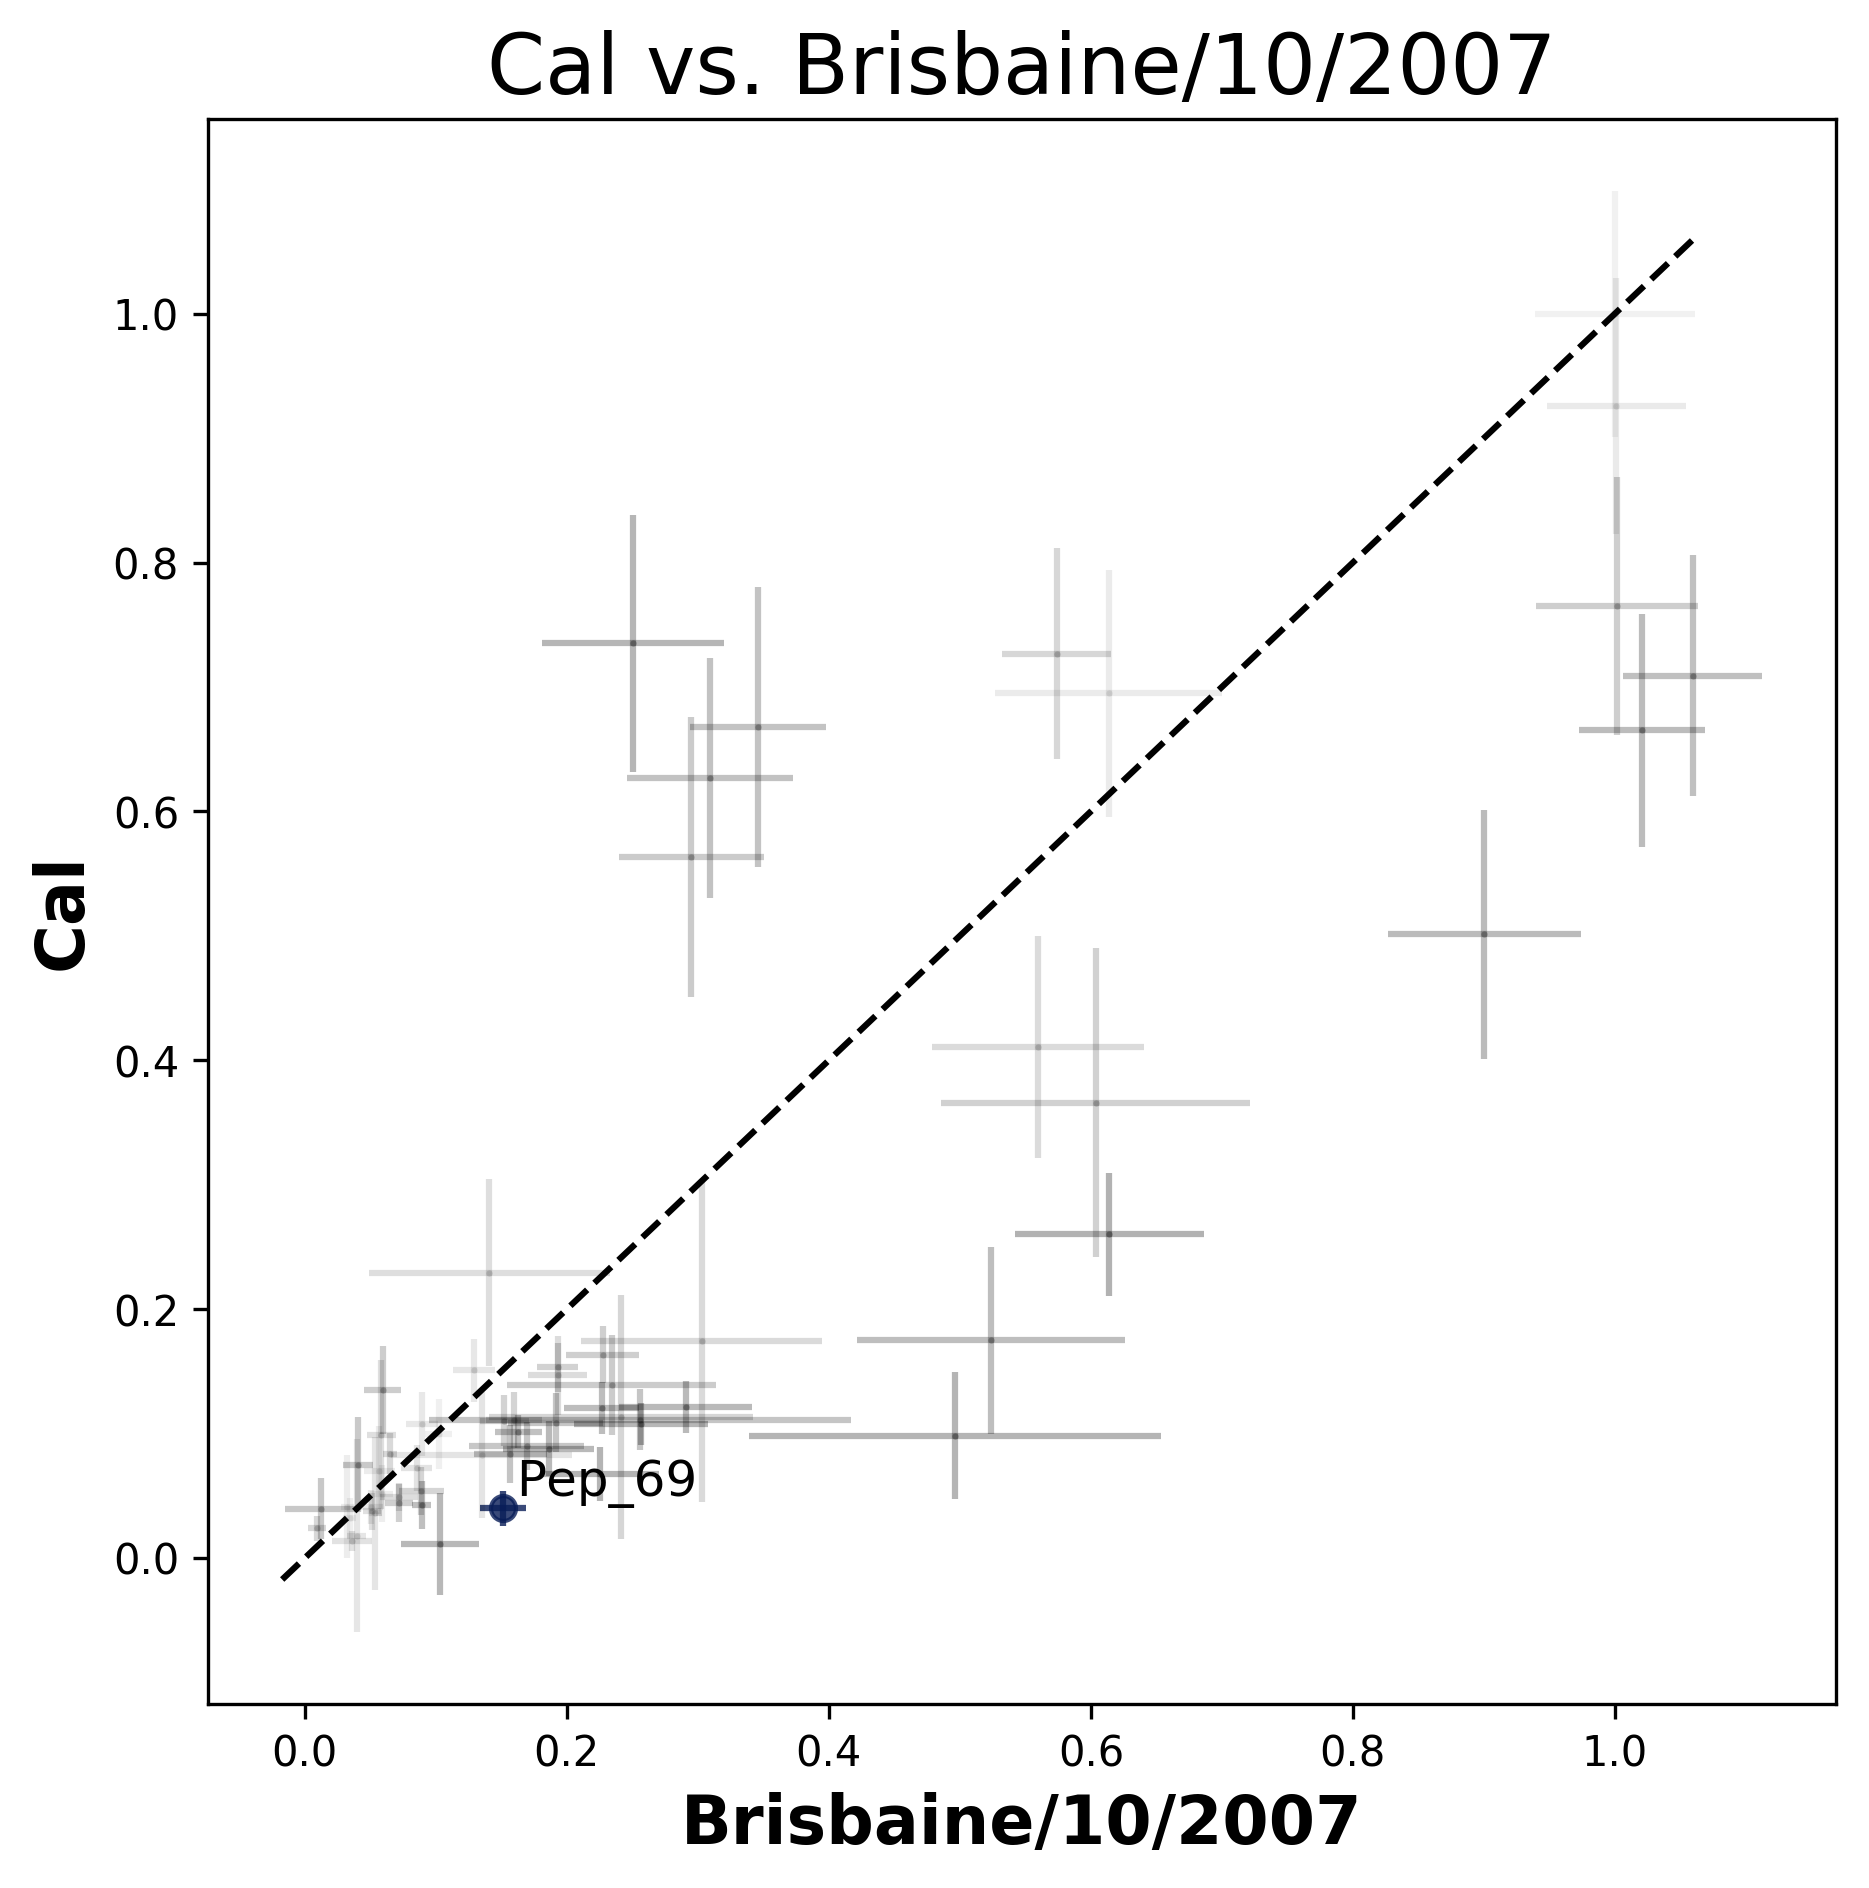

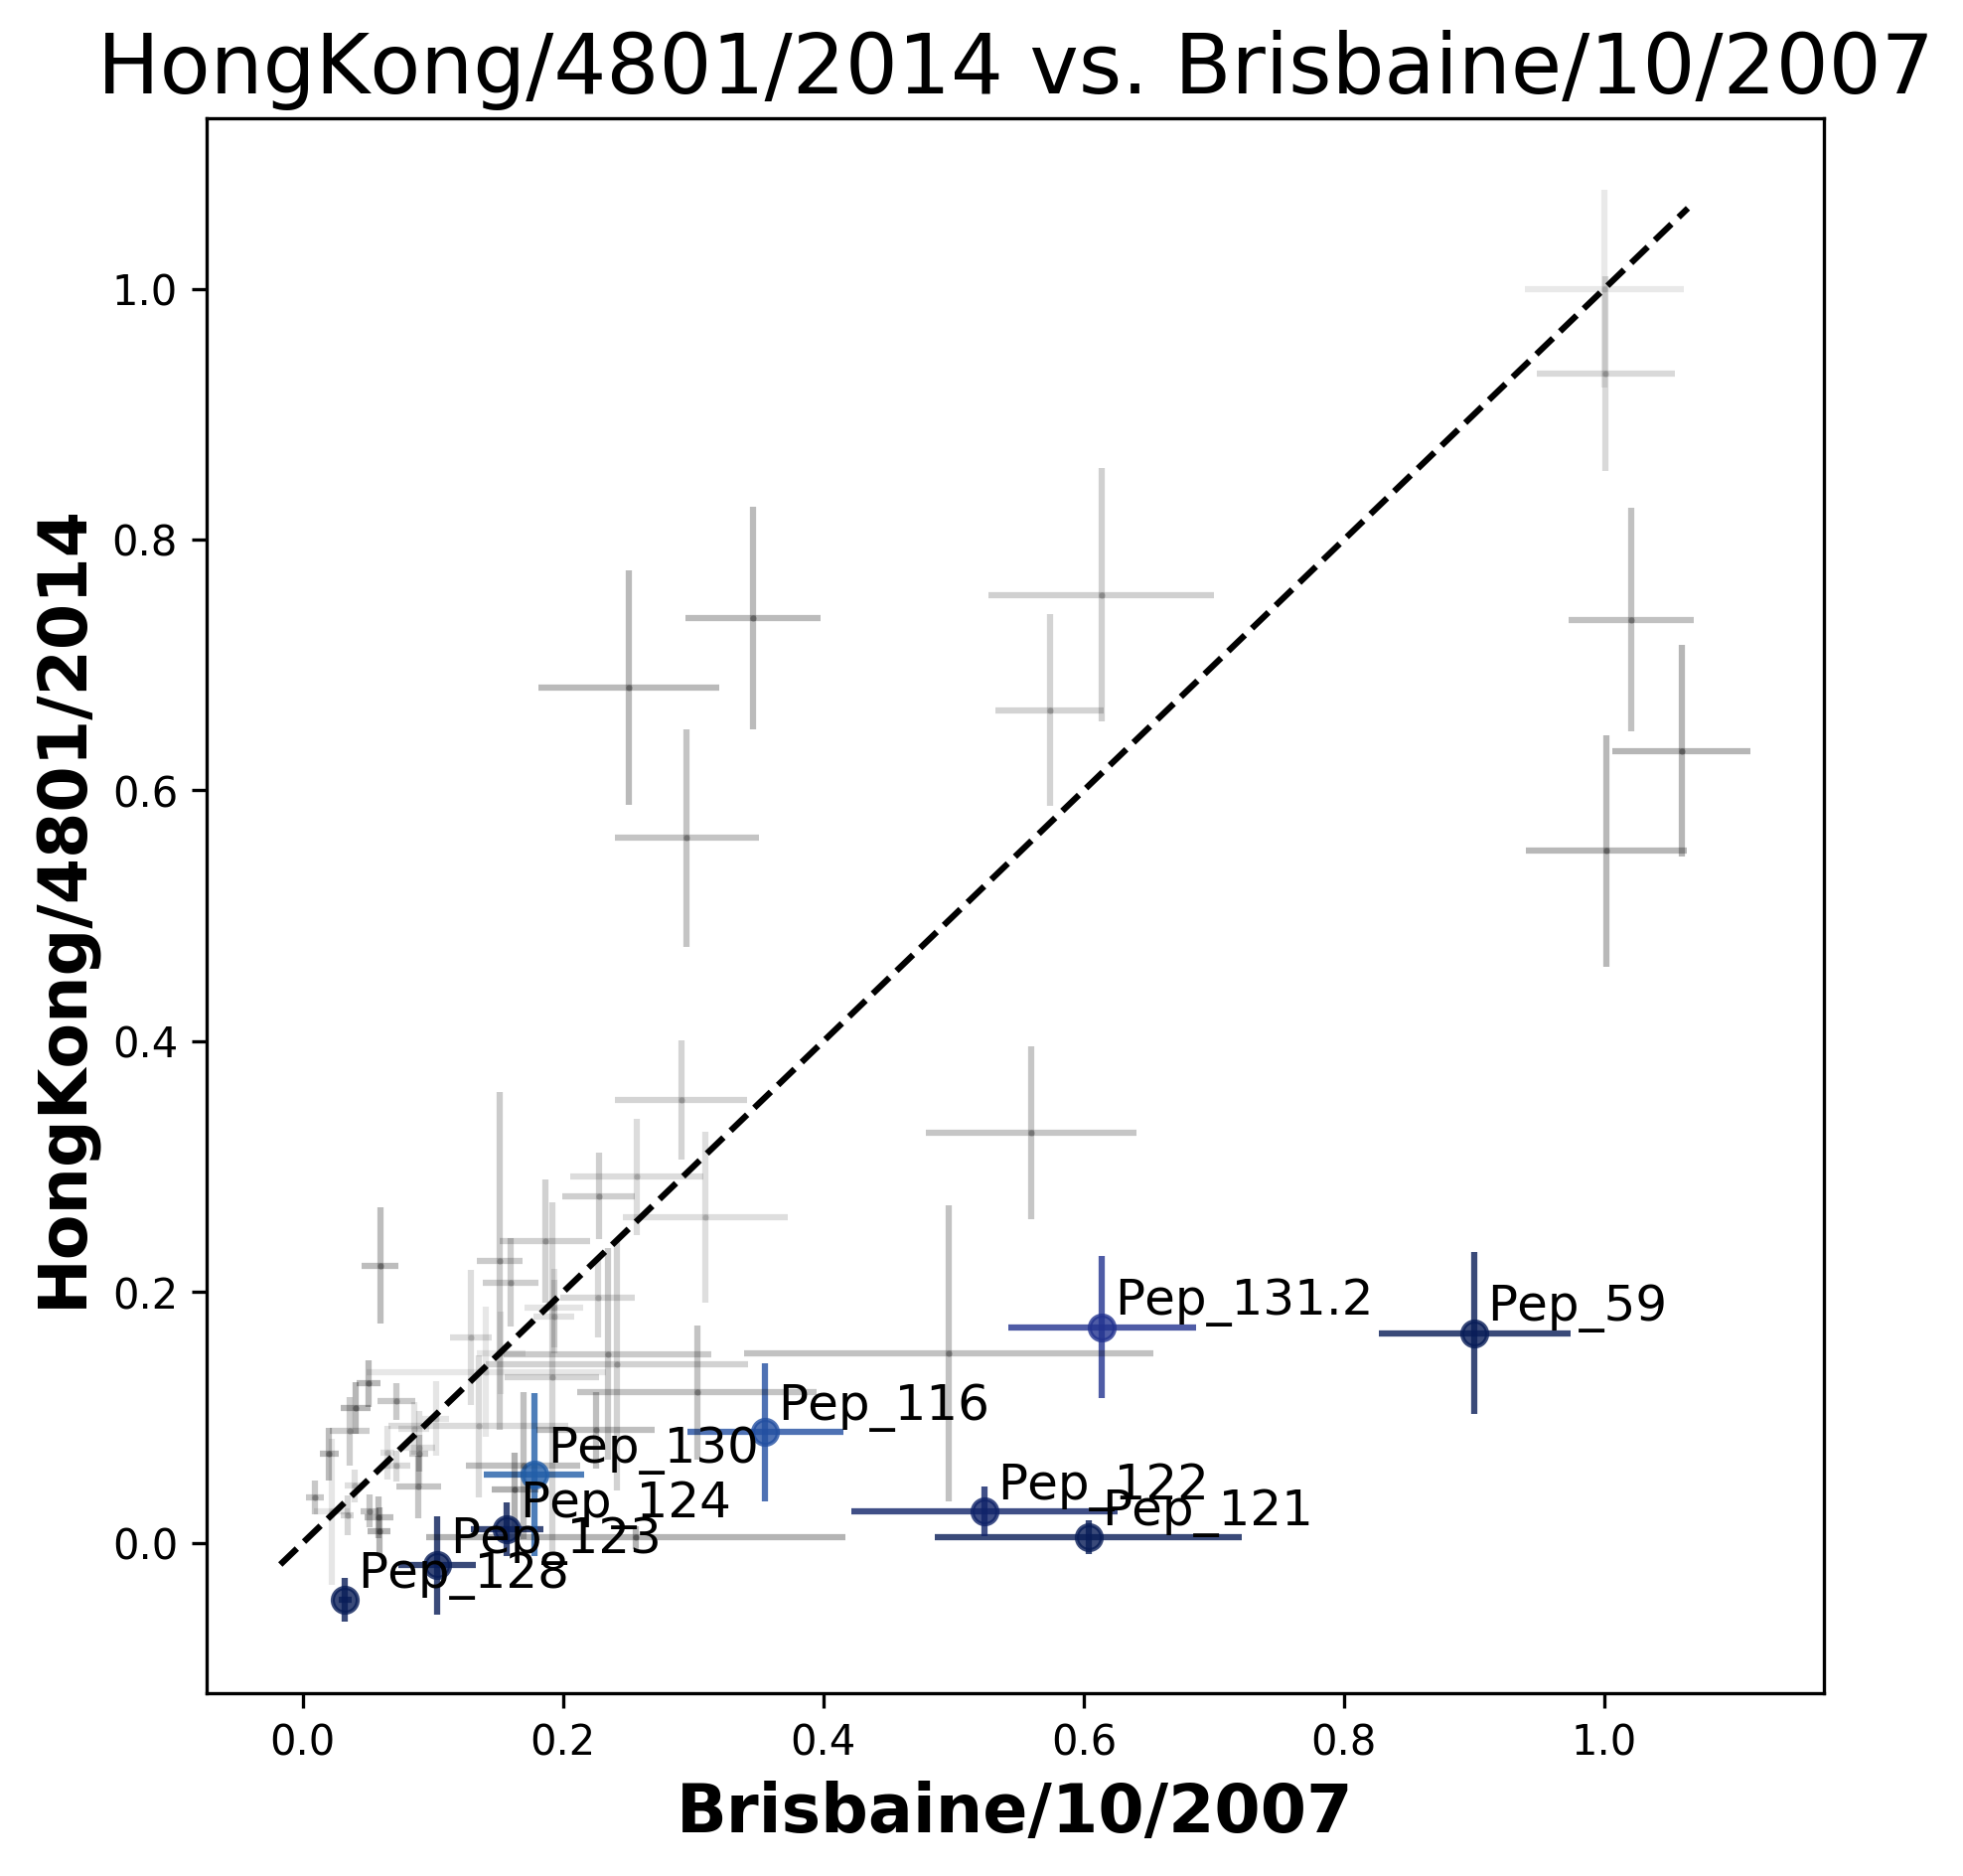

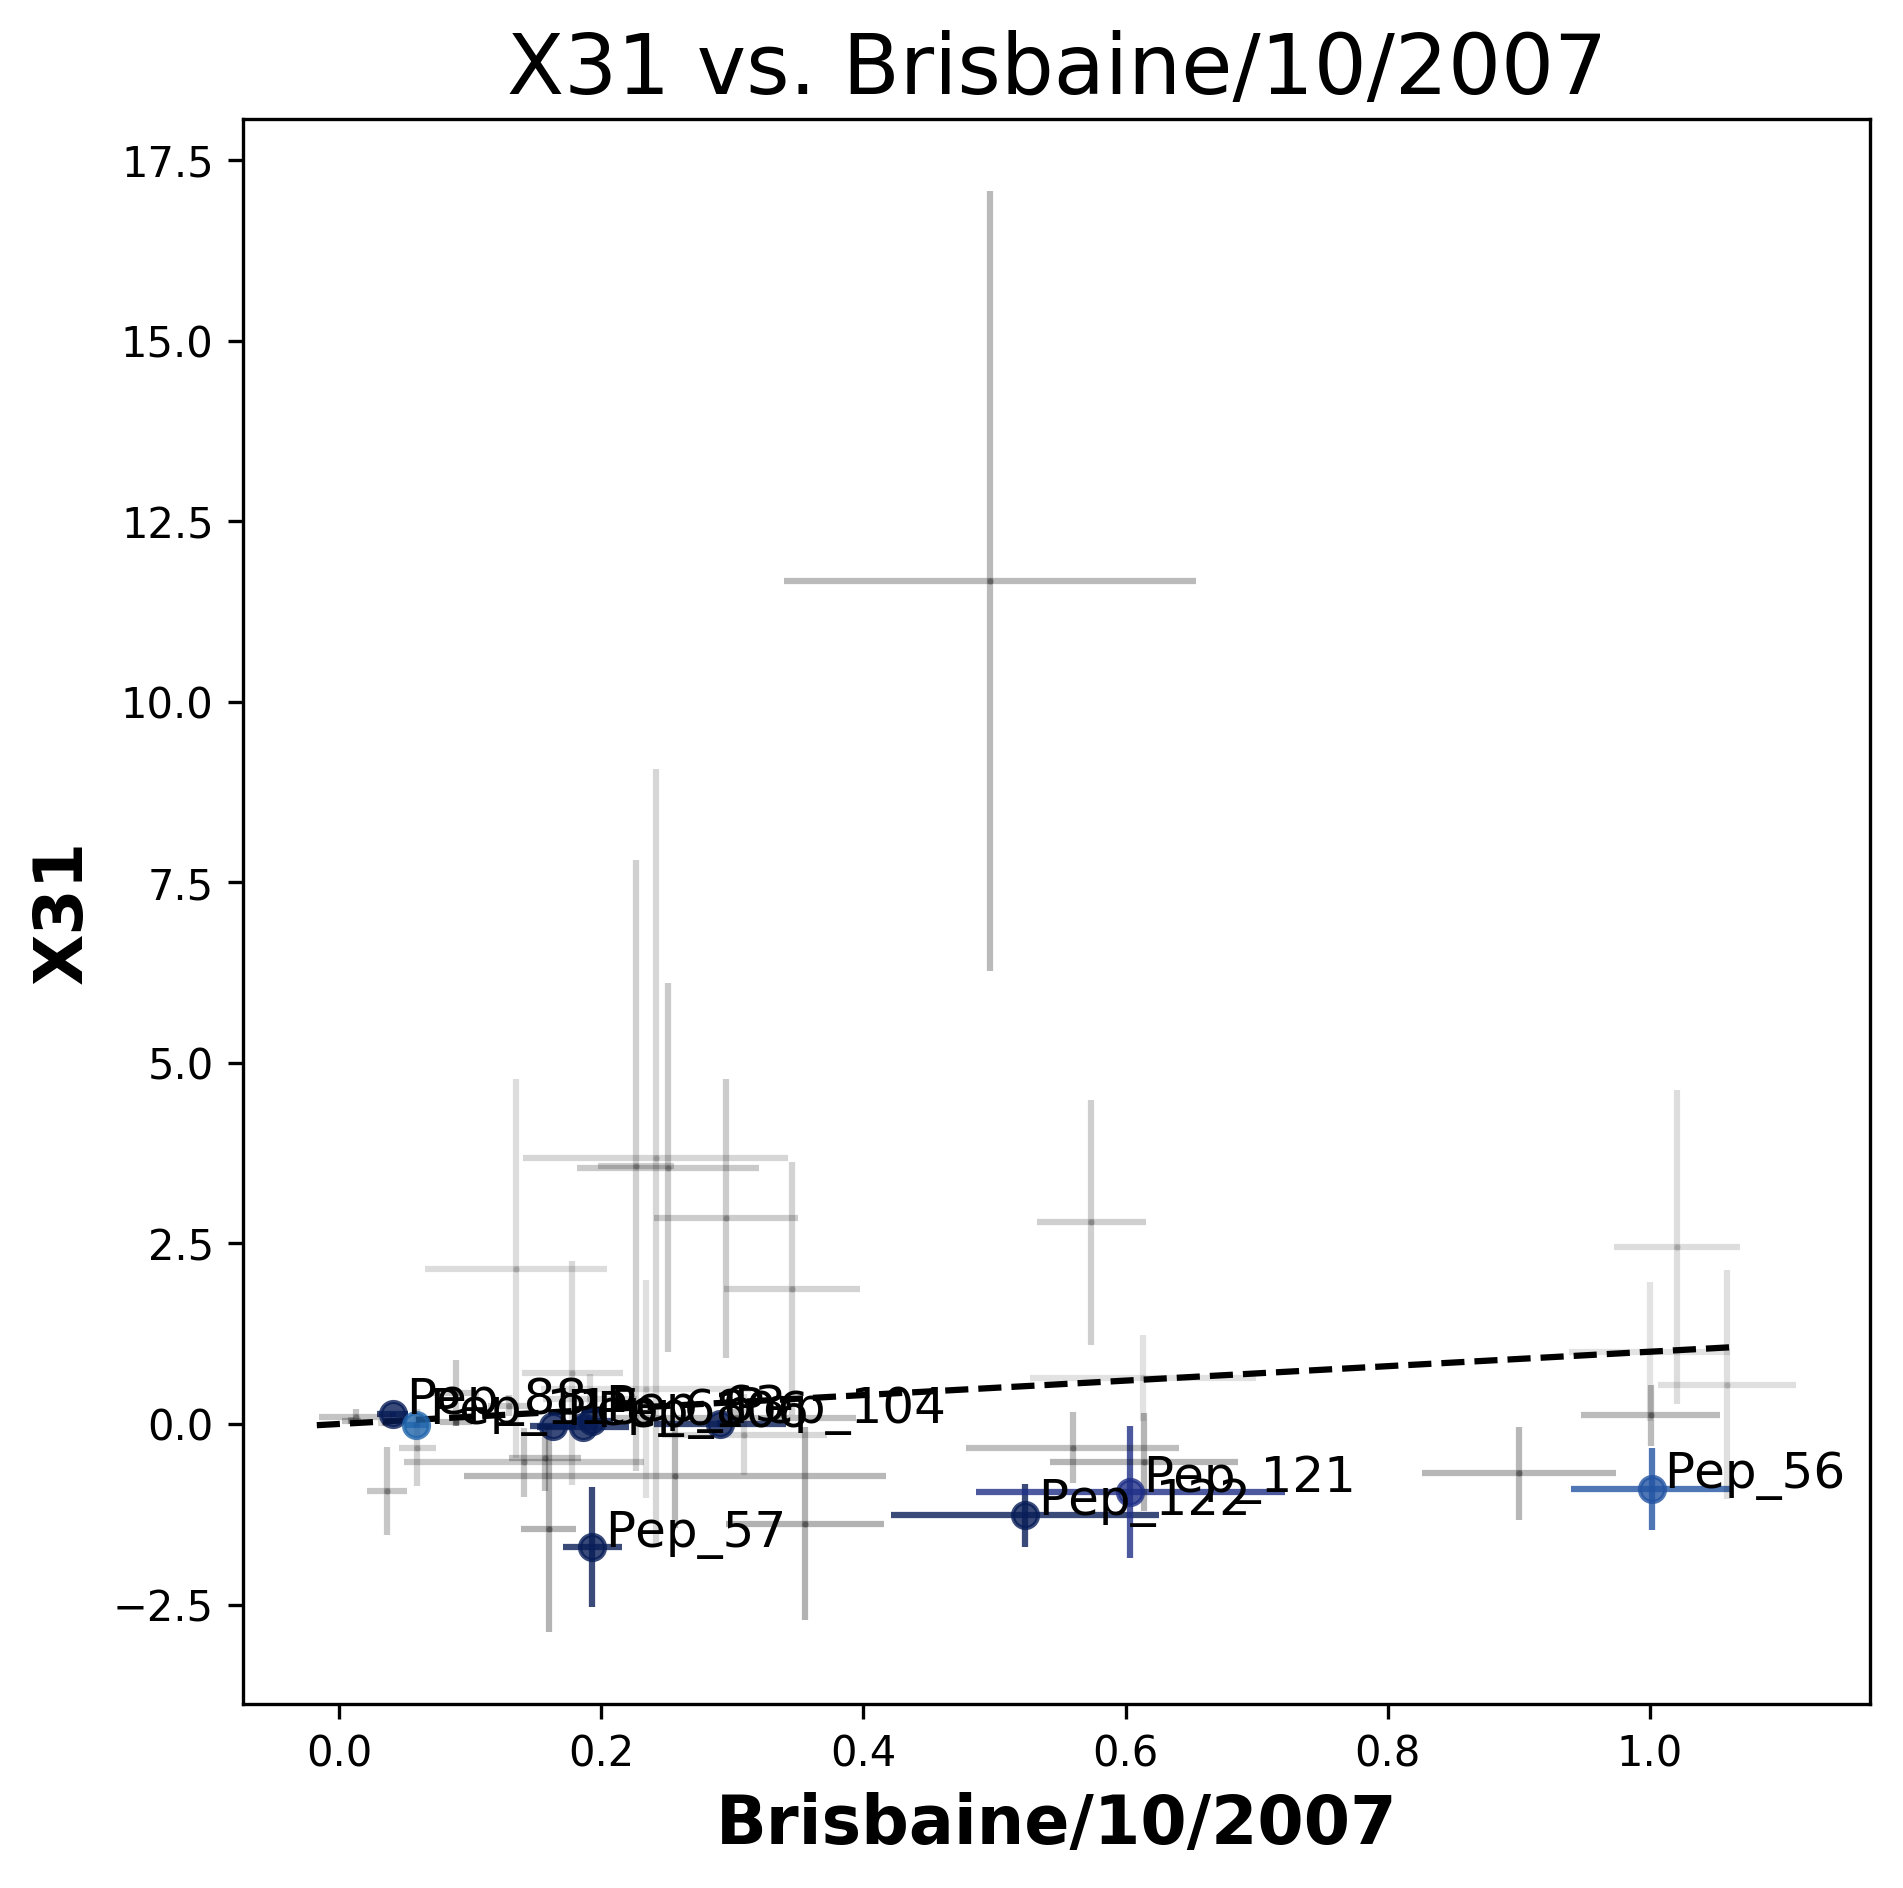

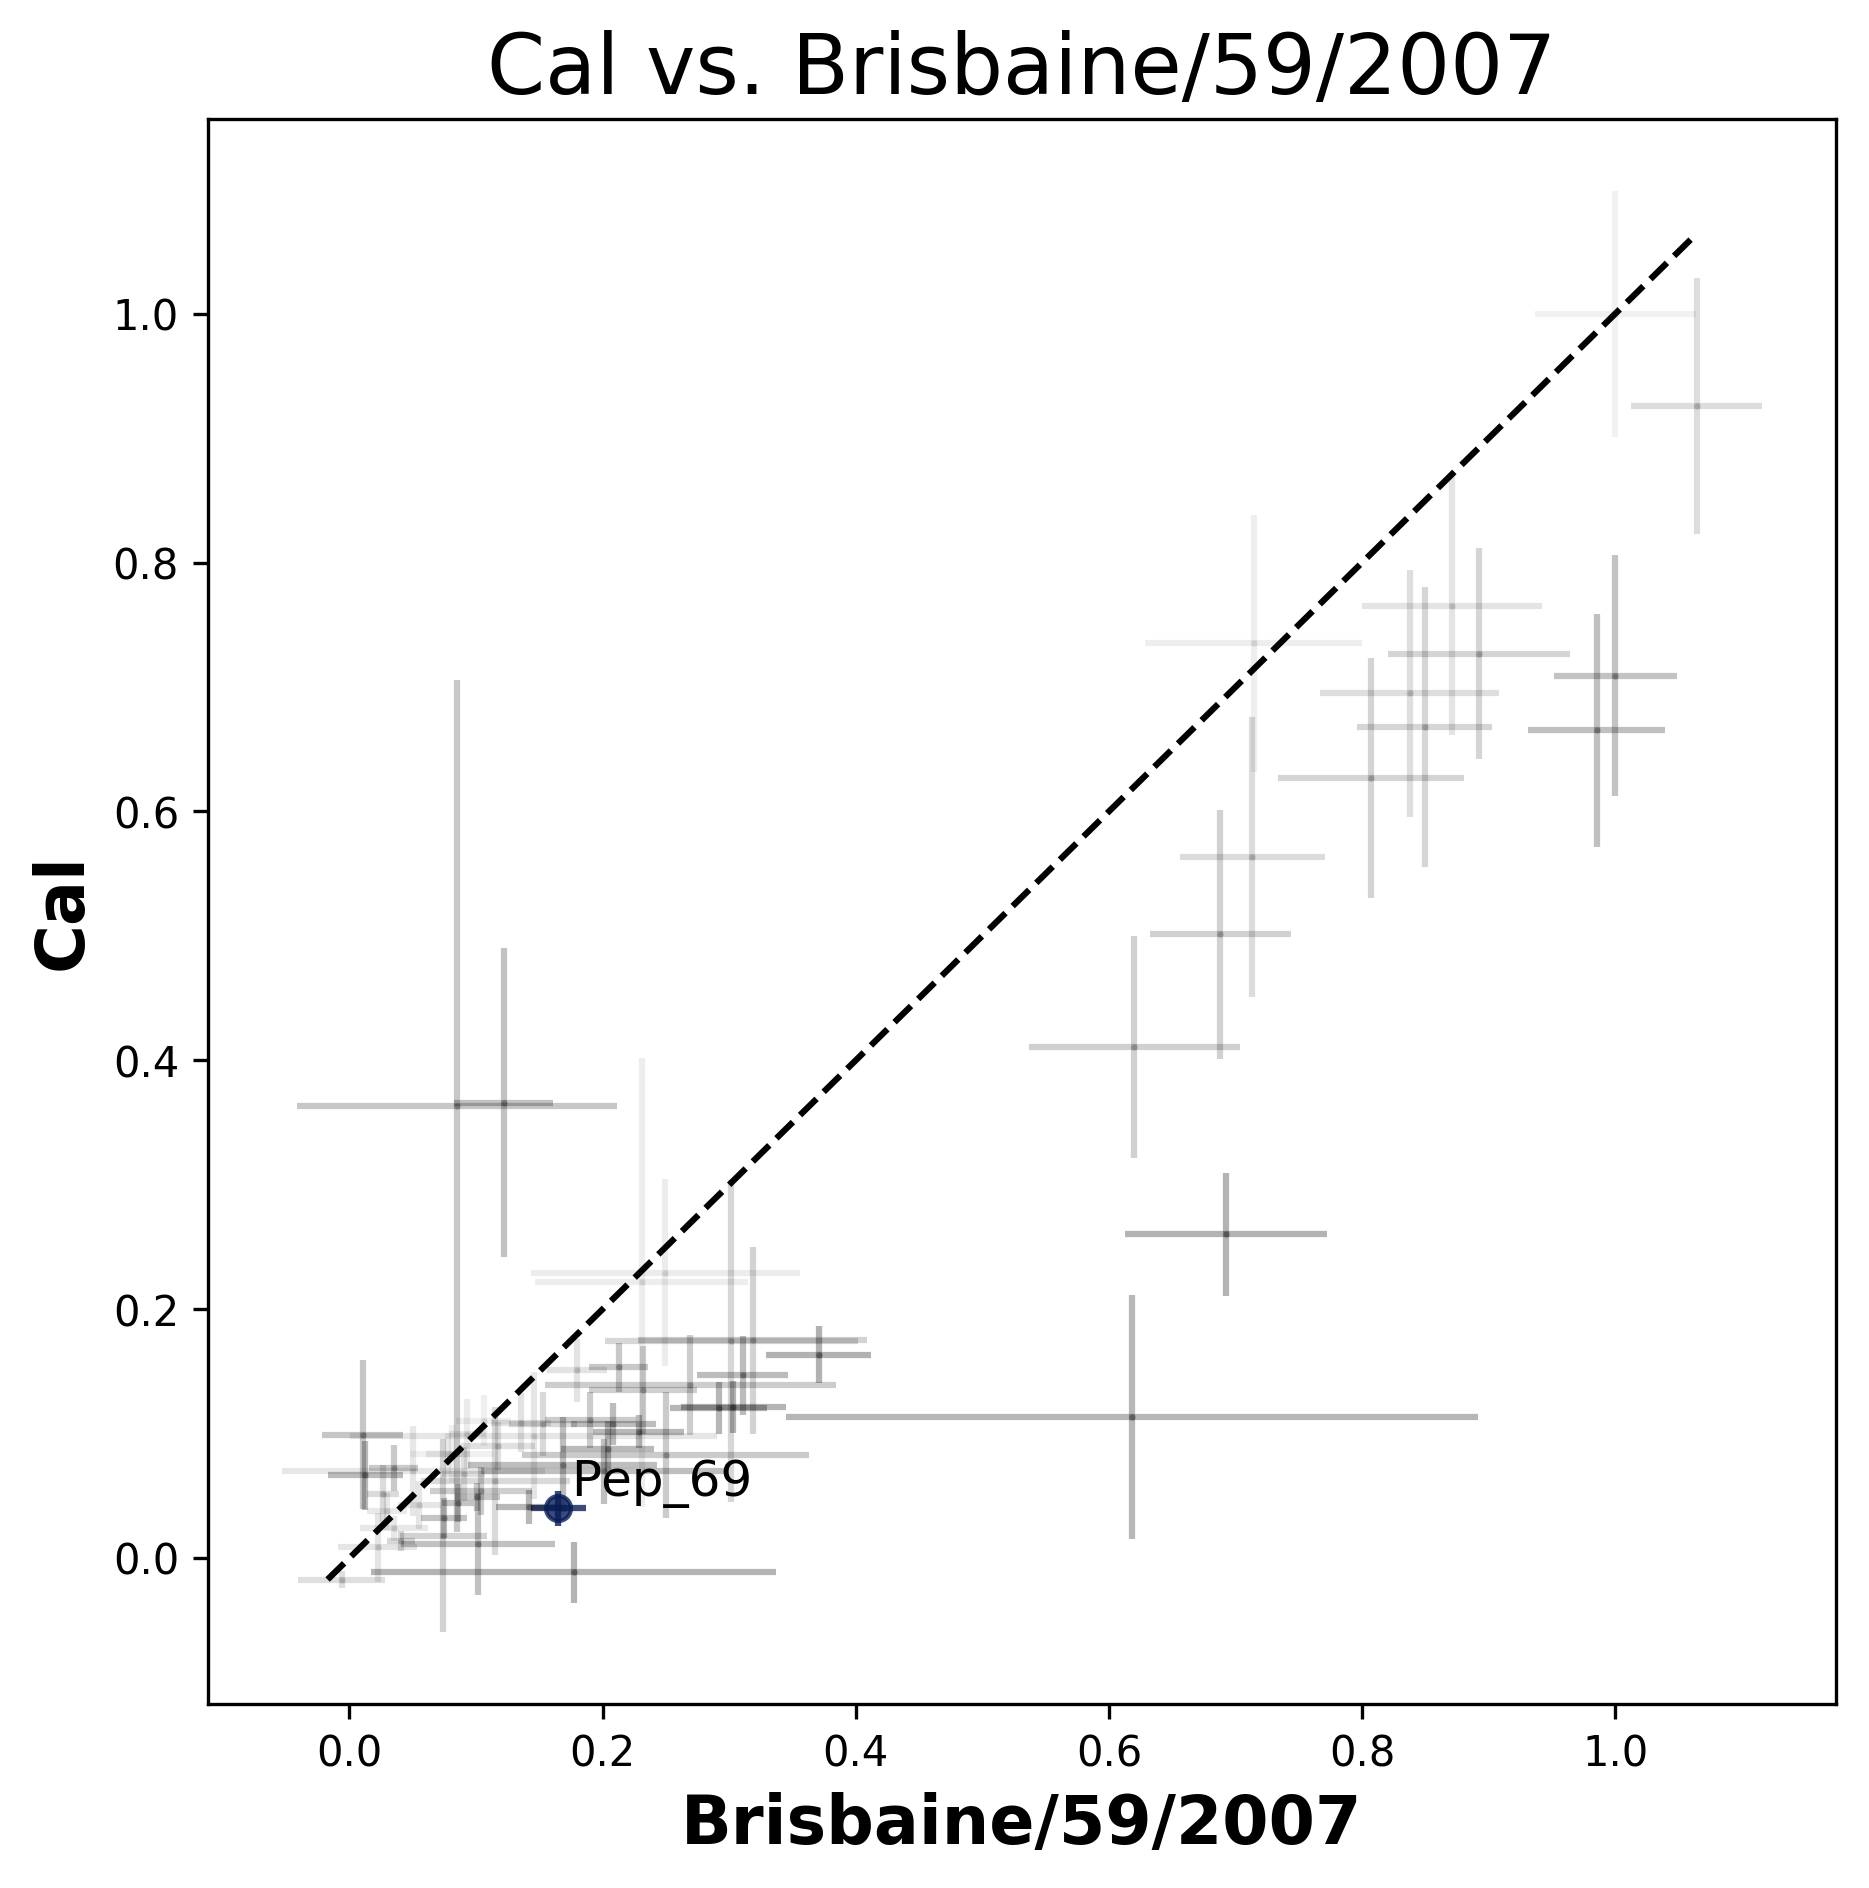

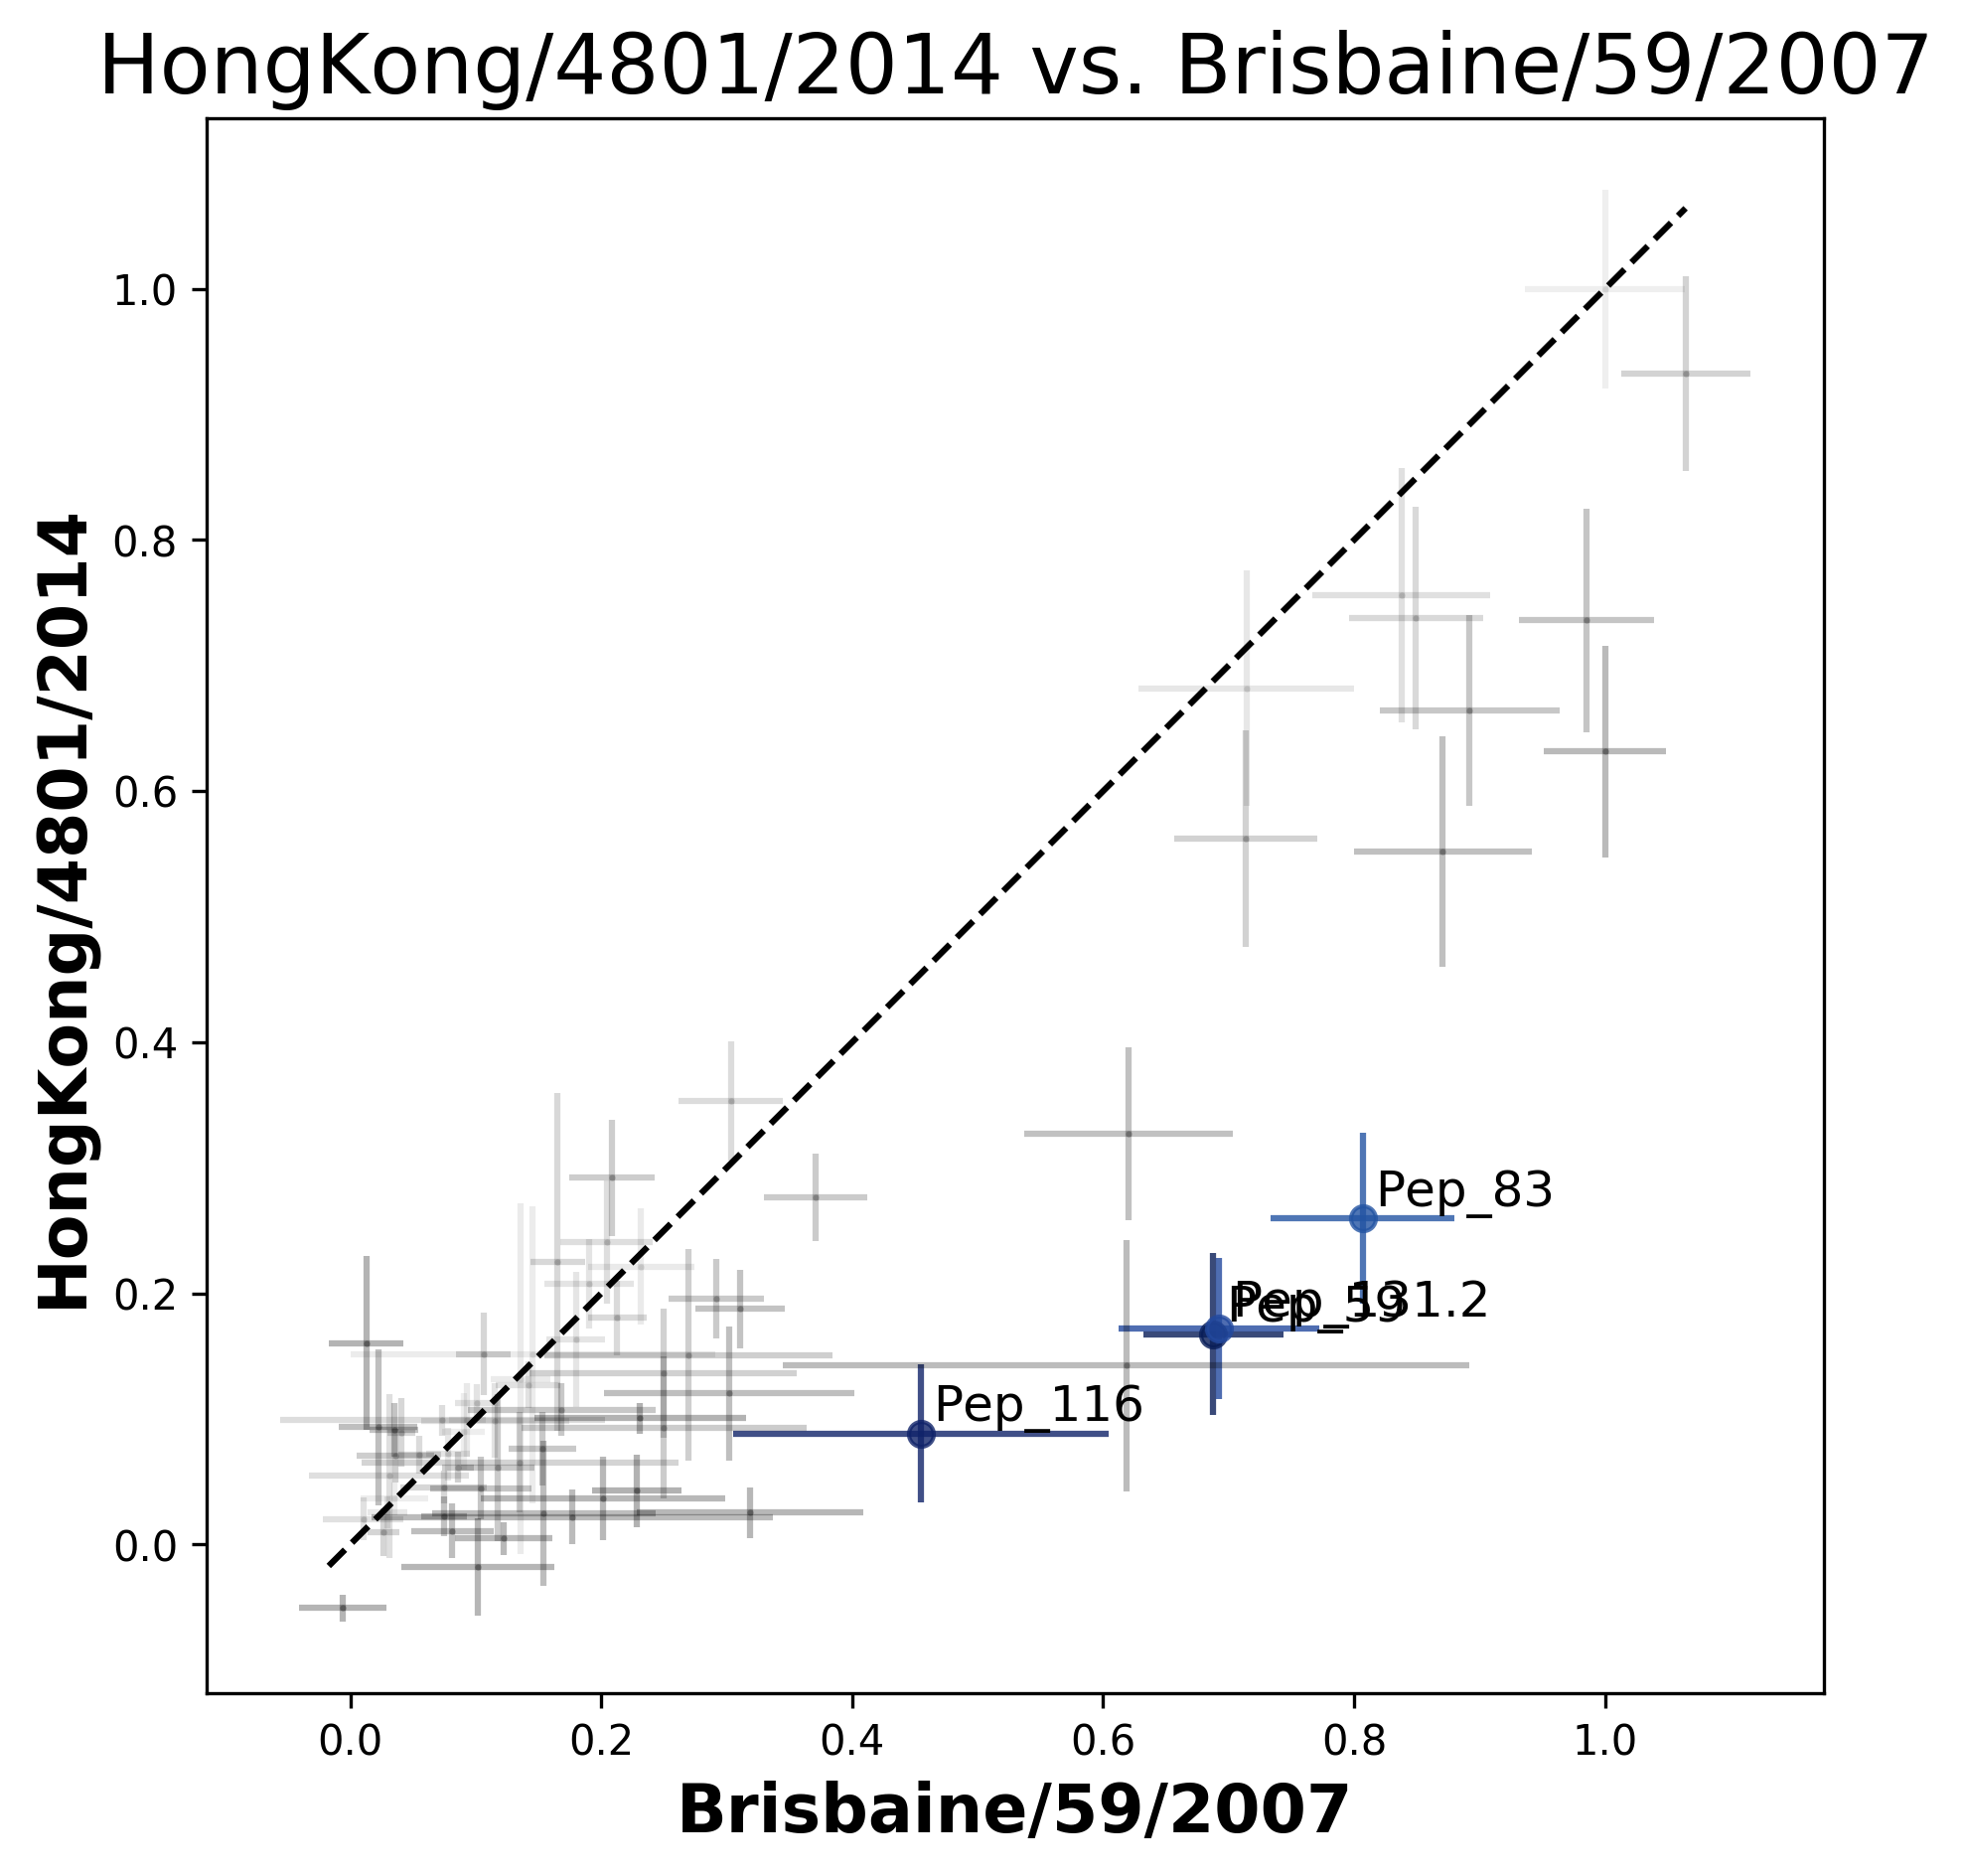

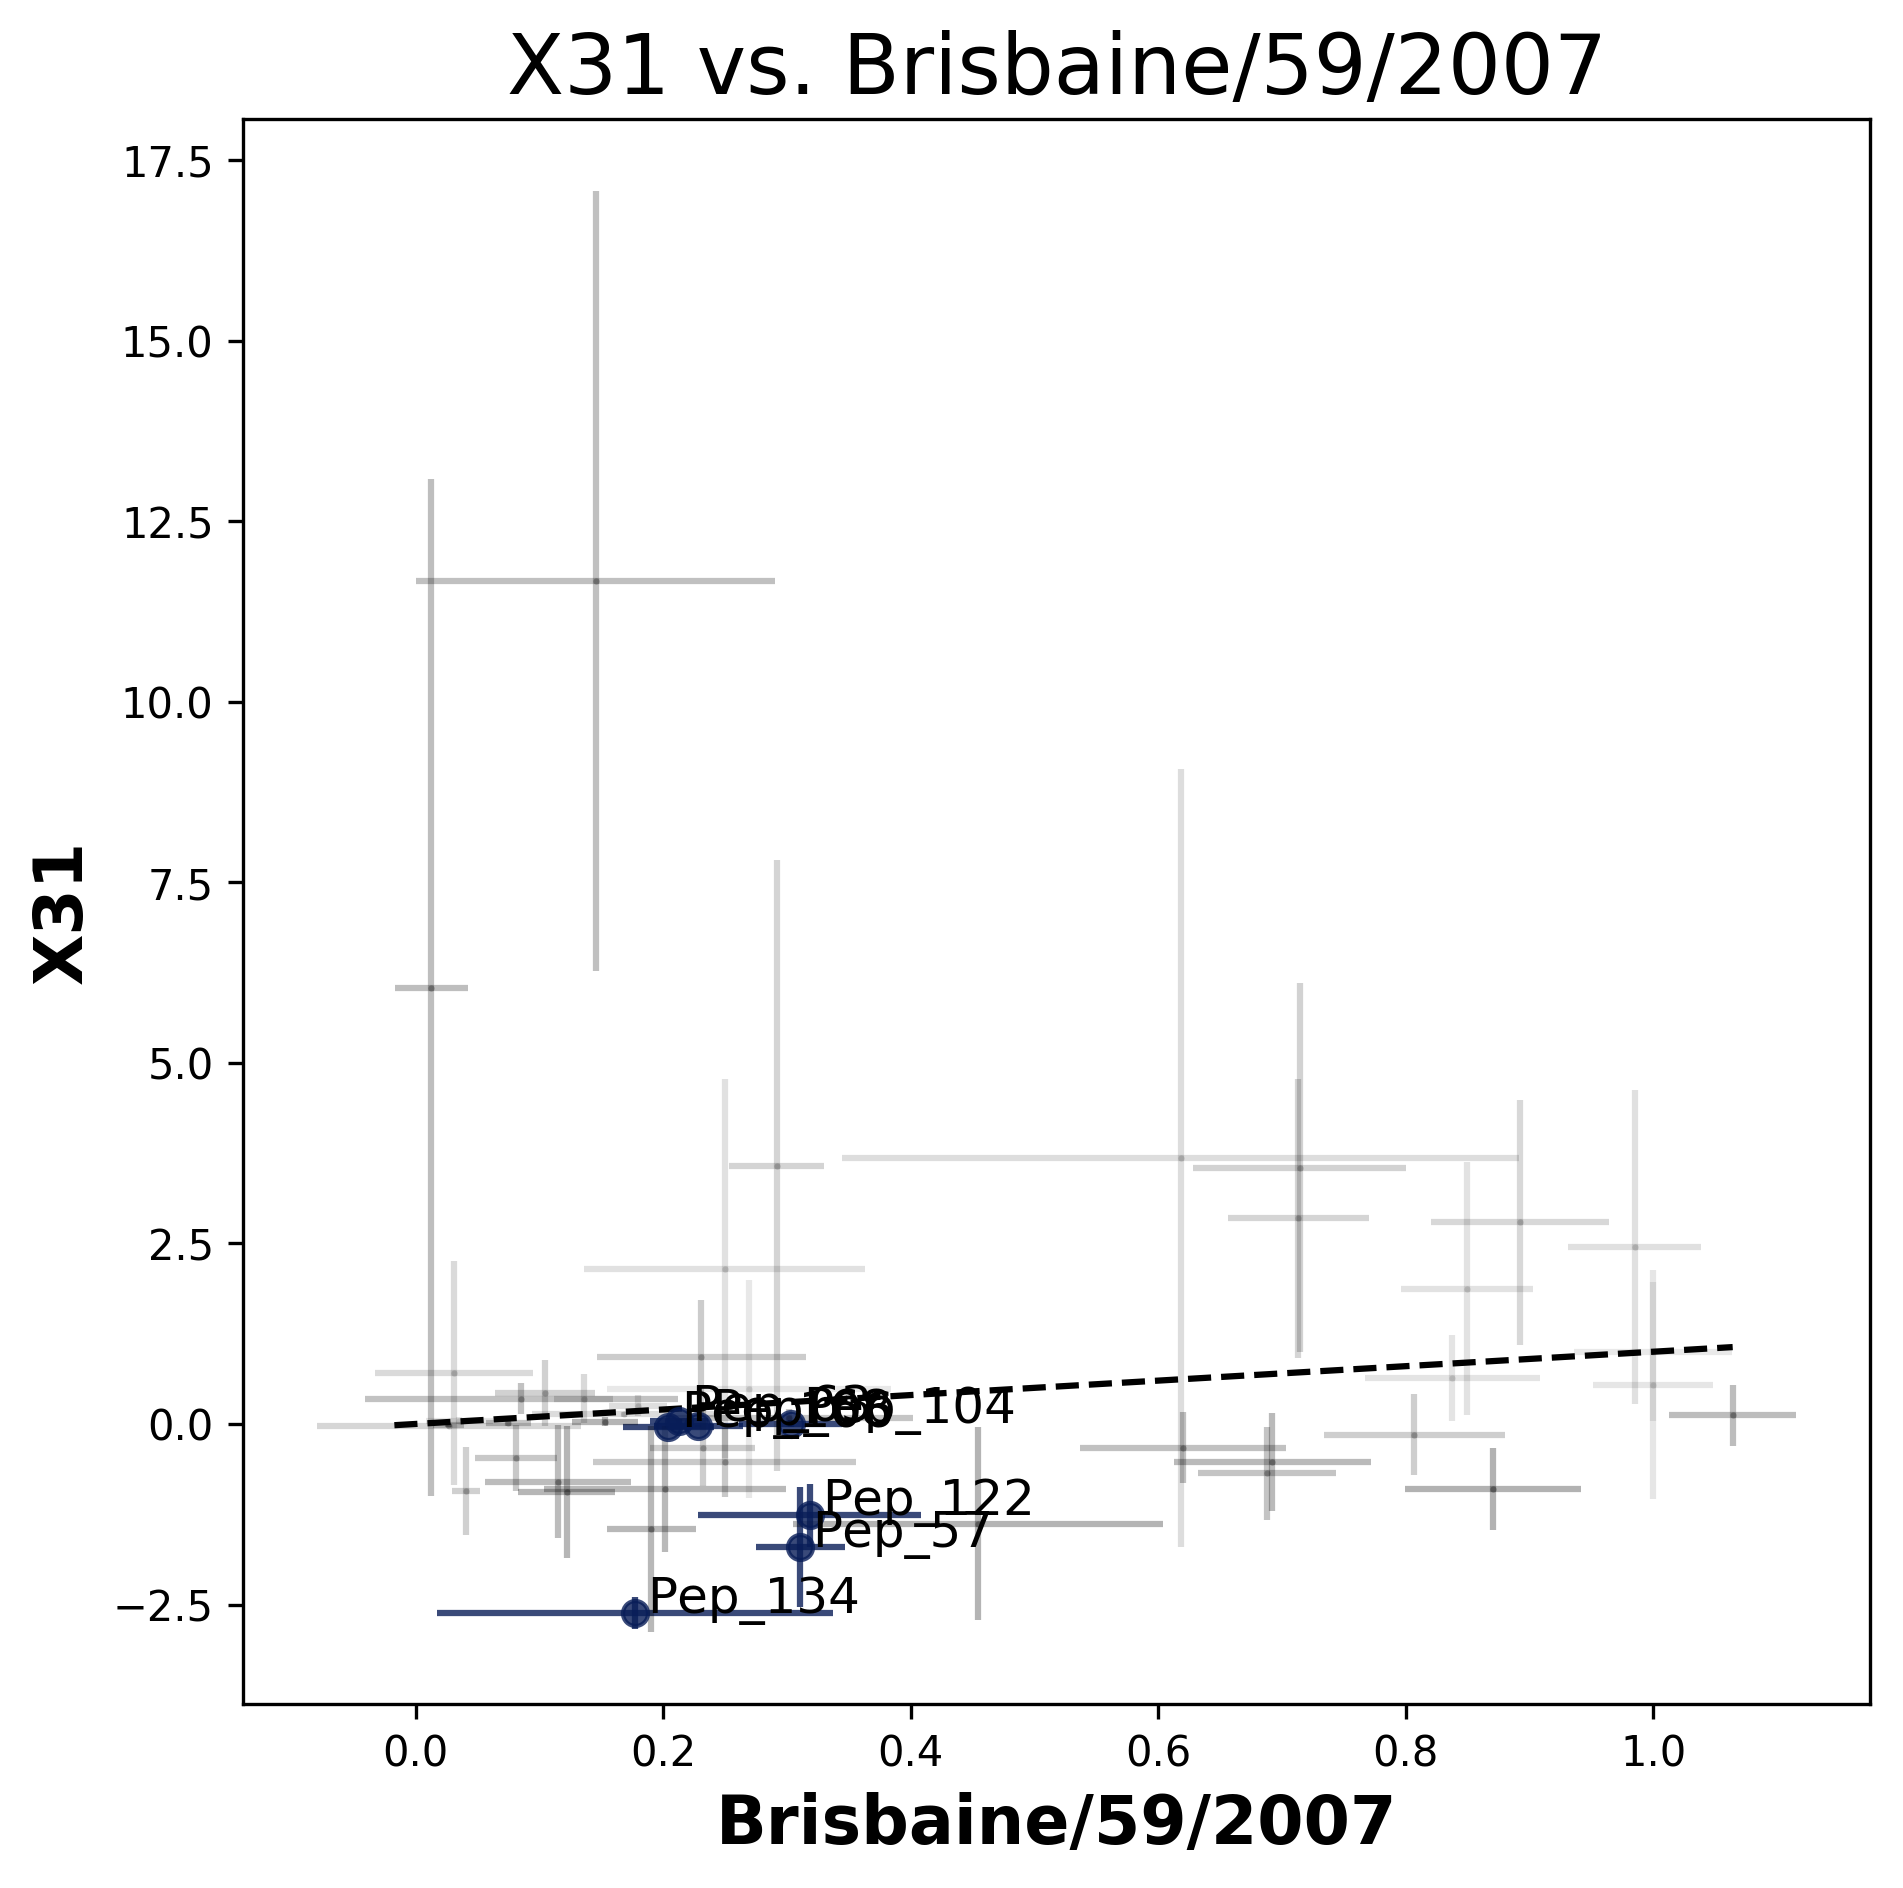

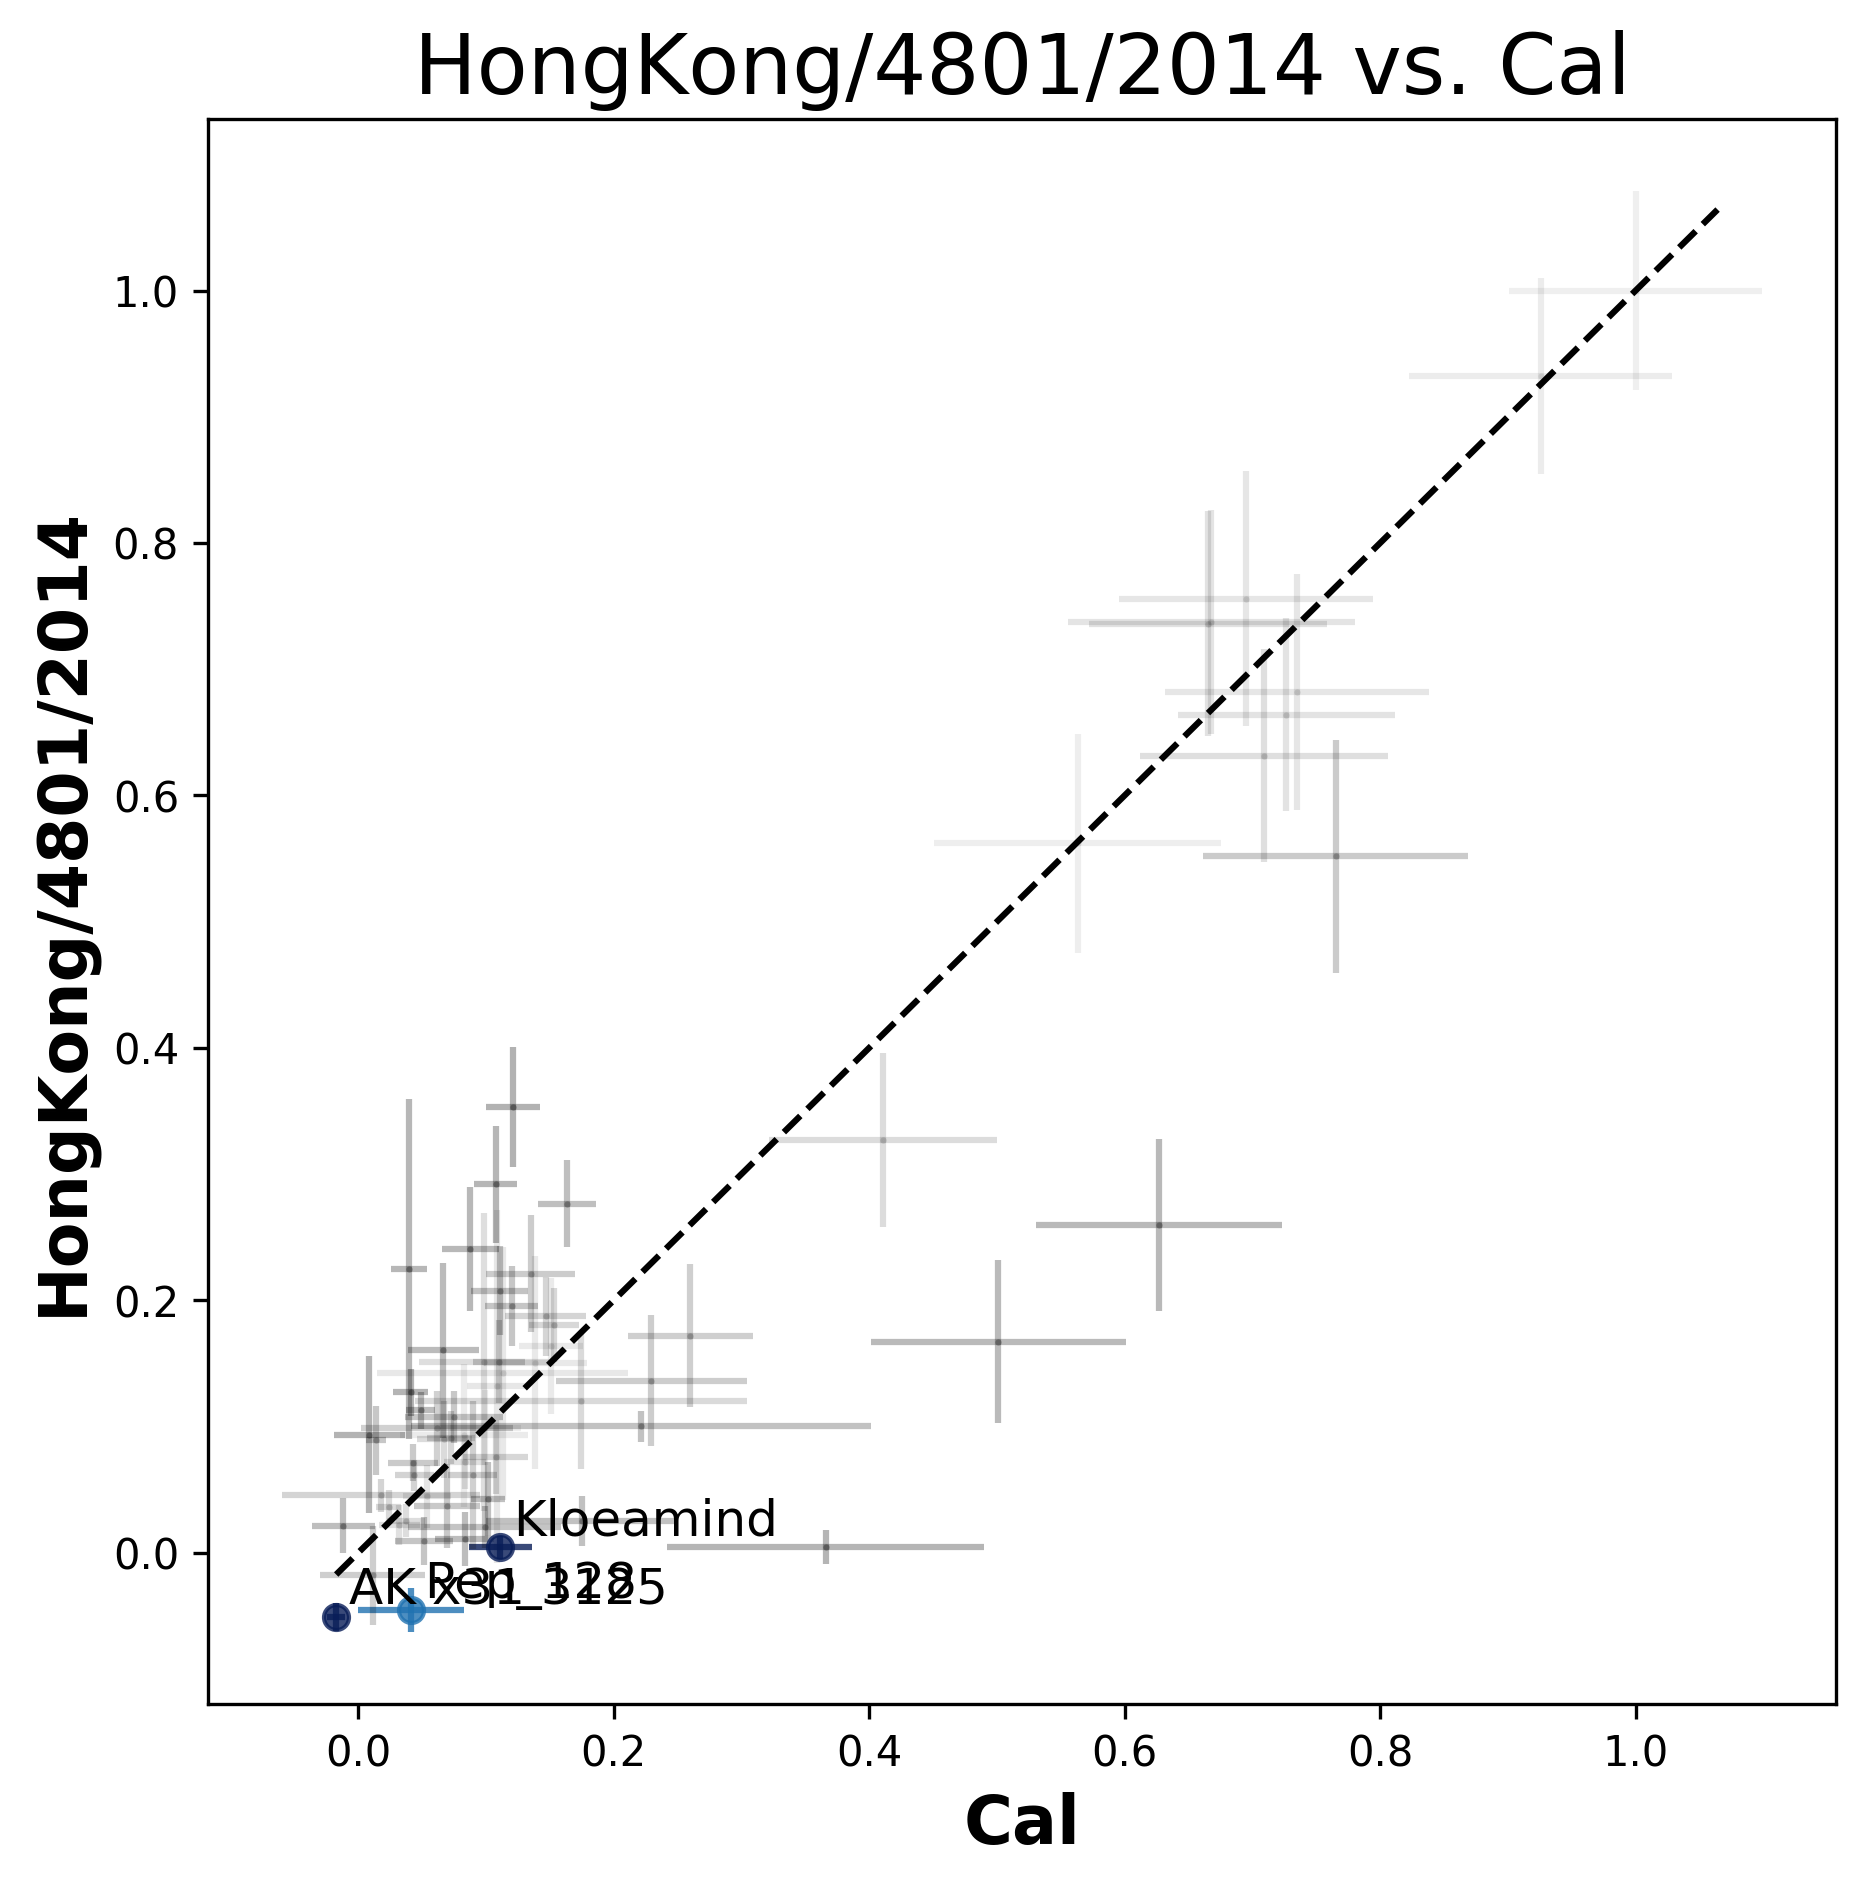

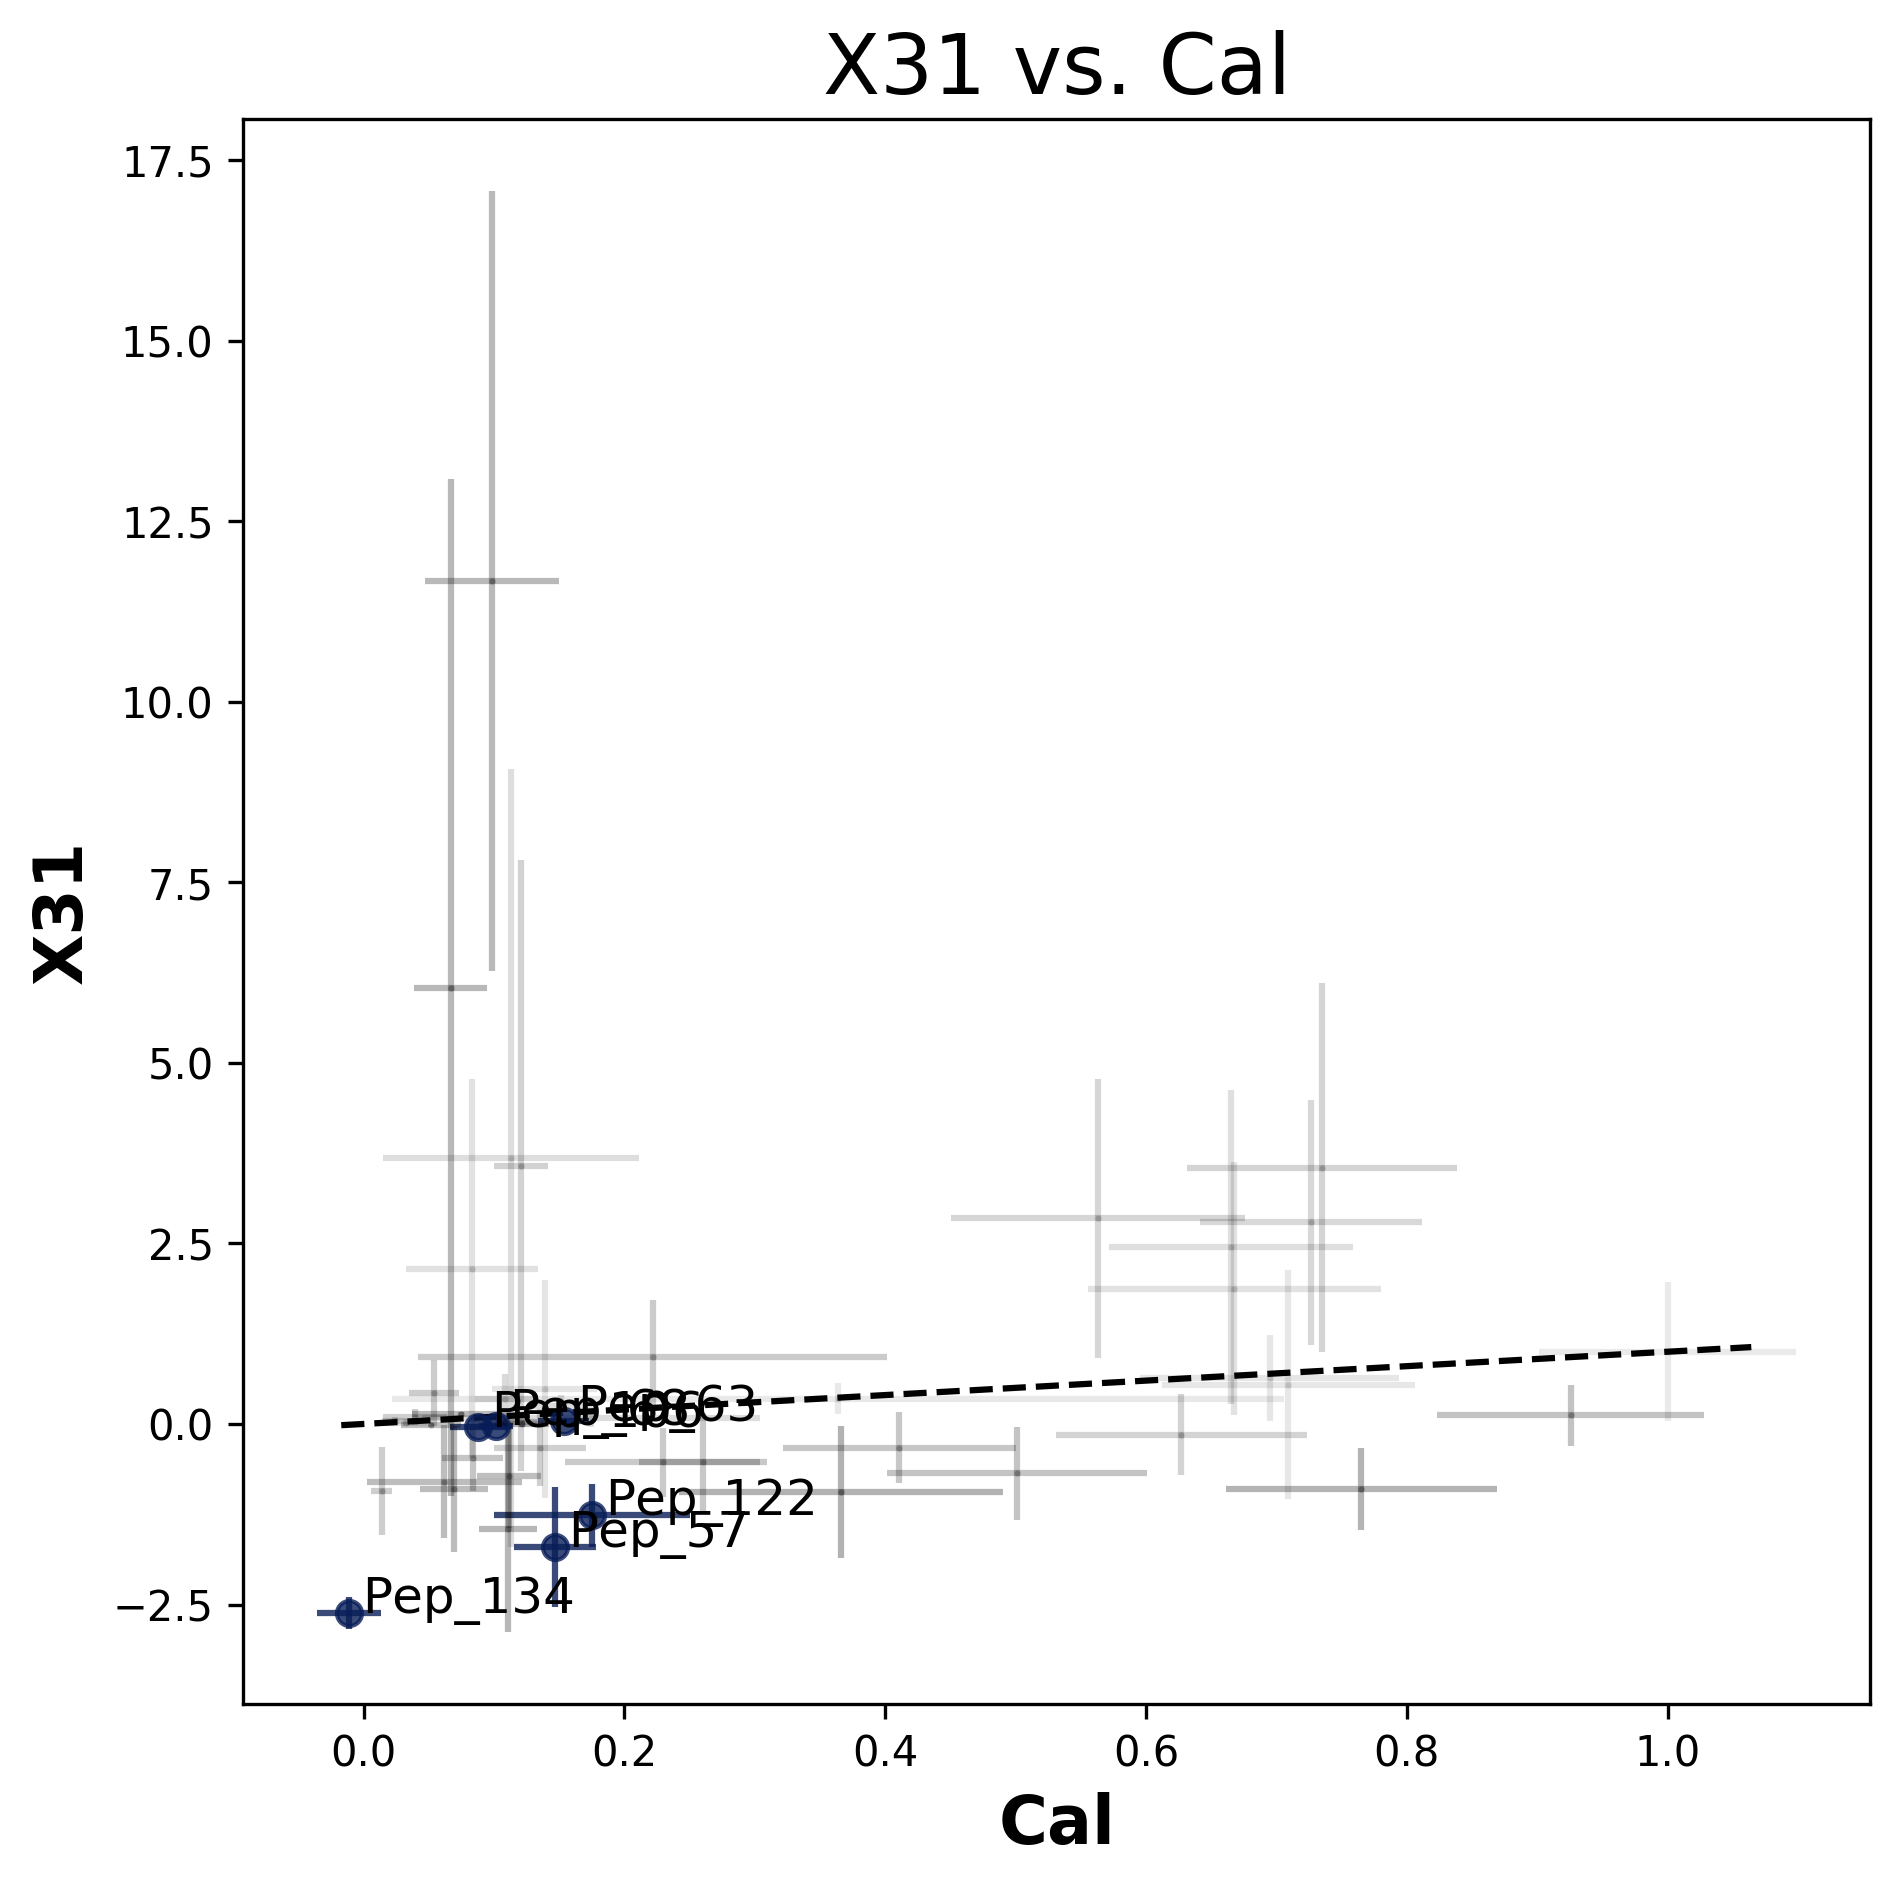

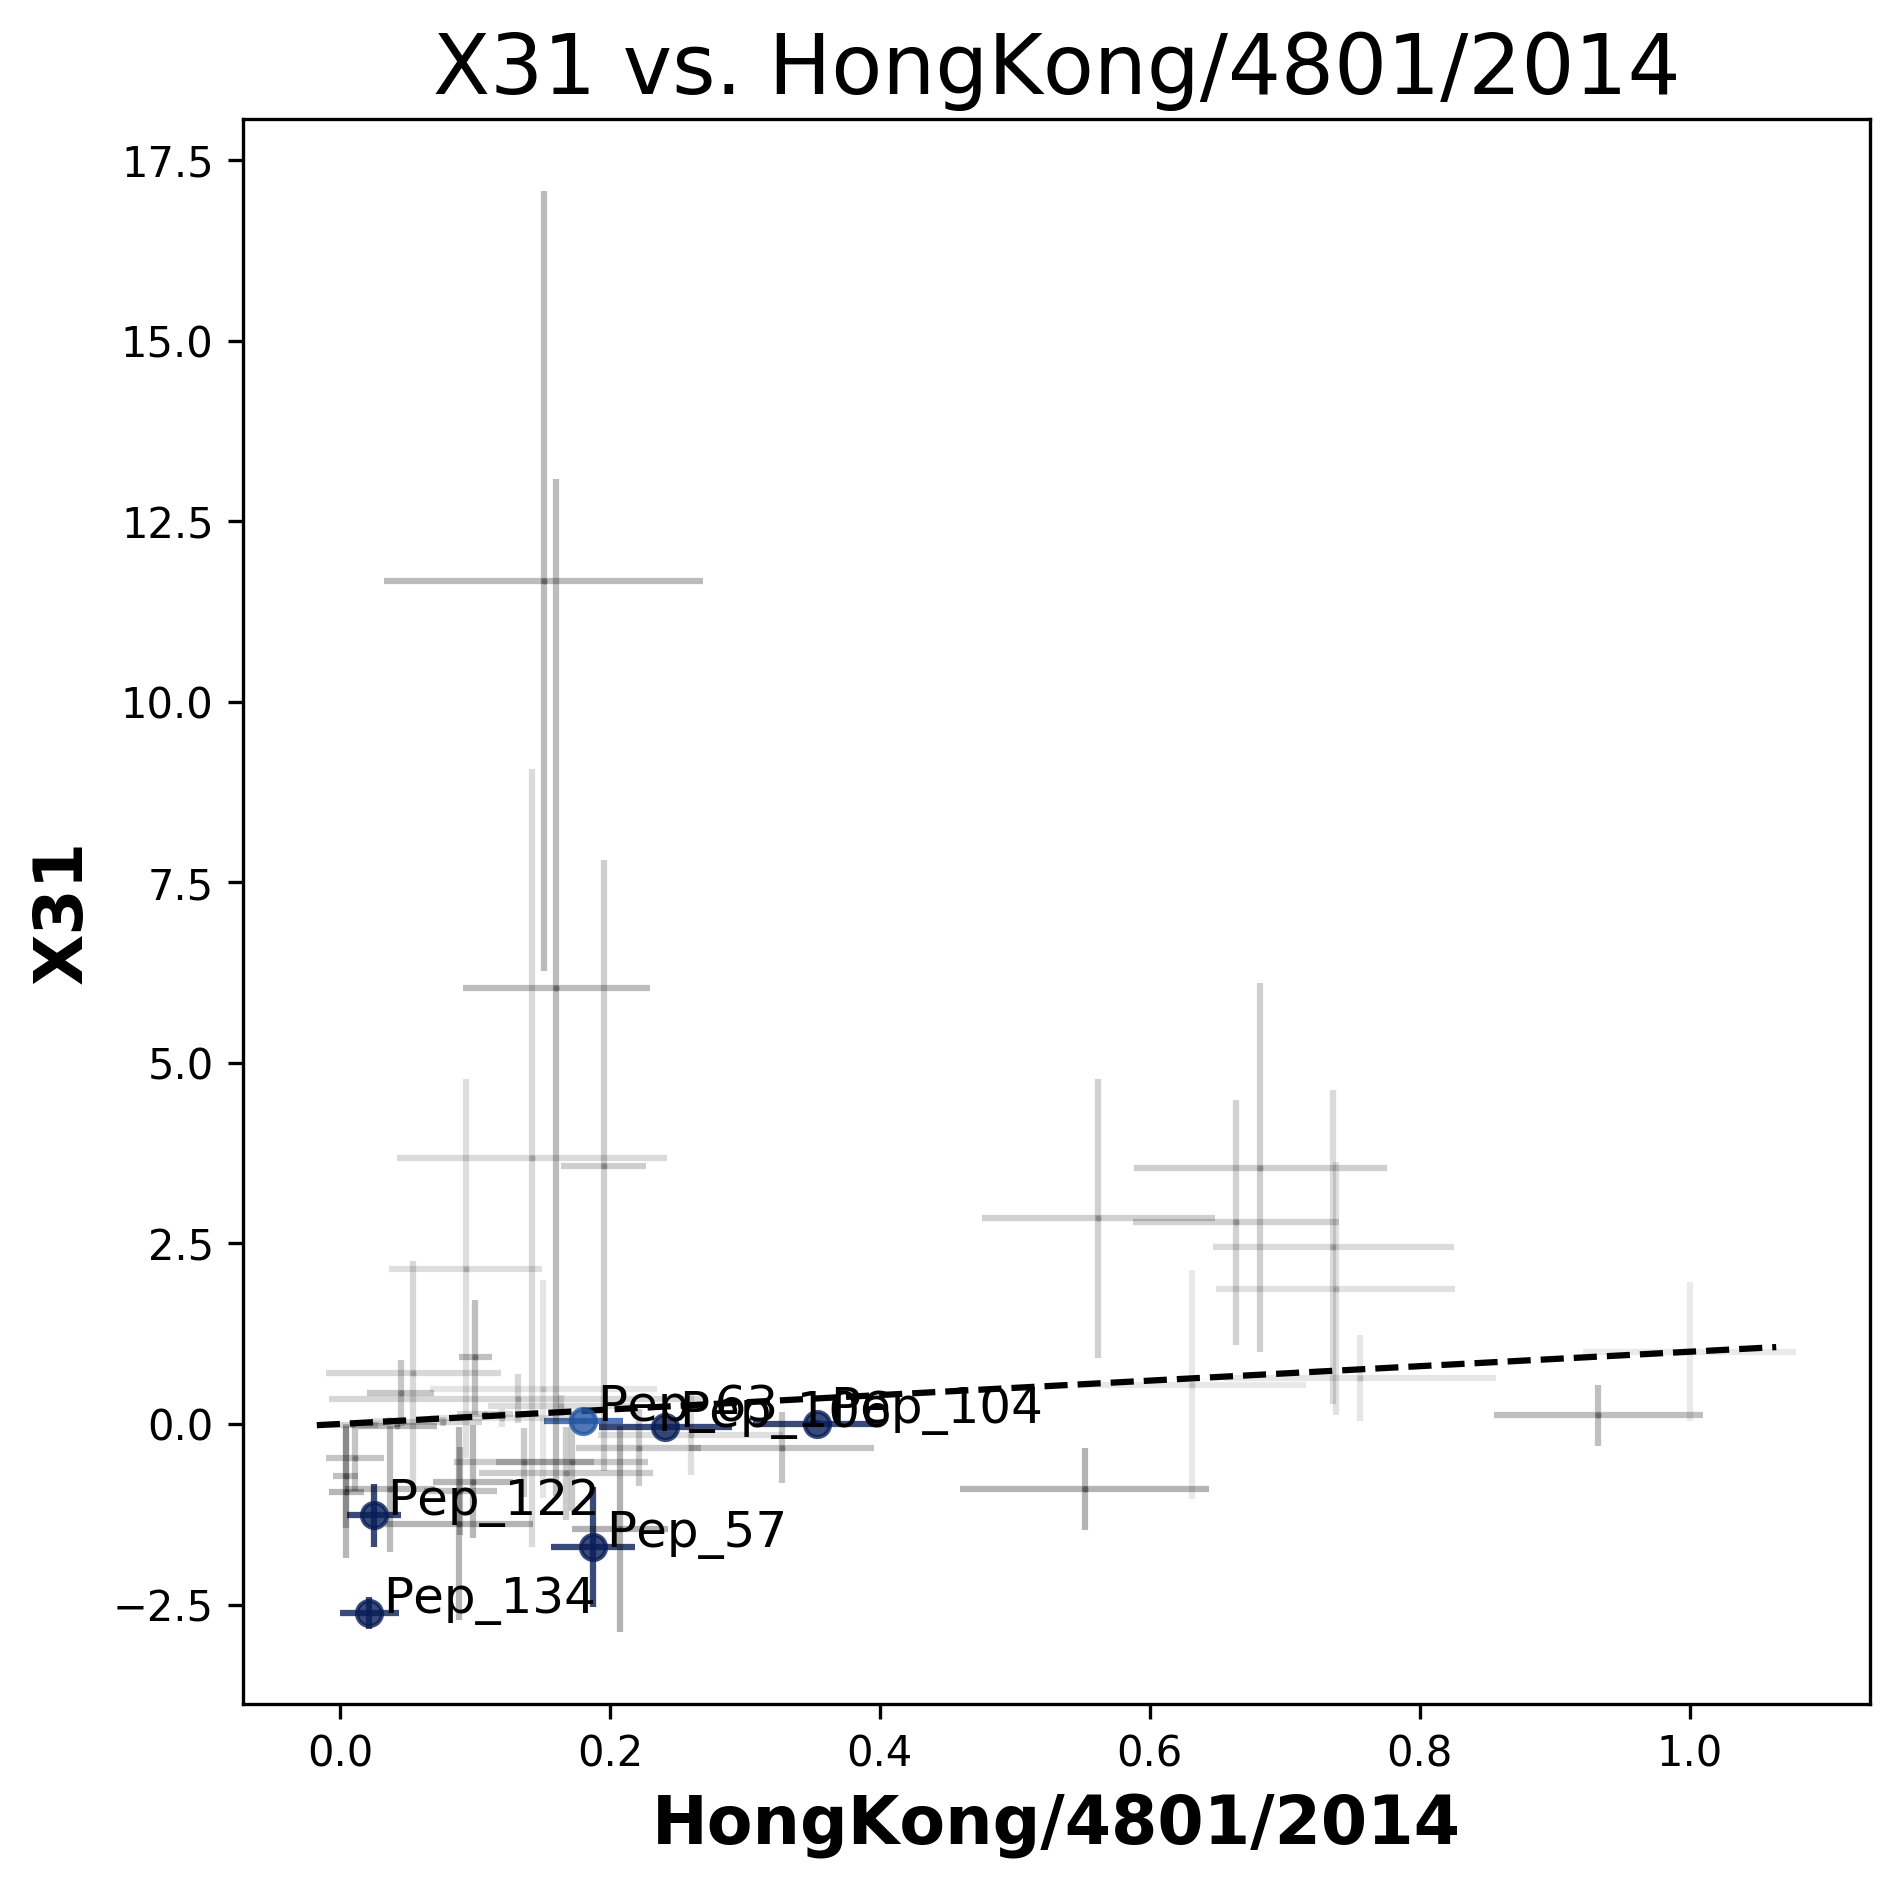

In [186]:
#fig, axes = plt.subplots(ncols=5,nrows=2, sharex=True,sharey=True,figsize = (7,7), dpi =300)
plt.close()
ax_it = iter(axes.flatten())
peptide_c_signif.dropna(inplace=True)
cmap = cm.YlGnBu
for name, d in peptide_c_signif.groupby("Viruses"):
    fig, ax = plt.subplots(ncols=1,nrows=1, sharex=True,sharey=True,figsize = (7,7), dpi =300)
    x = y = np.linspace(peptide_c_signif.v1_i.min(),peptide_c_signif.v1_i.max())
    #ax = next(ax_it)
    ax.plot(x,y,linestyle="--",marker=" ", c="k", alpha=1)
    ax.set_title("{} vs. {}".format(name[1],name[0]), size = 20)
    ax.set_xlabel(name[0], size = 16, weight = 'bold')
    ax.set_ylabel(name[1], size = 16, weight = 'bold')
    
    #ax.set_xscale("log")
    #ax.set_yscale("log")



    #norm = Normalize(d.Significance.min(),d.Significance.max())
    d.sort_values("Significance",ascending=False, inplace=True)
    boundary = 0.7
    d_selected = d[d["Significance"] > boundary]
    d_n = d[d["Significance"] < boundary]

    

    alphas = iter(np.linspace(0.3,0.05,len(d)))

    for ii, dp in d_selected.iterrows():
        if dp.Significance is not np.NaN:
            c = cmap(dp.Significance)
            ax.errorbar(x=dp.v1_i,y=dp.v2_i,xerr=dp.v1_err,yerr=dp.v2_err, c = c, fmt="o",linestyle="",alpha=0.8, capthick=2)
            ax.annotate(dp["Peptide"],(dp.v1_i+0.01,dp.v2_i+0.01), size=12)
    
    for ii, dp in d_n.iterrows():
        c = cmap(dp.Significance)
        ax.errorbar(x=dp.v1_i,y=dp.v2_i,xerr=dp.v1_err,yerr=dp.v2_err, c = "k", fmt="o",linestyle="",alpha=next(alphas), ms = 0.5, capthick=1)
        
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    uri_name1 = name[0].replace("/","-")
    uri_name2 = name[1].replace("/","-")

    fig.savefig(directory+"cor_{}{}".format(uri_name1,uri_name2),bbox_inches="tight")
    plt.show()

#plt.savefig(directory+"all_correlations.png")    


In [178]:
df = peptide_c_signif[peptide_c_signif.Viruses==('1','2')]
df.sort_values("Significance", inplace=True)

/home/janekg89/Envs/flutype_webapp/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [179]:
peptide_c_signif.sort_values("Significance",ascending=False)


,Peptide,Viruses,Significance,v1_i,v2_i,v1_err,v2_err,v1_numb,v2_numb
656,Pep_134,"(HongKong/4801/2014, X31)",49.4238,0.0216274,-2.619,0.0217404,0.221748,1,1
593,Pep_134,"(Cal, X31)",47.7352,-0.011514,-2.619,0.0244553,0.221748,1,1
452,Pep_134,"(Brisbaine/59/2007, X31)",36.9817,0.177142,-2.619,0.159922,0.221748,1,1
201,Pep_128,"(Brisbaine/10/2007, HongKong/4801/2014)",5.80266,0.0326216,-0.0452045,0.00485363,0.0176112,1,1
254,Pep_68,"(Brisbaine/10/2007, X31)",4.08292,0.162964,-0.0233442,0.0178043,0.0124756,1,1
249,Pep_63,"(Brisbaine/10/2007, X31)",3.16906,0.192995,0.0376143,0.0156081,0.0249561,1,1
562,Kloeamind,"(Cal, HongKong/4801/2014)",3.0393,0.111324,0.00428171,0.0245181,0.00933157,1,1
218,Pep_106,"(Brisbaine/10/2007, X31)",2.68606,0.186112,-0.0411752,0.0349469,0.00917212,1,1
579,Pep_106,"(Cal, X31)",2.5991,0.0879014,-0.0411752,0.0220216,0.00917212,1,1
154,Pep_59,"(Brisbaine/10/2007, HongKong/4801/2014)",2.14585,0.900334,0.167352,0.0738121,0.0644704,1,1
